In [ ]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy.stats import pearsonr
import matplotlib.pyplot as plt
import seaborn as sb

In [ ]:
!pip install ucimlrepo

In [ ]:
from ucimlrepo import fetch_ucirepo

In [ ]:
# fetch dataset
communities_and_crime = fetch_ucirepo(id=183)

In [ ]:
# data (as pandas dataframes)
X = communities_and_crime.data.features
y = communities_and_crime.data.targets

In [ ]:
X.head()

state county community        communityname  fold  population  \
0      8      ?         ?         Lakewoodcity     1        0.19   
1     53      ?         ?          Tukwilacity     1        0.00   
2     24      ?         ?         Aberdeentown     1        0.00   
3     34      5     81440  Willingborotownship     1        0.04   
4     42     95      6096    Bethlehemtownship     1        0.01   

   householdsize  racepctblack  racePctWhite  racePctAsian  ...  \
0           0.33          0.02          0.90          0.12  ...   
1           0.16          0.12          0.74          0.45  ...   
2           0.42          0.49          0.56          0.17  ...   
3           0.77          1.00          0.08          0.12  ...   
4           0.55          0.02          0.95          0.09  ...   

   PolicAveOTWorked  LandArea  PopDens  PctUsePubTrans  PolicCars  \
0              0.29      0.12     0.26            0.20       0.06   
1                 ?      0.02     0.12            0.45          ?   
2                 ?      0.01     0.21            0.02          ?   
3                 ?      0.02     0.39            0.28          ?   
4                 ?      0.04     0.09            0.02          ?   

   PolicOperBudg  LemasPctPolicOnPatr  LemasGangUnitDeploy  \
0           0.04                  0.9                  0.5   
1              ?                    ?                    ?   
2              ?                    ?                    ?   
3              ?                    ?                    ?   
4              ?                    ?                    ?   

   LemasPctOfficDrugUn  PolicBudgPerPop  
0                 0.32             0.14  
1                 0.00                ?  
2                 0.00                ?  
3                 0.00                ?  
4                 0.00                ?  

[5 rows x 127 columns]

In [ ]:
y.head()

ViolentCrimesPerPop
0                 0.20
1                 0.67
2                 0.43
3                 0.12
4                 0.03

In [ ]:
cols_to_drop = []
for col in X.columns:
  if X[col].astype(str).str.contains('\?').any():  # Escape '?' with backslash
    cols_to_drop.append(col)

In [ ]:
X_clean = X.drop(columns=cols_to_drop)

In [ ]:
X_clean.head()

state        communityname  fold  population  householdsize  racepctblack  \
0      8         Lakewoodcity     1        0.19           0.33          0.02   
1     53          Tukwilacity     1        0.00           0.16          0.12   
2     24         Aberdeentown     1        0.00           0.42          0.49   
3     34  Willingborotownship     1        0.04           0.77          1.00   
4     42    Bethlehemtownship     1        0.01           0.55          0.02   

   racePctWhite  racePctAsian  racePctHisp  agePct12t21  ...  NumStreet  \
0          0.90          0.12         0.17         0.34  ...        0.0   
1          0.74          0.45         0.07         0.26  ...        0.0   
2          0.56          0.17         0.04         0.39  ...        0.0   
3          0.08          0.12         0.10         0.51  ...        0.0   
4          0.95          0.09         0.05         0.38  ...        0.0   

   PctForeignBorn  PctBornSameState  PctSameHouse85  PctSameCity85  \
0            0.12              0.42            0.50           0.51   
1            0.21              0.50            0.34           0.60   
2            0.14              0.49            0.54           0.67   
3            0.19              0.30            0.73           0.64   
4            0.11              0.72            0.64           0.61   

   PctSameState85  LandArea  PopDens  PctUsePubTrans  LemasPctOfficDrugUn  
0            0.64      0.12     0.26            0.20                 0.32  
1            0.52      0.02     0.12            0.45                 0.00  
2            0.56      0.01     0.21            0.02                 0.00  
3            0.65      0.02     0.39            0.28                 0.00  
4            0.53      0.04     0.09            0.02                 0.00  

[5 rows x 102 columns]

In [ ]:
X_clean.drop(columns='communityname', inplace=True)

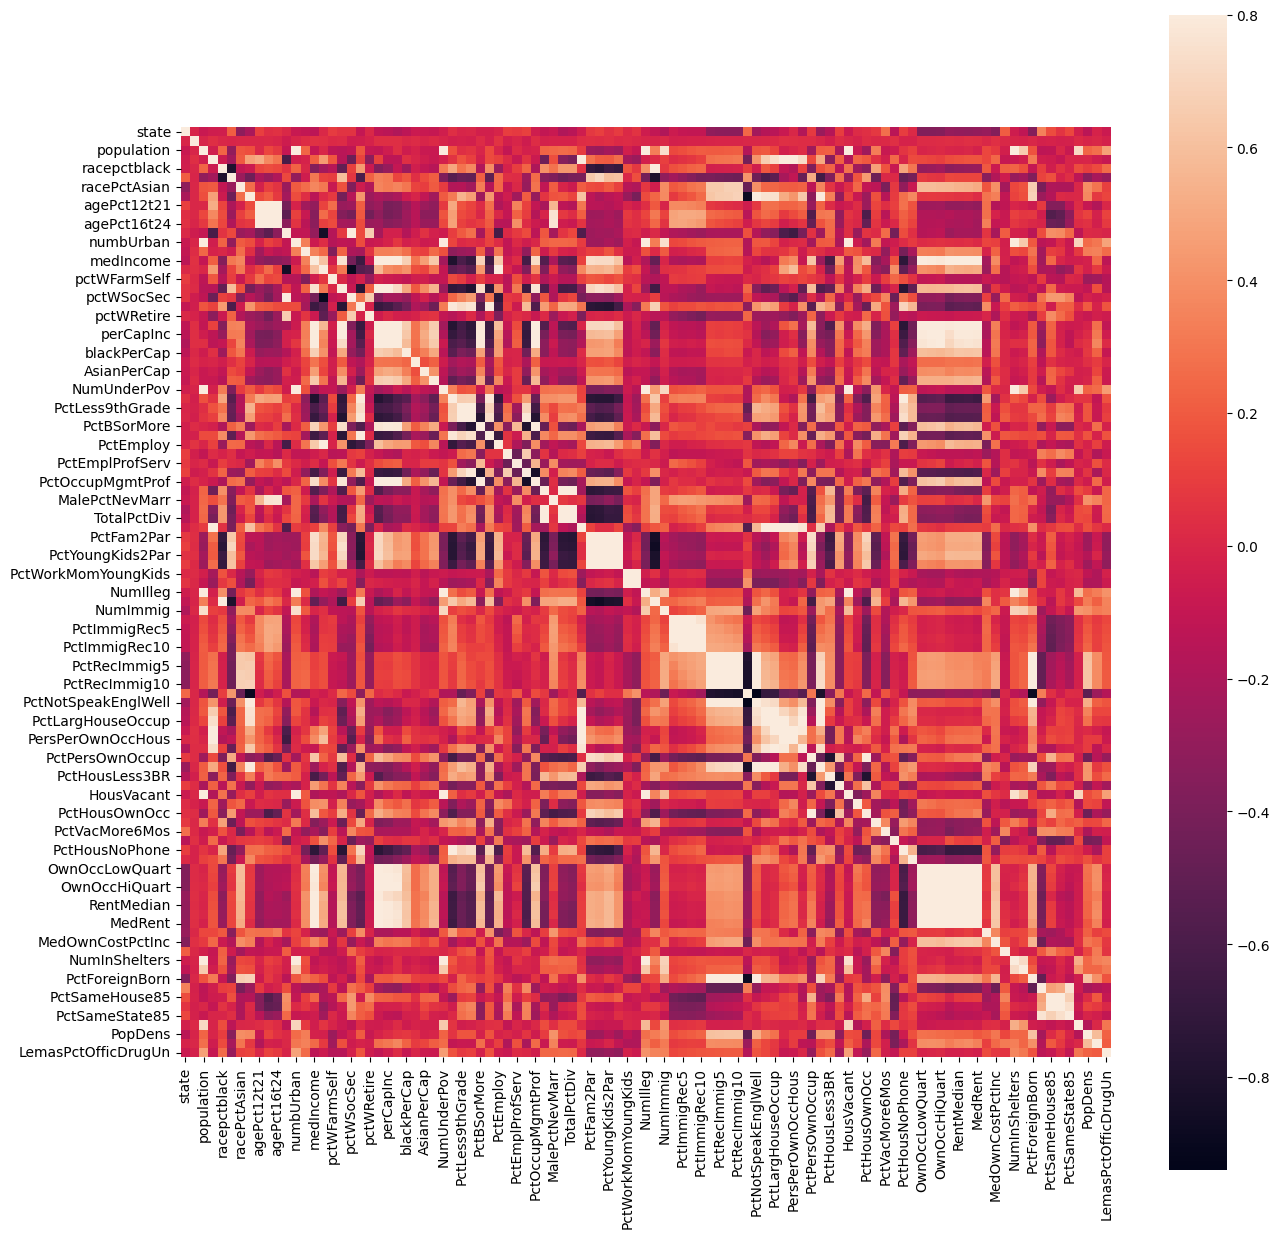

In [ ]:
Corr_mat = X_clean.corr()
fig = plt.figure(figsize = (15,15))

sb.heatmap(Corr_mat, vmax = .8, square = True)
plt.show()

Let's how linearly the predictors correlate with the crime rate

In [ ]:
predictors = X_clean.columns.tolist()
print(predictors)

['state', 'fold', 'population', 'householdsize', 'racepctblack', 'racePctWhite', 'racePctAsian', 'racePctHisp', 'agePct12t21', 'agePct12t29', 'agePct16t24', 'agePct65up', 'numbUrban', 'pctUrban', 'medIncome', 'pctWWage', 'pctWFarmSelf', 'pctWInvInc', 'pctWSocSec', 'pctWPubAsst', 'pctWRetire', 'medFamInc', 'perCapInc', 'whitePerCap', 'blackPerCap', 'indianPerCap', 'AsianPerCap', 'HispPerCap', 'NumUnderPov', 'PctPopUnderPov', 'PctLess9thGrade', 'PctNotHSGrad', 'PctBSorMore', 'PctUnemployed', 'PctEmploy', 'PctEmplManu', 'PctEmplProfServ', 'PctOccupManu', 'PctOccupMgmtProf', 'MalePctDivorce', 'MalePctNevMarr', 'FemalePctDiv', 'TotalPctDiv', 'PersPerFam', 'PctFam2Par', 'PctKids2Par', 'PctYoungKids2Par', 'PctTeen2Par', 'PctWorkMomYoungKids', 'PctWorkMom', 'NumIlleg', 'PctIlleg', 'NumImmig', 'PctImmigRecent', 'PctImmigRec5', 'PctImmigRec8', 'PctImmigRec10', 'PctRecentImmig', 'PctRecImmig5', 'PctRecImmig8', 'PctRecImmig10', 'PctSpeakEnglOnly', 'PctNotSpeakEnglWell', 'PctLargHouseFam', 'PctLarg

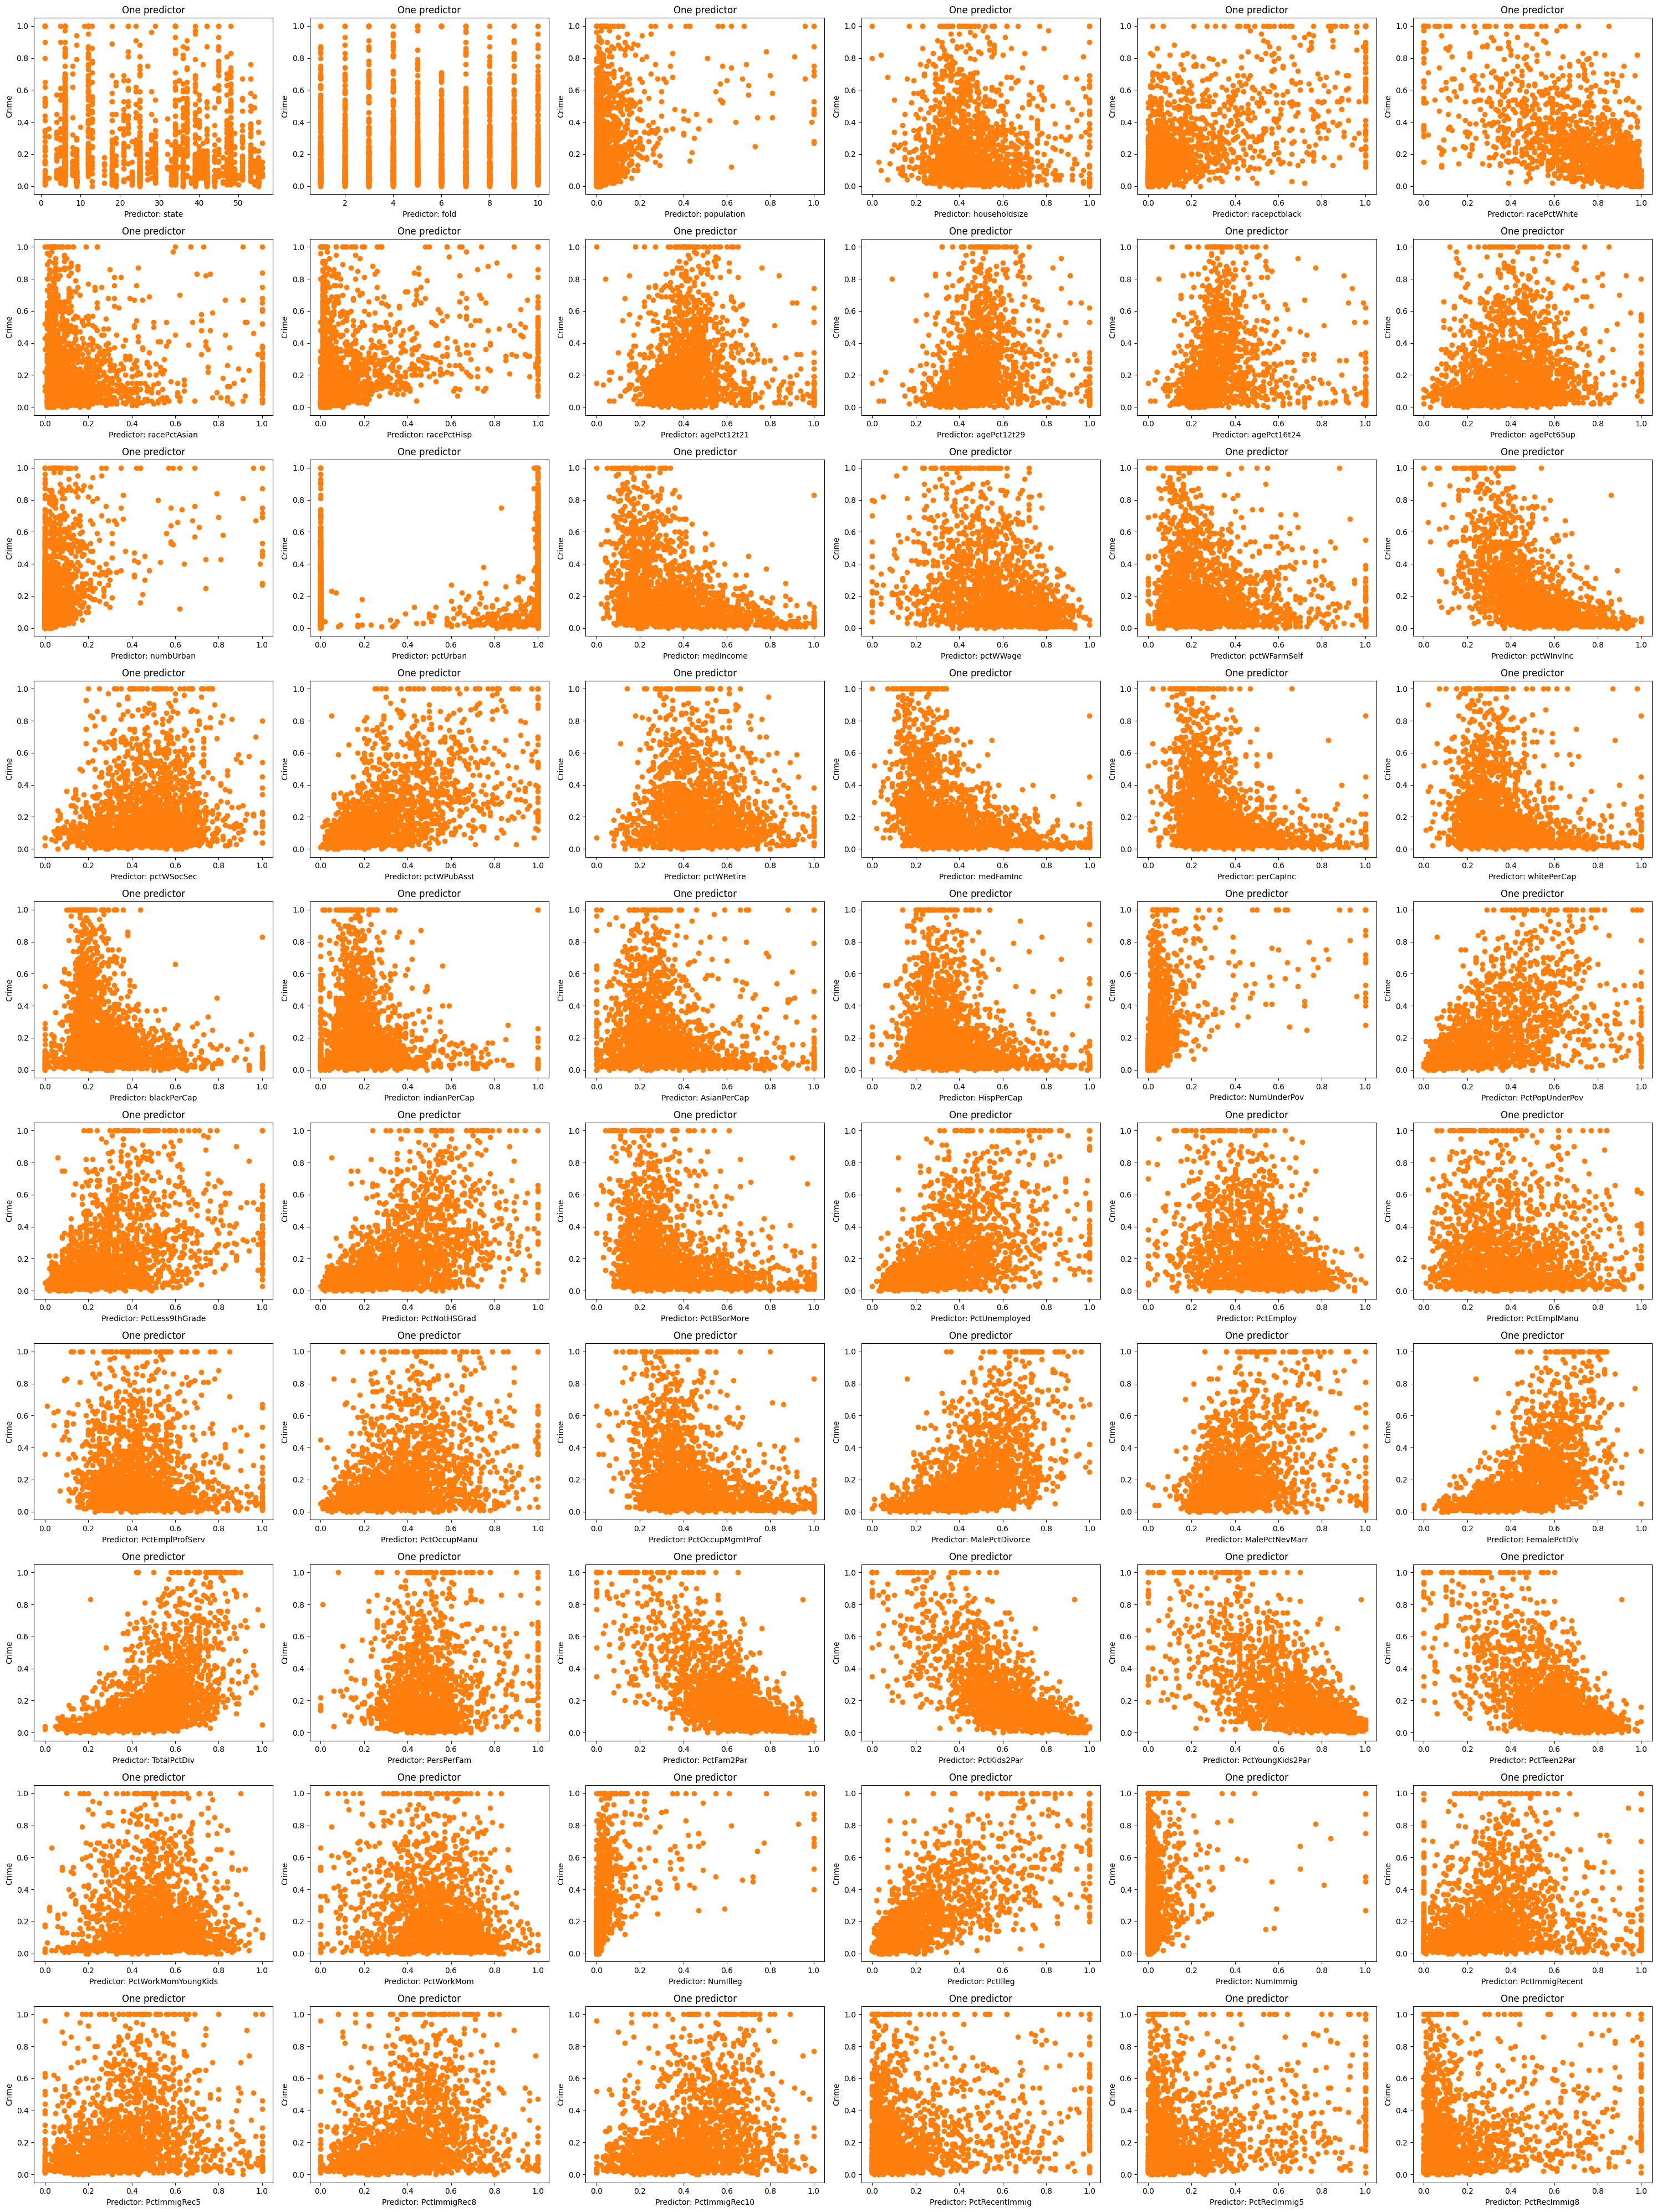

In [ ]:
fig, ax = plt.subplots(10, 6, figsize=[30,40])

for i, axi in enumerate(ax.flat):
    axi.scatter(X_clean[predictors[i]], y, color='tab:orange')
    axi.set_ylabel('Crime')
    axi.set_xlabel(f'Predictor: {predictors[i]}')
    axi.set_title("One predictor");

plt.tight_layout()
plt.show()

In [ ]:
model = sm.OLS(y, X_clean[predictors].assign(const=1))
results = model.fit()

In [ ]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     ViolentCrimesPerPop   R-squared:                       0.696
Model:                             OLS   Adj. R-squared:                  0.679
Method:                  Least Squares   F-statistic:                     42.80
Date:                 Sun, 15 Dec 2024   Prob (F-statistic):               0.00
Time:                         22:41:13   Log-Likelihood:                 1261.7
No. Observations:                 1994   AIC:                            -2319.
Df Residuals:                     1892   BIC:                            -1748.
Df Model:                          101                                         
Covariance Type:             nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
state                    -0.0008      0.000     -3.028      0.002      -0.001      -0.000
fold                     -0.0015      0.001     -1.468      0.142      -0.004       0.001
population                0.1711      0.397      0.431      0.667      -0.607       0.950
householdsize            -0.0001      0.087     -0.001      0.999      -0.170       0.170
racepctblack              0.2032      0.051      3.974      0.000       0.103       0.303
racePctWhite             -0.0493      0.059     -0.839      0.402      -0.165       0.066
racePctAsian             -0.0108      0.034     -0.314      0.754      -0.078       0.057
racePctHisp               0.0508      0.053      0.950      0.342      -0.054       0.156
agePct12t21               0.1272      0.106      1.202      0.229      -0.080       0.335
agePct12t29              -0.2355      0.156     -1.505      0.132      -0.542       0.071
agePct16t24              -0.1435      0.164     -0.874      0.382      -0.465       0.178
agePct65up                0.0344      0.104      0.333      0.739      -0.169       0.237
numbUrban                -0.2856      0.387     -0.738      0.460      -1.044       0.473
pctUrban                  0.0479      0.016      3.063      0.002       0.017       0.078
medIncome                -0.1774      0.173     -1.028      0.304      -0.516       0.161
pctWWage                 -0.1973      0.090     -2.204      0.028      -0.373      -0.022
pctWFarmSelf              0.0454      0.020      2.256      0.024       0.006       0.085
pctWInvInc               -0.1551      0.068     -2.289      0.022      -0.288      -0.022
pctWSocSec                0.0857      0.107      0.801      0.423      -0.124       0.296
pctWPubAsst              -0.0074      0.046     -0.159      0.873      -0.098       0.083
pctWRetire               -0.0881      0.037     -2.395      0.017      -0.160      -0.016
medFamInc                 0.2756      0.160      1.719      0.086      -0.039       0.590
perCapInc                 0.0952      0.189      0.505      0.614      -0.275       0.465
whitePerCap              -0.3406      0.152     -2.235      0.026      -0.639      -0.042
blackPerCap              -0.0290      0.025     -1.140      0.255      -0.079       0.021
indianPerCap             -0.0329      0.019     -1.694      0.090      -0.071       0.005
AsianPerCap               0.0179      0.019      0.948      0.343      -0.019       0.055
HispPerCap                0.0488      0.024      2.056      0.040       0.002       0.095
NumUnderPov               0.1284      0.138      0.930      0.352      -0.142       0.399
PctPopUnderPov           -0.1729      0.063     -2.755      0.006      -0.296      -0.050
PctLess9thGrade          -0.1013      0.068     -1.493      0.136      -0.234       0.032
PctNotHSGrad

Let's start backwards elimination. The least signigicant predictor is householdsize -> removed.

In [ ]:
predictors.remove('householdsize')

In [ ]:
len(predictors)

100

In [ ]:
model1 = sm.OLS(y, X_clean[predictors].assign(const=1))
results1 = model1.fit()

In [ ]:
results1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     ViolentCrimesPerPop   R-squared:                       0.696
Model:                             OLS   Adj. R-squared:                  0.679
Method:                  Least Squares   F-statistic:                     43.25
Date:                 Sun, 15 Dec 2024   Prob (F-statistic):               0.00
Time:                         22:41:14   Log-Likelihood:                 1261.7
No. Observations:                 1994   AIC:                            -2321.
Df Residuals:                     1893   BIC:                            -1756.
Df Model:                          100                                         
Covariance Type:             nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
state                    -0.0008      0.000     -3.042      0.002      -0.001      -0.000
fold                     -0.0015      0.001     -1.469      0.142      -0.004       0.001
population                0.1711      0.397      0.431      0.666      -0.607       0.949
racepctblack              0.2032      0.051      3.981      0.000       0.103       0.303
racePctWhite             -0.0493      0.059     -0.839      0.401      -0.164       0.066
racePctAsian             -0.0108      0.034     -0.314      0.753      -0.078       0.056
racePctHisp               0.0508      0.053      0.951      0.342      -0.054       0.156
agePct12t21               0.1271      0.104      1.222      0.222      -0.077       0.331
agePct12t29              -0.2355      0.156     -1.512      0.131      -0.541       0.070
agePct16t24              -0.1435      0.164     -0.876      0.381      -0.465       0.178
agePct65up                0.0345      0.103      0.336      0.737      -0.167       0.236
numbUrban                -0.2856      0.387     -0.739      0.460      -1.044       0.473
pctUrban                  0.0479      0.016      3.064      0.002       0.017       0.078
medIncome                -0.1775      0.172     -1.033      0.302      -0.514       0.159
pctWWage                 -0.1973      0.089     -2.210      0.027      -0.373      -0.022
pctWFarmSelf              0.0454      0.020      2.256      0.024       0.006       0.085
pctWInvInc               -0.1551      0.068     -2.293      0.022      -0.288      -0.022
pctWSocSec                0.0857      0.106      0.805      0.421      -0.123       0.294
pctWPubAsst              -0.0074      0.046     -0.161      0.872      -0.097       0.083
pctWRetire               -0.0881      0.037     -2.399      0.017      -0.160      -0.016
medFamInc                 0.2756      0.160      1.720      0.086      -0.039       0.590
perCapInc                 0.0952      0.188      0.507      0.612      -0.273       0.463
whitePerCap              -0.3406      0.152     -2.236      0.025      -0.639      -0.042
blackPerCap              -0.0290      0.025     -1.140      0.254      -0.079       0.021
indianPerCap             -0.0329      0.019     -1.695      0.090      -0.071       0.005
AsianPerCap               0.0179      0.019      0.948      0.343      -0.019       0.055
HispPerCap                0.0488      0.024      2.060      0.040       0.002       0.095
NumUnderPov               0.1284      0.138      0.931      0.352      -0.142       0.399
PctPopUnderPov           -0.1729      0.062     -2.788      0.005      -0.295      -0.051
PctLess9thGrade          -0.1013      0.068     -1.494      0.135      -0.234       0.032
PctNotHSGrad              0.0526      0.096      0.548      0.584      -0.135       0.241
PctBSorMore 

Droping fireplaces did not change R^2_adj.
The next to be dropped is PctTeen2Par

In [ ]:
predictors.remove('PctTeen2Par')

In [ ]:
model2 = sm.OLS(y, X_clean[predictors].assign(const=1))
results2 = model2.fit()

In [ ]:
results2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     ViolentCrimesPerPop   R-squared:                       0.696
Model:                             OLS   Adj. R-squared:                  0.680
Method:                  Least Squares   F-statistic:                     43.71
Date:                 Sun, 15 Dec 2024   Prob (F-statistic):               0.00
Time:                         22:41:14   Log-Likelihood:                 1261.7
No. Observations:                 1994   AIC:                            -2323.
Df Residuals:                     1894   BIC:                            -1764.
Df Model:                           99                                         
Covariance Type:             nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
state                    -0.0008      0.000     -3.043      0.002      -0.001      -0.000
fold                     -0.0015      0.001     -1.469      0.142      -0.004       0.001
population                0.1712      0.397      0.432      0.666      -0.607       0.949
racepctblack              0.2032      0.051      3.983      0.000       0.103       0.303
racePctWhite             -0.0492      0.059     -0.839      0.401      -0.164       0.066
racePctAsian             -0.0108      0.034     -0.315      0.753      -0.078       0.056
racePctHisp               0.0508      0.053      0.951      0.342      -0.054       0.155
agePct12t21               0.1272      0.104      1.224      0.221      -0.077       0.331
agePct12t29              -0.2353      0.156     -1.513      0.130      -0.540       0.070
agePct16t24              -0.1437      0.164     -0.879      0.380      -0.464       0.177
agePct65up                0.0344      0.103      0.335      0.737      -0.167       0.235
numbUrban                -0.2858      0.386     -0.740      0.460      -1.044       0.472
pctUrban                  0.0479      0.016      3.068      0.002       0.017       0.078
medIncome                -0.1774      0.172     -1.034      0.301      -0.514       0.159
pctWWage                 -0.1974      0.089     -2.210      0.027      -0.372      -0.022
pctWFarmSelf              0.0454      0.020      2.258      0.024       0.006       0.085
pctWInvInc               -0.1551      0.068     -2.293      0.022      -0.288      -0.022
pctWSocSec                0.0858      0.106      0.807      0.420      -0.123       0.294
pctWPubAsst              -0.0074      0.046     -0.162      0.871      -0.097       0.082
pctWRetire               -0.0882      0.037     -2.400      0.016      -0.160      -0.016
medFamInc                 0.2754      0.160      1.724      0.085      -0.038       0.589
perCapInc                 0.0954      0.188      0.509      0.611      -0.272       0.463
whitePerCap              -0.3405      0.152     -2.237      0.025      -0.639      -0.042
blackPerCap              -0.0290      0.025     -1.140      0.254      -0.079       0.021
indianPerCap             -0.0329      0.019     -1.695      0.090      -0.071       0.005
AsianPerCap               0.0179      0.019      0.948      0.343      -0.019       0.055
HispPerCap                0.0488      0.024      2.061      0.039       0.002       0.095
NumUnderPov               0.1284      0.138      0.931      0.352      -0.142       0.399
PctPopUnderPov           -0.1728      0.062     -2.792      0.005      -0.294      -0.051
PctLess9thGrade          -0.1013      0.068     -1.495      0.135      -0.234       0.032
PctNotHSGrad              0.0525      0.096      0.548      0.584      -0.135       0.240
PctBSorMore 

In [ ]:
predictors.remove('RentMedian')

In [ ]:
model3 = sm.OLS(y, X_clean[predictors].assign(const=1))
results3 = model3.fit()

In [ ]:
results3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     ViolentCrimesPerPop   R-squared:                       0.696
Model:                             OLS   Adj. R-squared:                  0.680
Method:                  Least Squares   F-statistic:                     44.18
Date:                 Sun, 15 Dec 2024   Prob (F-statistic):               0.00
Time:                         22:41:14   Log-Likelihood:                 1261.7
No. Observations:                 1994   AIC:                            -2325.
Df Residuals:                     1895   BIC:                            -1771.
Df Model:                           98                                         
Covariance Type:             nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
state                    -0.0008      0.000     -3.049      0.002      -0.001      -0.000
fold                     -0.0015      0.001     -1.469      0.142      -0.004       0.001
population                0.1711      0.396      0.431      0.666      -0.607       0.949
racepctblack              0.2033      0.051      3.991      0.000       0.103       0.303
racePctWhite             -0.0492      0.059     -0.839      0.402      -0.164       0.066
racePctAsian             -0.0108      0.034     -0.316      0.752      -0.078       0.056
racePctHisp               0.0508      0.053      0.951      0.342      -0.054       0.155
agePct12t21               0.1275      0.104      1.230      0.219      -0.076       0.331
agePct12t29              -0.2354      0.155     -1.514      0.130      -0.540       0.069
agePct16t24              -0.1440      0.163     -0.882      0.378      -0.464       0.176
agePct65up                0.0342      0.102      0.334      0.739      -0.167       0.235
numbUrban                -0.2855      0.386     -0.739      0.460      -1.043       0.472
pctUrban                  0.0479      0.016      3.068      0.002       0.017       0.078
medIncome                -0.1773      0.172     -1.033      0.302      -0.514       0.159
pctWWage                 -0.1972      0.089     -2.211      0.027      -0.372      -0.022
pctWFarmSelf              0.0454      0.020      2.258      0.024       0.006       0.085
pctWInvInc               -0.1550      0.068     -2.293      0.022      -0.288      -0.022
pctWSocSec                0.0860      0.106      0.809      0.419      -0.122       0.294
pctWPubAsst              -0.0074      0.046     -0.162      0.871      -0.097       0.082
pctWRetire               -0.0881      0.037     -2.400      0.016      -0.160      -0.016
medFamInc                 0.2751      0.160      1.724      0.085      -0.038       0.588
perCapInc                 0.0951      0.187      0.508      0.612      -0.272       0.463
whitePerCap              -0.3405      0.152     -2.237      0.025      -0.639      -0.042
blackPerCap              -0.0289      0.025     -1.140      0.254      -0.079       0.021
indianPerCap             -0.0328      0.019     -1.695      0.090      -0.071       0.005
AsianPerCap               0.0179      0.019      0.949      0.343      -0.019       0.055
HispPerCap                0.0489      0.024      2.063      0.039       0.002       0.095
NumUnderPov               0.1284      0.138      0.932      0.352      -0.142       0.399
PctPopUnderPov           -0.1729      0.062     -2.796      0.005      -0.294      -0.052
PctLess9thGrade          -0.1014      0.068     -1.498      0.134      -0.234       0.031
PctNotHSGrad              0.0527      0.096      0.550      0.582      -0.135       0.240
PctBSorMore 

In [ ]:
predictors.remove('PctUnemployed')

In [ ]:
model4 = sm.OLS(y, X_clean[predictors].assign(const=1))
results4 = model4.fit()

In [ ]:
results4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     ViolentCrimesPerPop   R-squared:                       0.696
Model:                             OLS   Adj. R-squared:                  0.680
Method:                  Least Squares   F-statistic:                     44.66
Date:                 Sun, 15 Dec 2024   Prob (F-statistic):               0.00
Time:                         22:41:15   Log-Likelihood:                 1261.7
No. Observations:                 1994   AIC:                            -2327.
Df Residuals:                     1896   BIC:                            -1779.
Df Model:                           97                                         
Covariance Type:             nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
state                    -0.0008      0.000     -3.051      0.002      -0.001      -0.000
fold                     -0.0015      0.001     -1.469      0.142      -0.004       0.001
population                0.1713      0.396      0.432      0.666      -0.606       0.949
racepctblack              0.2033      0.051      3.991      0.000       0.103       0.303
racePctWhite             -0.0493      0.059     -0.841      0.401      -0.164       0.066
racePctAsian             -0.0111      0.034     -0.328      0.743      -0.078       0.055
racePctHisp               0.0506      0.053      0.949      0.343      -0.054       0.155
agePct12t21               0.1273      0.104      1.229      0.219      -0.076       0.330
agePct12t29              -0.2352      0.155     -1.514      0.130      -0.540       0.070
agePct16t24              -0.1438      0.163     -0.881      0.378      -0.464       0.176
agePct65up                0.0336      0.102      0.330      0.742      -0.166       0.233
numbUrban                -0.2857      0.386     -0.740      0.460      -1.043       0.472
pctUrban                  0.0478      0.016      3.069      0.002       0.017       0.078
medIncome                -0.1769      0.171     -1.032      0.302      -0.513       0.159
pctWWage                 -0.1969      0.089     -2.212      0.027      -0.371      -0.022
pctWFarmSelf              0.0454      0.020      2.258      0.024       0.006       0.085
pctWInvInc               -0.1554      0.067     -2.312      0.021      -0.287      -0.024
pctWSocSec                0.0856      0.106      0.807      0.420      -0.122       0.294
pctWPubAsst              -0.0068      0.044     -0.152      0.879      -0.094       0.080
pctWRetire               -0.0878      0.036     -2.415      0.016      -0.159      -0.017
medFamInc                 0.2746      0.159      1.723      0.085      -0.038       0.587
perCapInc                 0.0955      0.187      0.510      0.610      -0.272       0.463
whitePerCap              -0.3405      0.152     -2.238      0.025      -0.639      -0.042
blackPerCap              -0.0288      0.025     -1.139      0.255      -0.079       0.021
indianPerCap             -0.0329      0.019     -1.699      0.089      -0.071       0.005
AsianPerCap               0.0179      0.019      0.948      0.343      -0.019       0.055
HispPerCap                0.0488      0.024      2.063      0.039       0.002       0.095
NumUnderPov               0.1282      0.138      0.931      0.352      -0.142       0.398
PctPopUnderPov           -0.1724      0.061     -2.814      0.005      -0.293      -0.052
PctLess9thGrade          -0.1014      0.068     -1.498      0.134      -0.234       0.031
PctNotHSGrad              0.0524      0.096      0.548      0.584      -0.135       0.240
PctBSorMore 

In [ ]:
predictors.remove('OwnOccHiQuart')

In [ ]:
model5 = sm.OLS(y, X_clean[predictors].assign(const=1))
results5 = model5.fit()

In [ ]:
results5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     ViolentCrimesPerPop   R-squared:                       0.696
Model:                             OLS   Adj. R-squared:                  0.680
Method:                  Least Squares   F-statistic:                     45.15
Date:                 Sun, 15 Dec 2024   Prob (F-statistic):               0.00
Time:                         22:41:15   Log-Likelihood:                 1261.7
No. Observations:                 1994   AIC:                            -2329.
Df Residuals:                     1897   BIC:                            -1786.
Df Model:                           96                                         
Covariance Type:             nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
state                    -0.0008      0.000     -3.053      0.002      -0.001      -0.000
fold                     -0.0015      0.001     -1.471      0.141      -0.004       0.001
population                0.1705      0.396      0.431      0.667      -0.606       0.947
racepctblack              0.2033      0.051      3.993      0.000       0.103       0.303
racePctWhite             -0.0490      0.058     -0.839      0.401      -0.163       0.065
racePctAsian             -0.0111      0.034     -0.329      0.743      -0.077       0.055
racePctHisp               0.0507      0.053      0.951      0.342      -0.054       0.155
agePct12t21               0.1273      0.104      1.230      0.219      -0.076       0.330
agePct12t29              -0.2358      0.155     -1.521      0.128      -0.540       0.068
agePct16t24              -0.1431      0.163     -0.880      0.379      -0.462       0.176
agePct65up                0.0333      0.102      0.327      0.743      -0.166       0.233
numbUrban                -0.2848      0.386     -0.738      0.460      -1.042       0.472
pctUrban                  0.0478      0.016      3.070      0.002       0.017       0.078
medIncome                -0.1774      0.171     -1.037      0.300      -0.513       0.158
pctWWage                 -0.1969      0.089     -2.214      0.027      -0.371      -0.022
pctWFarmSelf              0.0454      0.020      2.258      0.024       0.006       0.085
pctWInvInc               -0.1557      0.067     -2.323      0.020      -0.287      -0.024
pctWSocSec                0.0857      0.106      0.808      0.419      -0.122       0.294
pctWPubAsst              -0.0067      0.044     -0.151      0.880      -0.094       0.080
pctWRetire               -0.0878      0.036     -2.416      0.016      -0.159      -0.017
medFamInc                 0.2741      0.159      1.723      0.085      -0.038       0.586
perCapInc                 0.0950      0.187      0.508      0.611      -0.272       0.462
whitePerCap              -0.3382      0.147     -2.299      0.022      -0.627      -0.050
blackPerCap              -0.0289      0.025     -1.143      0.253      -0.079       0.021
indianPerCap             -0.0329      0.019     -1.700      0.089      -0.071       0.005
AsianPerCap               0.0179      0.019      0.948      0.343      -0.019       0.055
HispPerCap                0.0488      0.024      2.063      0.039       0.002       0.095
NumUnderPov               0.1276      0.137      0.929      0.353      -0.142       0.397
PctPopUnderPov           -0.1725      0.061     -2.817      0.005      -0.293      -0.052
PctLess9thGrade          -0.1012      0.068     -1.497      0.134      -0.234       0.031
PctNotHSGrad              0.0523      0.096      0.547      0.584      -0.135       0.240
PctBSorMore 

In [ ]:
predictors.remove('PctSameHouse85')

In [ ]:
model6 = sm.OLS(y, X_clean[predictors].assign(const=1))
results6 = model6.fit()

In [ ]:
results6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     ViolentCrimesPerPop   R-squared:                       0.696
Model:                             OLS   Adj. R-squared:                  0.680
Method:                  Least Squares   F-statistic:                     45.64
Date:                 Sun, 15 Dec 2024   Prob (F-statistic):               0.00
Time:                         22:41:15   Log-Likelihood:                 1261.7
No. Observations:                 1994   AIC:                            -2331.
Df Residuals:                     1898   BIC:                            -1794.
Df Model:                           95                                         
Covariance Type:             nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
state                    -0.0008      0.000     -3.071      0.002      -0.001      -0.000
fold                     -0.0015      0.001     -1.471      0.142      -0.004       0.001
population                0.1705      0.396      0.431      0.667      -0.606       0.947
racepctblack              0.2028      0.051      4.011      0.000       0.104       0.302
racePctWhite             -0.0492      0.058     -0.845      0.398      -0.164       0.065
racePctAsian             -0.0112      0.034     -0.330      0.742      -0.078       0.055
racePctHisp               0.0511      0.053      0.964      0.335      -0.053       0.155
agePct12t21               0.1277      0.103      1.235      0.217      -0.075       0.330
agePct12t29              -0.2349      0.155     -1.520      0.129      -0.538       0.068
agePct16t24              -0.1434      0.163     -0.882      0.378      -0.462       0.176
agePct65up                0.0332      0.102      0.326      0.744      -0.166       0.233
numbUrban                -0.2844      0.386     -0.737      0.461      -1.041       0.472
pctUrban                  0.0478      0.016      3.070      0.002       0.017       0.078
medIncome                -0.1767      0.171     -1.034      0.301      -0.512       0.158
pctWWage                 -0.1976      0.089     -2.233      0.026      -0.371      -0.024
pctWFarmSelf              0.0454      0.020      2.260      0.024       0.006       0.085
pctWInvInc               -0.1556      0.067     -2.323      0.020      -0.287      -0.024
pctWSocSec                0.0850      0.106      0.804      0.421      -0.122       0.292
pctWPubAsst              -0.0066      0.044     -0.149      0.882      -0.093       0.080
pctWRetire               -0.0883      0.036     -2.462      0.014      -0.159      -0.018
medFamInc                 0.2753      0.158      1.738      0.082      -0.035       0.586
perCapInc                 0.0941      0.187      0.504      0.614      -0.272       0.460
whitePerCap              -0.3383      0.147     -2.300      0.022      -0.627      -0.050
blackPerCap              -0.0290      0.025     -1.147      0.252      -0.079       0.021
indianPerCap             -0.0329      0.019     -1.700      0.089      -0.071       0.005
AsianPerCap               0.0179      0.019      0.951      0.342      -0.019       0.055
HispPerCap                0.0487      0.024      2.062      0.039       0.002       0.095
NumUnderPov               0.1276      0.137      0.930      0.353      -0.142       0.397
PctPopUnderPov           -0.1726      0.061     -2.820      0.005      -0.293      -0.053
PctLess9thGrade          -0.1014      0.068     -1.501      0.134      -0.234       0.031
PctNotHSGrad              0.0522      0.096      0.546      0.585      -0.135       0.240
PctBSorMore 

In [ ]:
predictors.remove('PctFam2Par')

In [ ]:
model7 = sm.OLS(y, X_clean[predictors].assign(const=1))
results7 = model7.fit()

In [ ]:
results7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     ViolentCrimesPerPop   R-squared:                       0.696
Model:                             OLS   Adj. R-squared:                  0.680
Method:                  Least Squares   F-statistic:                     46.15
Date:                 Sun, 15 Dec 2024   Prob (F-statistic):               0.00
Time:                         22:41:15   Log-Likelihood:                 1261.6
No. Observations:                 1994   AIC:                            -2333.
Df Residuals:                     1899   BIC:                            -1801.
Df Model:                           94                                         
Covariance Type:             nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
state                    -0.0008      0.000     -3.071      0.002      -0.001      -0.000
fold                     -0.0015      0.001     -1.470      0.142      -0.004       0.001
population                0.1681      0.395      0.426      0.670      -0.606       0.943
racepctblack              0.2025      0.050      4.016      0.000       0.104       0.301
racePctWhite             -0.0494      0.058     -0.848      0.397      -0.164       0.065
racePctAsian             -0.0112      0.034     -0.333      0.739      -0.078       0.055
racePctHisp               0.0507      0.053      0.960      0.337      -0.053       0.154
agePct12t21               0.1287      0.103      1.253      0.210      -0.073       0.330
agePct12t29              -0.2348      0.155     -1.519      0.129      -0.538       0.068
agePct16t24              -0.1448      0.162     -0.896      0.371      -0.462       0.172
agePct65up                0.0334      0.102      0.328      0.743      -0.166       0.233
numbUrban                -0.2823      0.385     -0.734      0.463      -1.037       0.472
pctUrban                  0.0477      0.016      3.071      0.002       0.017       0.078
medIncome                -0.1766      0.171     -1.034      0.301      -0.512       0.158
pctWWage                 -0.1982      0.088     -2.246      0.025      -0.371      -0.025
pctWFarmSelf              0.0452      0.020      2.262      0.024       0.006       0.084
pctWInvInc               -0.1551      0.067     -2.325      0.020      -0.286      -0.024
pctWSocSec                0.0846      0.106      0.801      0.423      -0.122       0.292
pctWPubAsst              -0.0061      0.044     -0.139      0.889      -0.092       0.080
pctWRetire               -0.0885      0.036     -2.475      0.013      -0.159      -0.018
medFamInc                 0.2749      0.158      1.737      0.083      -0.035       0.585
perCapInc                 0.0956      0.186      0.515      0.607      -0.269       0.460
whitePerCap              -0.3396      0.146     -2.319      0.020      -0.627      -0.052
blackPerCap              -0.0289      0.025     -1.144      0.253      -0.078       0.021
indianPerCap             -0.0329      0.019     -1.702      0.089      -0.071       0.005
AsianPerCap               0.0179      0.019      0.949      0.343      -0.019       0.055
HispPerCap                0.0488      0.024      2.066      0.039       0.002       0.095
NumUnderPov               0.1271      0.137      0.927      0.354      -0.142       0.396
PctPopUnderPov           -0.1726      0.061     -2.820      0.005      -0.293      -0.053
PctLess9thGrade          -0.1011      0.067     -1.499      0.134      -0.233       0.031
PctNotHSGrad              0.0510      0.095      0.539      0.590      -0.134       0.236
PctBSorMore 

In [ ]:
predictors.remove('pctWPubAsst')

In [ ]:
model8 = sm.OLS(y, X_clean[predictors].assign(const=1))
results8 = model8.fit()

In [ ]:
results8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     ViolentCrimesPerPop   R-squared:                       0.696
Model:                             OLS   Adj. R-squared:                  0.681
Method:                  Least Squares   F-statistic:                     46.67
Date:                 Sun, 15 Dec 2024   Prob (F-statistic):               0.00
Time:                         22:41:16   Log-Likelihood:                 1261.6
No. Observations:                 1994   AIC:                            -2335.
Df Residuals:                     1900   BIC:                            -1809.
Df Model:                           93                                         
Covariance Type:             nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
state                    -0.0008      0.000     -3.069      0.002      -0.001      -0.000
fold                     -0.0015      0.001     -1.465      0.143      -0.004       0.001
population                0.1658      0.394      0.420      0.674      -0.608       0.939
racepctblack              0.2032      0.050      4.053      0.000       0.105       0.302
racePctWhite             -0.0488      0.058     -0.840      0.401      -0.163       0.065
racePctAsian             -0.0120      0.033     -0.362      0.718      -0.077       0.053
racePctHisp               0.0512      0.053      0.974      0.330      -0.052       0.154
agePct12t21               0.1296      0.102      1.265      0.206      -0.071       0.331
agePct12t29              -0.2360      0.154     -1.530      0.126      -0.538       0.067
agePct16t24              -0.1438      0.162     -0.890      0.373      -0.461       0.173
agePct65up                0.0353      0.101      0.350      0.726      -0.162       0.233
numbUrban                -0.2806      0.385     -0.730      0.466      -1.035       0.474
pctUrban                  0.0477      0.016      3.080      0.002       0.017       0.078
medIncome                -0.1779      0.170     -1.044      0.297      -0.512       0.156
pctWWage                 -0.1940      0.083     -2.344      0.019      -0.356      -0.032
pctWFarmSelf              0.0450      0.020      2.259      0.024       0.006       0.084
pctWInvInc               -0.1547      0.067     -2.322      0.020      -0.285      -0.024
pctWSocSec                0.0847      0.106      0.803      0.422      -0.122       0.292
pctWRetire               -0.0884      0.036     -2.473      0.013      -0.159      -0.018
medFamInc                 0.2758      0.158      1.745      0.081      -0.034       0.586
perCapInc                 0.0936      0.185      0.506      0.613      -0.270       0.457
whitePerCap              -0.3381      0.146     -2.316      0.021      -0.624      -0.052
blackPerCap              -0.0288      0.025     -1.141      0.254      -0.078       0.021
indianPerCap             -0.0329      0.019     -1.701      0.089      -0.071       0.005
AsianPerCap               0.0180      0.019      0.954      0.340      -0.019       0.055
HispPerCap                0.0487      0.024      2.065      0.039       0.002       0.095
NumUnderPov               0.1272      0.137      0.928      0.353      -0.142       0.396
PctPopUnderPov           -0.1738      0.061     -2.873      0.004      -0.292      -0.055
PctLess9thGrade          -0.1015      0.067     -1.508      0.132      -0.234       0.031
PctNotHSGrad              0.0506      0.094      0.536      0.592      -0.135       0.236
PctBSorMore               0.0580      0.076      0.762      0.446      -0.091       0.207
PctEmploy   

In [ ]:
predictors.remove('PctImmigRec8')

In [ ]:
model9 = sm.OLS(y, X_clean[predictors].assign(const=1))
results9 = model9.fit()

In [ ]:
results9.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     ViolentCrimesPerPop   R-squared:                       0.695
Model:                             OLS   Adj. R-squared:                  0.681
Method:                  Least Squares   F-statistic:                     47.18
Date:                 Sun, 15 Dec 2024   Prob (F-statistic):               0.00
Time:                         22:41:16   Log-Likelihood:                 1261.3
No. Observations:                 1994   AIC:                            -2337.
Df Residuals:                     1901   BIC:                            -1816.
Df Model:                           92                                         
Covariance Type:             nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
state                    -0.0008      0.000     -3.086      0.002      -0.001      -0.000
fold                     -0.0016      0.001     -1.484      0.138      -0.004       0.001
population                0.1712      0.394      0.434      0.664      -0.602       0.945
racepctblack              0.2009      0.050      4.014      0.000       0.103       0.299
racePctWhite             -0.0515      0.058     -0.888      0.375      -0.165       0.062
racePctAsian             -0.0119      0.033     -0.357      0.721      -0.077       0.053
racePctHisp               0.0494      0.053      0.941      0.347      -0.054       0.153
agePct12t21               0.1288      0.102      1.258      0.209      -0.072       0.330
agePct12t29              -0.2392      0.154     -1.551      0.121      -0.542       0.063
agePct16t24              -0.1408      0.161     -0.872      0.383      -0.458       0.176
agePct65up                0.0301      0.101      0.299      0.765      -0.167       0.227
numbUrban                -0.2881      0.384     -0.750      0.454      -1.042       0.466
pctUrban                  0.0476      0.016      3.073      0.002       0.017       0.078
medIncome                -0.1777      0.170     -1.042      0.297      -0.512       0.157
pctWWage                 -0.1921      0.083     -2.322      0.020      -0.354      -0.030
pctWFarmSelf              0.0451      0.020      2.260      0.024       0.006       0.084
pctWInvInc               -0.1563      0.067     -2.346      0.019      -0.287      -0.026
pctWSocSec                0.0902      0.105      0.857      0.392      -0.116       0.297
pctWRetire               -0.0889      0.036     -2.486      0.013      -0.159      -0.019
medFamInc                 0.2758      0.158      1.745      0.081      -0.034       0.586
perCapInc                 0.0965      0.185      0.521      0.602      -0.267       0.460
whitePerCap              -0.3409      0.146     -2.336      0.020      -0.627      -0.055
blackPerCap              -0.0287      0.025     -1.137      0.256      -0.078       0.021
indianPerCap             -0.0324      0.019     -1.676      0.094      -0.070       0.006
AsianPerCap               0.0182      0.019      0.966      0.334      -0.019       0.055
HispPerCap                0.0486      0.024      2.060      0.040       0.002       0.095
NumUnderPov               0.1260      0.137      0.919      0.358      -0.143       0.395
PctPopUnderPov           -0.1743      0.060     -2.882      0.004      -0.293      -0.056
PctLess9thGrade          -0.1004      0.067     -1.492      0.136      -0.232       0.032
PctNotHSGrad              0.0485      0.094      0.514      0.608      -0.137       0.234
PctBSorMore               0.0594      0.076      0.780      0.435      -0.090       0.209
PctEmploy   

In [ ]:
predictors.remove('PctImmigRec10')

In [ ]:
model10 = sm.OLS(y, X_clean[predictors].assign(const=1))
results10 = model10.fit()

In [ ]:
results10.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     ViolentCrimesPerPop   R-squared:                       0.695
Model:                             OLS   Adj. R-squared:                  0.681
Method:                  Least Squares   F-statistic:                     47.72
Date:                 Sun, 15 Dec 2024   Prob (F-statistic):               0.00
Time:                         22:41:17   Log-Likelihood:                 1261.3
No. Observations:                 1994   AIC:                            -2339.
Df Residuals:                     1902   BIC:                            -1824.
Df Model:                           91                                         
Covariance Type:             nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
state                    -0.0008      0.000     -3.085      0.002      -0.001      -0.000
fold                     -0.0016      0.001     -1.487      0.137      -0.004       0.000
population                0.1735      0.394      0.441      0.659      -0.599       0.946
racepctblack              0.2012      0.050      4.024      0.000       0.103       0.299
racePctWhite             -0.0515      0.058     -0.888      0.375      -0.165       0.062
racePctAsian             -0.0119      0.033     -0.357      0.721      -0.077       0.053
racePctHisp               0.0496      0.053      0.943      0.346      -0.053       0.153
agePct12t21               0.1286      0.102      1.256      0.209      -0.072       0.329
agePct12t29              -0.2382      0.154     -1.548      0.122      -0.540       0.064
agePct16t24              -0.1410      0.161     -0.873      0.383      -0.458       0.176
agePct65up                0.0304      0.100      0.303      0.762      -0.167       0.227
numbUrban                -0.2900      0.384     -0.755      0.450      -1.043       0.463
pctUrban                  0.0478      0.015      3.093      0.002       0.017       0.078
medIncome                -0.1776      0.170     -1.042      0.297      -0.512       0.157
pctWWage                 -0.1923      0.083     -2.326      0.020      -0.354      -0.030
pctWFarmSelf              0.0452      0.020      2.269      0.023       0.006       0.084
pctWInvInc               -0.1563      0.067     -2.347      0.019      -0.287      -0.026
pctWSocSec                0.0901      0.105      0.856      0.392      -0.116       0.297
pctWRetire               -0.0892      0.036     -2.500      0.013      -0.159      -0.019
medFamInc                 0.2765      0.158      1.751      0.080      -0.033       0.586
perCapInc                 0.0963      0.185      0.520      0.603      -0.267       0.459
whitePerCap              -0.3405      0.146     -2.334      0.020      -0.627      -0.054
blackPerCap              -0.0286      0.025     -1.134      0.257      -0.078       0.021
indianPerCap             -0.0323      0.019     -1.674      0.094      -0.070       0.006
AsianPerCap               0.0182      0.019      0.965      0.335      -0.019       0.055
HispPerCap                0.0484      0.023      2.059      0.040       0.002       0.094
NumUnderPov               0.1260      0.137      0.919      0.358      -0.143       0.395
PctPopUnderPov           -0.1743      0.060     -2.883      0.004      -0.293      -0.056
PctLess9thGrade          -0.1003      0.067     -1.491      0.136      -0.232       0.032
PctNotHSGrad              0.0486      0.094      0.514      0.607      -0.137       0.234
PctBSorMore               0.0595      0.076      0.781      0.435      -0.090       0.209
PctEmploy   

In [ ]:
predictors.remove('PopDens')

In [ ]:
model11 = sm.OLS(y, X_clean[predictors].assign(const=1))
results11 = model11.fit()

In [ ]:
results11.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     ViolentCrimesPerPop   R-squared:                       0.695
Model:                             OLS   Adj. R-squared:                  0.681
Method:                  Least Squares   F-statistic:                     48.28
Date:                 Sun, 15 Dec 2024   Prob (F-statistic):               0.00
Time:                         22:41:17   Log-Likelihood:                 1261.2
No. Observations:                 1994   AIC:                            -2340.
Df Residuals:                     1903   BIC:                            -1831.
Df Model:                           90                                         
Covariance Type:             nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
state                    -0.0008      0.000     -3.091      0.002      -0.001      -0.000
fold                     -0.0016      0.001     -1.488      0.137      -0.004       0.000
population                0.1637      0.392      0.418      0.676      -0.605       0.932
racepctblack              0.2011      0.050      4.023      0.000       0.103       0.299
racePctWhite             -0.0508      0.058     -0.878      0.380      -0.164       0.063
racePctAsian             -0.0119      0.033     -0.358      0.720      -0.077       0.053
racePctHisp               0.0498      0.053      0.949      0.343      -0.053       0.153
agePct12t21               0.1247      0.101      1.230      0.219      -0.074       0.324
agePct12t29              -0.2402      0.154     -1.562      0.118      -0.542       0.061
agePct16t24              -0.1352      0.160     -0.845      0.398      -0.449       0.179
agePct65up                0.0296      0.100      0.295      0.768      -0.167       0.226
numbUrban                -0.2831      0.383     -0.739      0.460      -1.034       0.468
pctUrban                  0.0472      0.015      3.084      0.002       0.017       0.077
medIncome                -0.1775      0.170     -1.042      0.297      -0.512       0.157
pctWWage                 -0.1906      0.082     -2.313      0.021      -0.352      -0.029
pctWFarmSelf              0.0450      0.020      2.261      0.024       0.006       0.084
pctWInvInc               -0.1568      0.067     -2.356      0.019      -0.287      -0.026
pctWSocSec                0.0921      0.105      0.877      0.381      -0.114       0.298
pctWRetire               -0.0886      0.036     -2.489      0.013      -0.158      -0.019
medFamInc                 0.2784      0.158      1.765      0.078      -0.031       0.588
perCapInc                 0.0920      0.184      0.499      0.618      -0.270       0.454
whitePerCap              -0.3361      0.145     -2.319      0.021      -0.620      -0.052
blackPerCap              -0.0286      0.025     -1.134      0.257      -0.078       0.021
indianPerCap             -0.0325      0.019     -1.682      0.093      -0.070       0.005
AsianPerCap               0.0182      0.019      0.965      0.335      -0.019       0.055
HispPerCap                0.0483      0.023      2.055      0.040       0.002       0.094
NumUnderPov               0.1287      0.137      0.942      0.346      -0.139       0.397
PctPopUnderPov           -0.1728      0.060     -2.870      0.004      -0.291      -0.055
PctLess9thGrade          -0.0988      0.067     -1.474      0.141      -0.230       0.033
PctNotHSGrad              0.0467      0.094      0.496      0.620      -0.138       0.231
PctBSorMore               0.0597      0.076      0.783      0.433      -0.090       0.209
PctEmploy   

In [ ]:
predictors.remove('PctRecentImmig')

In [ ]:
model12 = sm.OLS(y, X_clean[predictors].assign(const=1))
results12 = model12.fit()

In [ ]:
results12.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     ViolentCrimesPerPop   R-squared:                       0.695
Model:                             OLS   Adj. R-squared:                  0.681
Method:                  Least Squares   F-statistic:                     48.84
Date:                 Sun, 15 Dec 2024   Prob (F-statistic):               0.00
Time:                         22:41:17   Log-Likelihood:                 1261.2
No. Observations:                 1994   AIC:                            -2342.
Df Residuals:                     1904   BIC:                            -1839.
Df Model:                           89                                         
Covariance Type:             nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
state                    -0.0008      0.000     -3.095      0.002      -0.001      -0.000
fold                     -0.0016      0.001     -1.488      0.137      -0.004       0.000
population                0.1604      0.392      0.409      0.682      -0.608       0.929
racepctblack              0.2008      0.050      4.019      0.000       0.103       0.299
racePctWhite             -0.0511      0.058     -0.884      0.377      -0.165       0.062
racePctAsian             -0.0125      0.033     -0.375      0.708      -0.078       0.053
racePctHisp               0.0496      0.052      0.944      0.345      -0.053       0.152
agePct12t21               0.1244      0.101      1.227      0.220      -0.074       0.323
agePct12t29              -0.2399      0.154     -1.561      0.119      -0.541       0.061
agePct16t24              -0.1349      0.160     -0.843      0.399      -0.449       0.179
agePct65up                0.0292      0.100      0.291      0.771      -0.168       0.226
numbUrban                -0.2799      0.383     -0.731      0.465      -1.031       0.471
pctUrban                  0.0471      0.015      3.076      0.002       0.017       0.077
medIncome                -0.1741      0.170     -1.025      0.306      -0.507       0.159
pctWWage                 -0.1904      0.082     -2.312      0.021      -0.352      -0.029
pctWFarmSelf              0.0449      0.020      2.259      0.024       0.006       0.084
pctWInvInc               -0.1566      0.067     -2.354      0.019      -0.287      -0.026
pctWSocSec                0.0936      0.105      0.892      0.373      -0.112       0.299
pctWRetire               -0.0888      0.036     -2.497      0.013      -0.159      -0.019
medFamInc                 0.2788      0.158      1.769      0.077      -0.030       0.588
perCapInc                 0.0897      0.184      0.487      0.626      -0.271       0.451
whitePerCap              -0.3354      0.145     -2.315      0.021      -0.620      -0.051
blackPerCap              -0.0286      0.025     -1.134      0.257      -0.078       0.021
indianPerCap             -0.0323      0.019     -1.677      0.094      -0.070       0.005
AsianPerCap               0.0183      0.019      0.974      0.330      -0.019       0.055
HispPerCap                0.0485      0.023      2.065      0.039       0.002       0.094
NumUnderPov               0.1280      0.137      0.937      0.349      -0.140       0.396
PctPopUnderPov           -0.1727      0.060     -2.870      0.004      -0.291      -0.055
PctLess9thGrade          -0.0987      0.067     -1.472      0.141      -0.230       0.033
PctNotHSGrad              0.0458      0.094      0.487      0.627      -0.139       0.230
PctBSorMore               0.0582      0.076      0.766      0.444      -0.091       0.207
PctEmploy   

In [ ]:
predictors.remove('PctImmigRec5')

In [ ]:
model13 = sm.OLS(y, X_clean[predictors].assign(const=1))
results13 = model13.fit()

In [ ]:
results13.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     ViolentCrimesPerPop   R-squared:                       0.695
Model:                             OLS   Adj. R-squared:                  0.681
Method:                  Least Squares   F-statistic:                     49.42
Date:                 Sun, 15 Dec 2024   Prob (F-statistic):               0.00
Time:                         22:41:18   Log-Likelihood:                 1261.2
No. Observations:                 1994   AIC:                            -2344.
Df Residuals:                     1905   BIC:                            -1846.
Df Model:                           88                                         
Covariance Type:             nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
state                    -0.0008      0.000     -3.090      0.002      -0.001      -0.000
fold                     -0.0016      0.001     -1.492      0.136      -0.004       0.000
population                0.1612      0.392      0.412      0.681      -0.607       0.929
racepctblack              0.2008      0.050      4.020      0.000       0.103       0.299
racePctWhite             -0.0511      0.058     -0.884      0.377      -0.165       0.062
racePctAsian             -0.0124      0.033     -0.374      0.708      -0.078       0.053
racePctHisp               0.0496      0.052      0.946      0.344      -0.053       0.153
agePct12t21               0.1253      0.101      1.239      0.216      -0.073       0.324
agePct12t29              -0.2396      0.154     -1.559      0.119      -0.541       0.062
agePct16t24              -0.1371      0.159     -0.860      0.390      -0.450       0.176
agePct65up                0.0282      0.100      0.282      0.778      -0.168       0.225
numbUrban                -0.2810      0.383     -0.734      0.463      -1.031       0.469
pctUrban                  0.0470      0.015      3.076      0.002       0.017       0.077
medIncome                -0.1754      0.170     -1.034      0.301      -0.508       0.157
pctWWage                 -0.1910      0.082     -2.321      0.020      -0.352      -0.030
pctWFarmSelf              0.0450      0.020      2.263      0.024       0.006       0.084
pctWInvInc               -0.1564      0.067     -2.352      0.019      -0.287      -0.026
pctWSocSec                0.0935      0.105      0.891      0.373      -0.112       0.299
pctWRetire               -0.0886      0.036     -2.493      0.013      -0.158      -0.019
medFamInc                 0.2792      0.158      1.771      0.077      -0.030       0.588
perCapInc                 0.0903      0.184      0.491      0.624      -0.271       0.451
whitePerCap              -0.3363      0.145     -2.323      0.020      -0.620      -0.052
blackPerCap              -0.0287      0.025     -1.141      0.254      -0.078       0.021
indianPerCap             -0.0323      0.019     -1.675      0.094      -0.070       0.006
AsianPerCap               0.0186      0.019      0.991      0.322      -0.018       0.055
HispPerCap                0.0486      0.023      2.075      0.038       0.003       0.095
NumUnderPov               0.1284      0.137      0.940      0.347      -0.139       0.396
PctPopUnderPov           -0.1731      0.060     -2.878      0.004      -0.291      -0.055
PctLess9thGrade          -0.0990      0.067     -1.477      0.140      -0.230       0.032
PctNotHSGrad              0.0458      0.094      0.487      0.627      -0.139       0.230
PctBSorMore               0.0580      0.076      0.764      0.445      -0.091       0.207
PctEmploy   

In [ ]:
predictors.remove('agePct65up')

In [ ]:
model14 = sm.OLS(y, X_clean[predictors].assign(const=1))
results14 = model14.fit()

In [ ]:
results14.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     ViolentCrimesPerPop   R-squared:                       0.695
Model:                             OLS   Adj. R-squared:                  0.681
Method:                  Least Squares   F-statistic:                     50.01
Date:                 Sun, 15 Dec 2024   Prob (F-statistic):               0.00
Time:                         22:41:18   Log-Likelihood:                 1261.1
No. Observations:                 1994   AIC:                            -2346.
Df Residuals:                     1906   BIC:                            -1854.
Df Model:                           87                                         
Covariance Type:             nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
state                    -0.0008      0.000     -3.091      0.002      -0.001      -0.000
fold                     -0.0016      0.001     -1.506      0.132      -0.004       0.000
population                0.1592      0.391      0.407      0.684      -0.608       0.927
racepctblack              0.2009      0.050      4.023      0.000       0.103       0.299
racePctWhite             -0.0508      0.058     -0.878      0.380      -0.164       0.063
racePctAsian             -0.0127      0.033     -0.382      0.702      -0.078       0.052
racePctHisp               0.0491      0.052      0.936      0.349      -0.054       0.152
agePct12t21               0.1205      0.100      1.209      0.227      -0.075       0.316
agePct12t29              -0.2535      0.145     -1.743      0.082      -0.539       0.032
agePct16t24              -0.1273      0.156     -0.818      0.413      -0.432       0.178
numbUrban                -0.2806      0.383     -0.734      0.463      -1.031       0.470
pctUrban                  0.0469      0.015      3.068      0.002       0.017       0.077
medIncome                -0.1782      0.169     -1.052      0.293      -0.510       0.154
pctWWage                 -0.1926      0.082     -2.347      0.019      -0.354      -0.032
pctWFarmSelf              0.0446      0.020      2.250      0.025       0.006       0.084
pctWInvInc               -0.1581      0.066     -2.389      0.017      -0.288      -0.028
pctWSocSec                0.1115      0.083      1.340      0.180      -0.052       0.275
pctWRetire               -0.0881      0.035     -2.483      0.013      -0.158      -0.019
medFamInc                 0.2795      0.158      1.774      0.076      -0.029       0.589
perCapInc                 0.0916      0.184      0.498      0.619      -0.269       0.452
whitePerCap              -0.3353      0.145     -2.317      0.021      -0.619      -0.052
blackPerCap              -0.0287      0.025     -1.142      0.254      -0.078       0.021
indianPerCap             -0.0321      0.019     -1.666      0.096      -0.070       0.006
AsianPerCap               0.0185      0.019      0.985      0.325      -0.018       0.055
HispPerCap                0.0484      0.023      2.068      0.039       0.002       0.094
NumUnderPov               0.1287      0.136      0.943      0.346      -0.139       0.396
PctPopUnderPov           -0.1740      0.060     -2.898      0.004      -0.292      -0.056
PctLess9thGrade          -0.0988      0.067     -1.475      0.140      -0.230       0.033
PctNotHSGrad              0.0454      0.094      0.483      0.629      -0.139       0.230
PctBSorMore               0.0574      0.076      0.756      0.450      -0.091       0.206
PctEmploy                 0.2596      0.066      3.929      0.000       0.130       0.389
PctEmplManu 

In [ ]:
predictors.remove('PctSameState85')

In [ ]:
model15 = sm.OLS(y, X_clean[predictors].assign(const=1))
results15 = model15.fit()

In [ ]:
results15.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     ViolentCrimesPerPop   R-squared:                       0.695
Model:                             OLS   Adj. R-squared:                  0.682
Method:                  Least Squares   F-statistic:                     50.62
Date:                 Sun, 15 Dec 2024   Prob (F-statistic):               0.00
Time:                         22:41:18   Log-Likelihood:                 1261.1
No. Observations:                 1994   AIC:                            -2348.
Df Residuals:                     1907   BIC:                            -1861.
Df Model:                           86                                         
Covariance Type:             nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
state                    -0.0008      0.000     -3.087      0.002      -0.001      -0.000
fold                     -0.0016      0.001     -1.505      0.133      -0.004       0.000
population                0.1611      0.391      0.412      0.681      -0.606       0.928
racepctblack              0.1998      0.050      4.011      0.000       0.102       0.297
racePctWhite             -0.0522      0.058     -0.906      0.365      -0.165       0.061
racePctAsian             -0.0125      0.033     -0.376      0.707      -0.078       0.053
racePctHisp               0.0517      0.052      1.000      0.318      -0.050       0.153
agePct12t21               0.1209      0.100      1.213      0.225      -0.075       0.316
agePct12t29              -0.2576      0.145     -1.779      0.075      -0.542       0.026
agePct16t24              -0.1252      0.155     -0.806      0.420      -0.430       0.179
numbUrban                -0.2833      0.382     -0.741      0.459      -1.033       0.467
pctUrban                  0.0470      0.015      3.074      0.002       0.017       0.077
medIncome                -0.1803      0.169     -1.066      0.287      -0.512       0.152
pctWWage                 -0.1923      0.082     -2.344      0.019      -0.353      -0.031
pctWFarmSelf              0.0454      0.020      2.305      0.021       0.007       0.084
pctWInvInc               -0.1570      0.066     -2.375      0.018      -0.287      -0.027
pctWSocSec                0.1114      0.083      1.340      0.180      -0.052       0.274
pctWRetire               -0.0894      0.035     -2.537      0.011      -0.159      -0.020
medFamInc                 0.2853      0.157      1.823      0.068      -0.022       0.592
perCapInc                 0.0911      0.184      0.495      0.621      -0.270       0.452
whitePerCap              -0.3360      0.145     -2.323      0.020      -0.620      -0.052
blackPerCap              -0.0289      0.025     -1.150      0.250      -0.078       0.020
indianPerCap             -0.0319      0.019     -1.659      0.097      -0.070       0.006
AsianPerCap               0.0185      0.019      0.987      0.324      -0.018       0.055
HispPerCap                0.0485      0.023      2.073      0.038       0.003       0.094
NumUnderPov               0.1280      0.136      0.938      0.348      -0.140       0.396
PctPopUnderPov           -0.1738      0.060     -2.896      0.004      -0.291      -0.056
PctLess9thGrade          -0.1003      0.067     -1.503      0.133      -0.231       0.031
PctNotHSGrad              0.0473      0.094      0.505      0.614      -0.137       0.231
PctBSorMore               0.0557      0.076      0.736      0.462      -0.093       0.204
PctEmploy                 0.2575      0.066      3.918      0.000       0.129       0.386
PctEmplManu 

In [ ]:
predictors.remove('PersPerOwnOccHous')

In [ ]:
model16 = sm.OLS(y, X_clean[predictors].assign(const=1))
results16 = model16.fit()

In [ ]:
results16.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     ViolentCrimesPerPop   R-squared:                       0.695
Model:                             OLS   Adj. R-squared:                  0.682
Method:                  Least Squares   F-statistic:                     51.24
Date:                 Sun, 15 Dec 2024   Prob (F-statistic):               0.00
Time:                         22:41:19   Log-Likelihood:                 1261.0
No. Observations:                 1994   AIC:                            -2350.
Df Residuals:                     1908   BIC:                            -1869.
Df Model:                           85                                         
Covariance Type:             nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
state                    -0.0008      0.000     -3.111      0.002      -0.001      -0.000
fold                     -0.0016      0.001     -1.511      0.131      -0.004       0.000
population                0.1617      0.391      0.413      0.679      -0.606       0.929
racepctblack              0.1994      0.050      4.006      0.000       0.102       0.297
racePctWhite             -0.0527      0.058     -0.915      0.360      -0.166       0.060
racePctAsian             -0.0122      0.033     -0.367      0.714      -0.077       0.053
racePctHisp               0.0517      0.052      1.000      0.318      -0.050       0.153
agePct12t21               0.1214      0.100      1.218      0.223      -0.074       0.317
agePct12t29              -0.2574      0.145     -1.778      0.076      -0.541       0.027
agePct16t24              -0.1248      0.155     -0.804      0.422      -0.429       0.180
numbUrban                -0.2817      0.382     -0.737      0.461      -1.031       0.468
pctUrban                  0.0468      0.015      3.064      0.002       0.017       0.077
medIncome                -0.1776      0.169     -1.051      0.293      -0.509       0.154
pctWWage                 -0.1932      0.082     -2.356      0.019      -0.354      -0.032
pctWFarmSelf              0.0452      0.020      2.298      0.022       0.007       0.084
pctWInvInc               -0.1570      0.066     -2.377      0.018      -0.287      -0.027
pctWSocSec                0.1139      0.083      1.375      0.169      -0.049       0.276
pctWRetire               -0.0888      0.035     -2.522      0.012      -0.158      -0.020
medFamInc                 0.2818      0.156      1.805      0.071      -0.024       0.588
perCapInc                 0.0872      0.184      0.475      0.635      -0.273       0.447
whitePerCap              -0.3307      0.144     -2.300      0.022      -0.613      -0.049
blackPerCap              -0.0290      0.025     -1.154      0.249      -0.078       0.020
indianPerCap             -0.0319      0.019     -1.659      0.097      -0.070       0.006
AsianPerCap               0.0187      0.019      0.997      0.319      -0.018       0.055
HispPerCap                0.0485      0.023      2.072      0.038       0.003       0.094
NumUnderPov               0.1303      0.136      0.957      0.339      -0.137       0.397
PctPopUnderPov           -0.1735      0.060     -2.892      0.004      -0.291      -0.056
PctLess9thGrade          -0.0983      0.067     -1.478      0.139      -0.229       0.032
PctNotHSGrad              0.0455      0.094      0.486      0.627      -0.138       0.229
PctBSorMore               0.0537      0.075      0.712      0.477      -0.094       0.202
PctEmploy                 0.2602      0.065      3.989      0.000       0.132       0.388
PctEmplManu 

In [ ]:
predictors.remove('PctLargHouseFam')

In [ ]:
model17 = sm.OLS(y, X_clean[predictors].assign(const=1))
results17 = model17.fit()

In [ ]:
results17.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     ViolentCrimesPerPop   R-squared:                       0.695
Model:                             OLS   Adj. R-squared:                  0.682
Method:                  Least Squares   F-statistic:                     51.87
Date:                 Sun, 15 Dec 2024   Prob (F-statistic):               0.00
Time:                         22:41:19   Log-Likelihood:                 1260.9
No. Observations:                 1994   AIC:                            -2352.
Df Residuals:                     1909   BIC:                            -1876.
Df Model:                           84                                         
Covariance Type:             nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
state                    -0.0008      0.000     -3.107      0.002      -0.001      -0.000
fold                     -0.0016      0.001     -1.517      0.129      -0.004       0.000
population                0.1610      0.391      0.412      0.681      -0.606       0.928
racepctblack              0.2002      0.050      4.025      0.000       0.103       0.298
racePctWhite             -0.0502      0.057     -0.878      0.380      -0.162       0.062
racePctAsian             -0.0123      0.033     -0.370      0.711      -0.077       0.053
racePctHisp               0.0522      0.052      1.009      0.313      -0.049       0.154
agePct12t21               0.1227      0.100      1.233      0.218      -0.073       0.318
agePct12t29              -0.2600      0.145     -1.798      0.072      -0.544       0.024
agePct16t24              -0.1248      0.155     -0.804      0.422      -0.429       0.180
numbUrban                -0.2808      0.382     -0.735      0.463      -1.030       0.469
pctUrban                  0.0468      0.015      3.068      0.002       0.017       0.077
medIncome                -0.1763      0.169     -1.044      0.297      -0.508       0.155
pctWWage                 -0.1923      0.082     -2.347      0.019      -0.353      -0.032
pctWFarmSelf              0.0457      0.020      2.325      0.020       0.007       0.084
pctWInvInc               -0.1566      0.066     -2.371      0.018      -0.286      -0.027
pctWSocSec                0.1147      0.083      1.386      0.166      -0.048       0.277
pctWRetire               -0.0883      0.035     -2.511      0.012      -0.157      -0.019
medFamInc                 0.2800      0.156      1.795      0.073      -0.026       0.586
perCapInc                 0.0828      0.183      0.452      0.651      -0.276       0.442
whitePerCap              -0.3252      0.143     -2.276      0.023      -0.605      -0.045
blackPerCap              -0.0285      0.025     -1.135      0.256      -0.078       0.021
indianPerCap             -0.0320      0.019     -1.662      0.097      -0.070       0.006
AsianPerCap               0.0188      0.019      1.002      0.316      -0.018       0.055
HispPerCap                0.0481      0.023      2.057      0.040       0.002       0.094
NumUnderPov               0.1290      0.136      0.948      0.343      -0.138       0.396
PctPopUnderPov           -0.1721      0.060     -2.876      0.004      -0.290      -0.055
PctLess9thGrade          -0.1016      0.066     -1.543      0.123      -0.231       0.028
PctNotHSGrad              0.0468      0.094      0.501      0.616      -0.137       0.230
PctBSorMore               0.0518      0.075      0.689      0.491      -0.096       0.199
PctEmploy                 0.2612      0.065      4.007      0.000       0.133       0.389
PctEmplManu 

In [ ]:
predictors.remove('racePctAsian')

In [ ]:
model18 = sm.OLS(y, X_clean[predictors].assign(const=1))
results18 = model18.fit()

In [ ]:
results18.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     ViolentCrimesPerPop   R-squared:                       0.695
Model:                             OLS   Adj. R-squared:                  0.682
Method:                  Least Squares   F-statistic:                     52.51
Date:                 Sun, 15 Dec 2024   Prob (F-statistic):               0.00
Time:                         22:41:19   Log-Likelihood:                 1260.9
No. Observations:                 1994   AIC:                            -2354.
Df Residuals:                     1910   BIC:                            -1883.
Df Model:                           83                                         
Covariance Type:             nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
state                    -0.0008      0.000     -3.110      0.002      -0.001      -0.000
fold                     -0.0016      0.001     -1.516      0.130      -0.004       0.000
population                0.1563      0.391      0.400      0.689      -0.610       0.923
racepctblack              0.2062      0.047      4.390      0.000       0.114       0.298
racePctWhite             -0.0418      0.052     -0.797      0.426      -0.145       0.061
racePctHisp               0.0595      0.048      1.245      0.213      -0.034       0.153
agePct12t21               0.1241      0.099      1.248      0.212      -0.071       0.319
agePct12t29              -0.2599      0.145     -1.798      0.072      -0.543       0.024
agePct16t24              -0.1272      0.155     -0.820      0.412      -0.431       0.177
numbUrban                -0.2802      0.382     -0.733      0.463      -1.030       0.469
pctUrban                  0.0468      0.015      3.070      0.002       0.017       0.077
medIncome                -0.1766      0.169     -1.046      0.296      -0.508       0.155
pctWWage                 -0.1926      0.082     -2.351      0.019      -0.353      -0.032
pctWFarmSelf              0.0457      0.020      2.328      0.020       0.007       0.084
pctWInvInc               -0.1570      0.066     -2.378      0.018      -0.286      -0.028
pctWSocSec                0.1155      0.083      1.397      0.163      -0.047       0.278
pctWRetire               -0.0889      0.035     -2.533      0.011      -0.158      -0.020
medFamInc                 0.2791      0.156      1.790      0.074      -0.027       0.585
perCapInc                 0.0834      0.183      0.456      0.649      -0.276       0.442
whitePerCap              -0.3226      0.143     -2.261      0.024      -0.602      -0.043
blackPerCap              -0.0284      0.025     -1.131      0.258      -0.078       0.021
indianPerCap             -0.0318      0.019     -1.654      0.098      -0.070       0.006
AsianPerCap               0.0190      0.019      1.014      0.311      -0.018       0.056
HispPerCap                0.0478      0.023      2.046      0.041       0.002       0.094
NumUnderPov               0.1279      0.136      0.940      0.347      -0.139       0.395
PctPopUnderPov           -0.1726      0.060     -2.884      0.004      -0.290      -0.055
PctLess9thGrade          -0.1021      0.066     -1.551      0.121      -0.231       0.027
PctNotHSGrad              0.0495      0.093      0.531      0.595      -0.133       0.232
PctBSorMore               0.0519      0.075      0.690      0.490      -0.096       0.199
PctEmploy                 0.2619      0.065      4.021      0.000       0.134       0.390
PctEmplManu              -0.0605      0.032     -1.906      0.057      -0.123       0.002
PctEmplProfS

In [ ]:
predictors.remove('FemalePctDiv')

In [ ]:
model19 = sm.OLS(y, X_clean[predictors].assign(const=1))
results19 = model19.fit()

In [ ]:
results19.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     ViolentCrimesPerPop   R-squared:                       0.695
Model:                             OLS   Adj. R-squared:                  0.682
Method:                  Least Squares   F-statistic:                     53.18
Date:                 Sun, 15 Dec 2024   Prob (F-statistic):               0.00
Time:                         22:41:20   Log-Likelihood:                 1260.8
No. Observations:                 1994   AIC:                            -2356.
Df Residuals:                     1911   BIC:                            -1891.
Df Model:                           82                                         
Covariance Type:             nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
state                    -0.0008      0.000     -3.122      0.002      -0.001      -0.000
fold                     -0.0016      0.001     -1.524      0.128      -0.004       0.000
population                0.1598      0.391      0.409      0.683      -0.606       0.926
racepctblack              0.2059      0.047      4.386      0.000       0.114       0.298
racePctWhite             -0.0425      0.052     -0.813      0.417      -0.145       0.060
racePctHisp               0.0604      0.048      1.265      0.206      -0.033       0.154
agePct12t21               0.1230      0.099      1.237      0.216      -0.072       0.318
agePct12t29              -0.2587      0.144     -1.790      0.074      -0.542       0.025
agePct16t24              -0.1303      0.155     -0.841      0.400      -0.434       0.173
numbUrban                -0.2841      0.382     -0.744      0.457      -1.033       0.465
pctUrban                  0.0470      0.015      3.086      0.002       0.017       0.077
medIncome                -0.1749      0.169     -1.037      0.300      -0.506       0.156
pctWWage                 -0.1962      0.081     -2.413      0.016      -0.356      -0.037
pctWFarmSelf              0.0458      0.020      2.333      0.020       0.007       0.084
pctWInvInc               -0.1575      0.066     -2.387      0.017      -0.287      -0.028
pctWSocSec                0.1125      0.082      1.367      0.172      -0.049       0.274
pctWRetire               -0.0882      0.035     -2.516      0.012      -0.157      -0.019
medFamInc                 0.2783      0.156      1.785      0.074      -0.027       0.584
perCapInc                 0.0819      0.183      0.448      0.654      -0.277       0.441
whitePerCap              -0.3215      0.143     -2.254      0.024      -0.601      -0.042
blackPerCap              -0.0286      0.025     -1.139      0.255      -0.078       0.021
indianPerCap             -0.0317      0.019     -1.648      0.100      -0.069       0.006
AsianPerCap               0.0191      0.019      1.020      0.308      -0.018       0.056
HispPerCap                0.0475      0.023      2.037      0.042       0.002       0.093
NumUnderPov               0.1302      0.136      0.958      0.338      -0.136       0.397
PctPopUnderPov           -0.1745      0.060     -2.928      0.003      -0.291      -0.058
PctLess9thGrade          -0.1019      0.066     -1.549      0.122      -0.231       0.027
PctNotHSGrad              0.0491      0.093      0.527      0.598      -0.134       0.232
PctBSorMore               0.0508      0.075      0.676      0.499      -0.097       0.198
PctEmploy                 0.2647      0.065      4.093      0.000       0.138       0.391
PctEmplManu              -0.0609      0.032     -1.920      0.055      -0.123       0.001
PctEmplProfS

In [ ]:
predictors.remove('population')

In [ ]:
model20 = sm.OLS(y, X_clean[predictors].assign(const=1))
results20 = model20.fit()

In [ ]:
results20.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     ViolentCrimesPerPop   R-squared:                       0.695
Model:                             OLS   Adj. R-squared:                  0.682
Method:                  Least Squares   F-statistic:                     53.86
Date:                 Sun, 15 Dec 2024   Prob (F-statistic):               0.00
Time:                         22:41:20   Log-Likelihood:                 1260.7
No. Observations:                 1994   AIC:                            -2357.
Df Residuals:                     1912   BIC:                            -1898.
Df Model:                           81                                         
Covariance Type:             nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
state                    -0.0008      0.000     -3.132      0.002      -0.001      -0.000
fold                     -0.0016      0.001     -1.531      0.126      -0.004       0.000
racepctblack              0.2056      0.047      4.381      0.000       0.114       0.298
racePctWhite             -0.0432      0.052     -0.826      0.409      -0.146       0.059
racePctHisp               0.0604      0.048      1.266      0.206      -0.033       0.154
agePct12t21               0.1221      0.099      1.229      0.219      -0.073       0.317
agePct12t29              -0.2589      0.144     -1.793      0.073      -0.542       0.024
agePct16t24              -0.1281      0.155     -0.828      0.408      -0.432       0.175
numbUrban                -0.1352      0.116     -1.169      0.243      -0.362       0.092
pctUrban                  0.0424      0.010      4.139      0.000       0.022       0.063
medIncome                -0.1758      0.169     -1.042      0.298      -0.507       0.155
pctWWage                 -0.1960      0.081     -2.412      0.016      -0.355      -0.037
pctWFarmSelf              0.0453      0.020      2.313      0.021       0.007       0.084
pctWInvInc               -0.1575      0.066     -2.388      0.017      -0.287      -0.028
pctWSocSec                0.1121      0.082      1.363      0.173      -0.049       0.273
pctWRetire               -0.0874      0.035     -2.500      0.013      -0.156      -0.019
medFamInc                 0.2788      0.156      1.788      0.074      -0.027       0.584
perCapInc                 0.0822      0.183      0.450      0.653      -0.276       0.441
whitePerCap              -0.3209      0.143     -2.251      0.025      -0.601      -0.041
blackPerCap              -0.0287      0.025     -1.144      0.253      -0.078       0.020
indianPerCap             -0.0315      0.019     -1.639      0.101      -0.069       0.006
AsianPerCap               0.0191      0.019      1.024      0.306      -0.018       0.056
HispPerCap                0.0473      0.023      2.026      0.043       0.002       0.093
NumUnderPov               0.1372      0.135      1.018      0.309      -0.127       0.402
PctPopUnderPov           -0.1749      0.060     -2.937      0.003      -0.292      -0.058
PctLess9thGrade          -0.1028      0.066     -1.563      0.118      -0.232       0.026
PctNotHSGrad              0.0495      0.093      0.531      0.596      -0.133       0.232
PctBSorMore               0.0510      0.075      0.679      0.497      -0.096       0.198
PctEmploy                 0.2643      0.065      4.088      0.000       0.137       0.391
PctEmplManu              -0.0605      0.032     -1.907      0.057      -0.123       0.002
PctEmplProfServ          -0.0245      0.040     -0.613      0.540      -0.103       0.054
PctOccupManu

In [ ]:
predictors.remove('PctSpeakEnglOnly')

In [ ]:
model21 = sm.OLS(y, X_clean[predictors].assign(const=1))
results21 = model21.fit()

In [ ]:
results21.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     ViolentCrimesPerPop   R-squared:                       0.695
Model:                             OLS   Adj. R-squared:                  0.682
Method:                  Least Squares   F-statistic:                     54.55
Date:                 Sun, 15 Dec 2024   Prob (F-statistic):               0.00
Time:                         22:41:20   Log-Likelihood:                 1260.6
No. Observations:                 1994   AIC:                            -2359.
Df Residuals:                     1913   BIC:                            -1906.
Df Model:                           80                                         
Covariance Type:             nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
state                    -0.0008      0.000     -3.130      0.002      -0.001      -0.000
fold                     -0.0016      0.001     -1.544      0.123      -0.004       0.000
racepctblack              0.2031      0.047      4.360      0.000       0.112       0.294
racePctWhite             -0.0475      0.051     -0.924      0.356      -0.148       0.053
racePctHisp               0.0714      0.041      1.754      0.080      -0.008       0.151
agePct12t21               0.1210      0.099      1.219      0.223      -0.074       0.316
agePct12t29              -0.2560      0.144     -1.775      0.076      -0.539       0.027
agePct16t24              -0.1298      0.155     -0.839      0.401      -0.433       0.174
numbUrban                -0.1338      0.116     -1.157      0.247      -0.360       0.093
pctUrban                  0.0426      0.010      4.161      0.000       0.023       0.063
medIncome                -0.1751      0.169     -1.038      0.299      -0.506       0.156
pctWWage                 -0.1961      0.081     -2.413      0.016      -0.355      -0.037
pctWFarmSelf              0.0452      0.020      2.308      0.021       0.007       0.084
pctWInvInc               -0.1553      0.066     -2.361      0.018      -0.284      -0.026
pctWSocSec                0.1105      0.082      1.345      0.179      -0.051       0.272
pctWRetire               -0.0878      0.035     -2.511      0.012      -0.156      -0.019
medFamInc                 0.2766      0.156      1.775      0.076      -0.029       0.582
perCapInc                 0.0822      0.183      0.450      0.653      -0.276       0.441
whitePerCap              -0.3219      0.143     -2.258      0.024      -0.601      -0.042
blackPerCap              -0.0288      0.025     -1.151      0.250      -0.078       0.020
indianPerCap             -0.0315      0.019     -1.640      0.101      -0.069       0.006
AsianPerCap               0.0187      0.019      1.000      0.317      -0.018       0.055
HispPerCap                0.0476      0.023      2.043      0.041       0.002       0.093
NumUnderPov               0.1353      0.135      1.005      0.315      -0.129       0.399
PctPopUnderPov           -0.1740      0.060     -2.925      0.003      -0.291      -0.057
PctLess9thGrade          -0.0997      0.065     -1.525      0.127      -0.228       0.029
PctNotHSGrad              0.0492      0.093      0.529      0.597      -0.133       0.232
PctBSorMore               0.0517      0.075      0.689      0.491      -0.096       0.199
PctEmploy                 0.2636      0.065      4.080      0.000       0.137       0.390
PctEmplManu              -0.0607      0.032     -1.916      0.056      -0.123       0.001
PctEmplProfServ          -0.0242      0.040     -0.606      0.545      -0.102       0.054
PctOccupManu

In [ ]:
predictors.remove('perCapInc')

In [ ]:
model22 = sm.OLS(y, X_clean[predictors].assign(const=1))
results22 = model22.fit()

In [ ]:
results22.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     ViolentCrimesPerPop   R-squared:                       0.695
Model:                             OLS   Adj. R-squared:                  0.683
Method:                  Least Squares   F-statistic:                     55.26
Date:                 Sun, 15 Dec 2024   Prob (F-statistic):               0.00
Time:                         22:41:21   Log-Likelihood:                 1260.5
No. Observations:                 1994   AIC:                            -2361.
Df Residuals:                     1914   BIC:                            -1913.
Df Model:                           79                                         
Covariance Type:             nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
state                    -0.0008      0.000     -3.123      0.002      -0.001      -0.000
fold                     -0.0016      0.001     -1.543      0.123      -0.004       0.000
racepctblack              0.2035      0.047      4.369      0.000       0.112       0.295
racePctWhite             -0.0412      0.049     -0.833      0.405      -0.138       0.056
racePctHisp               0.0721      0.041      1.772      0.077      -0.008       0.152
agePct12t21               0.1175      0.099      1.187      0.235      -0.077       0.312
agePct12t29              -0.2608      0.144     -1.813      0.070      -0.543       0.021
agePct16t24              -0.1253      0.154     -0.812      0.417      -0.428       0.177
numbUrban                -0.1343      0.116     -1.163      0.245      -0.361       0.092
pctUrban                  0.0428      0.010      4.183      0.000       0.023       0.063
medIncome                -0.1704      0.168     -1.012      0.312      -0.500       0.160
pctWWage                 -0.1994      0.081     -2.464      0.014      -0.358      -0.041
pctWFarmSelf              0.0452      0.020      2.308      0.021       0.007       0.084
pctWInvInc               -0.1566      0.066     -2.384      0.017      -0.285      -0.028
pctWSocSec                0.1089      0.082      1.327      0.185      -0.052       0.270
pctWRetire               -0.0884      0.035     -2.530      0.011      -0.157      -0.020
medFamInc                 0.2944      0.151      1.955      0.051      -0.001       0.590
whitePerCap              -0.2683      0.078     -3.435      0.001      -0.422      -0.115
blackPerCap              -0.0273      0.025     -1.099      0.272      -0.076       0.021
indianPerCap             -0.0319      0.019     -1.661      0.097      -0.070       0.006
AsianPerCap               0.0197      0.019      1.066      0.287      -0.017       0.056
HispPerCap                0.0483      0.023      2.076      0.038       0.003       0.094
NumUnderPov               0.1388      0.134      1.032      0.302      -0.125       0.402
PctPopUnderPov           -0.1753      0.059     -2.949      0.003      -0.292      -0.059
PctLess9thGrade          -0.1001      0.065     -1.531      0.126      -0.228       0.028
PctNotHSGrad              0.0500      0.093      0.537      0.591      -0.133       0.233
PctBSorMore               0.0536      0.075      0.716      0.474      -0.093       0.201
PctEmploy                 0.2653      0.064      4.115      0.000       0.139       0.392
PctEmplManu              -0.0613      0.032     -1.937      0.053      -0.123       0.001
PctEmplProfServ          -0.0233      0.040     -0.585      0.559      -0.101       0.055
PctOccupManu              0.0652      0.054      1.212      0.226      -0.040       0.171
PctOccupMgmt

In [ ]:
predictors.remove('PctNotHSGrad')

In [ ]:
model23 = sm.OLS(y, X_clean[predictors].assign(const=1))
results23 = model23.fit()

In [ ]:
results23.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     ViolentCrimesPerPop   R-squared:                       0.695
Model:                             OLS   Adj. R-squared:                  0.683
Method:                  Least Squares   F-statistic:                     55.99
Date:                 Sun, 15 Dec 2024   Prob (F-statistic):               0.00
Time:                         22:41:21   Log-Likelihood:                 1260.3
No. Observations:                 1994   AIC:                            -2363.
Df Residuals:                     1915   BIC:                            -1920.
Df Model:                           78                                         
Covariance Type:             nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
state                    -0.0008      0.000     -3.133      0.002      -0.001      -0.000
fold                     -0.0016      0.001     -1.553      0.121      -0.004       0.000
racepctblack              0.2021      0.046      4.347      0.000       0.111       0.293
racePctWhite             -0.0406      0.049     -0.821      0.412      -0.138       0.056
racePctHisp               0.0707      0.041      1.742      0.082      -0.009       0.150
agePct12t21               0.1139      0.099      1.154      0.249      -0.080       0.308
agePct12t29              -0.2594      0.144     -1.804      0.071      -0.541       0.023
agePct16t24              -0.1226      0.154     -0.795      0.427      -0.425       0.180
numbUrban                -0.1356      0.116     -1.174      0.241      -0.362       0.091
pctUrban                  0.0431      0.010      4.215      0.000       0.023       0.063
medIncome                -0.1702      0.168     -1.011      0.312      -0.500       0.160
pctWWage                 -0.1946      0.080     -2.420      0.016      -0.352      -0.037
pctWFarmSelf              0.0442      0.019      2.268      0.023       0.006       0.082
pctWInvInc               -0.1642      0.064     -2.559      0.011      -0.290      -0.038
pctWSocSec                0.1164      0.081      1.439      0.150      -0.042       0.275
pctWRetire               -0.0888      0.035     -2.543      0.011      -0.157      -0.020
medFamInc                 0.2985      0.150      1.985      0.047       0.004       0.593
whitePerCap              -0.2693      0.078     -3.449      0.001      -0.422      -0.116
blackPerCap              -0.0265      0.025     -1.071      0.284      -0.075       0.022
indianPerCap             -0.0317      0.019     -1.654      0.098      -0.069       0.006
AsianPerCap               0.0201      0.018      1.090      0.276      -0.016       0.056
HispPerCap                0.0485      0.023      2.085      0.037       0.003       0.094
NumUnderPov               0.1374      0.134      1.022      0.307      -0.126       0.401
PctPopUnderPov           -0.1768      0.059     -2.979      0.003      -0.293      -0.060
PctLess9thGrade          -0.0719      0.039     -1.850      0.065      -0.148       0.004
PctBSorMore               0.0478      0.074      0.645      0.519      -0.098       0.193
PctEmploy                 0.2601      0.064      4.081      0.000       0.135       0.385
PctEmplManu              -0.0612      0.032     -1.935      0.053      -0.123       0.001
PctEmplProfServ          -0.0244      0.040     -0.614      0.539      -0.102       0.054
PctOccupManu              0.0687      0.053      1.289      0.198      -0.036       0.173
PctOccupMgmtProf          0.0952      0.084      1.134      0.257      -0.069       0.260
MalePctDivor

In [ ]:
predictors.remove('PctYoungKids2Par')

In [ ]:
model24 = sm.OLS(y, X_clean[predictors].assign(const=1))
results24 = model24.fit()

In [ ]:
results24.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     ViolentCrimesPerPop   R-squared:                       0.695
Model:                             OLS   Adj. R-squared:                  0.683
Method:                  Least Squares   F-statistic:                     56.73
Date:                 Sun, 15 Dec 2024   Prob (F-statistic):               0.00
Time:                         22:41:21   Log-Likelihood:                 1260.2
No. Observations:                 1994   AIC:                            -2364.
Df Residuals:                     1916   BIC:                            -1928.
Df Model:                           77                                         
Covariance Type:             nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
state                    -0.0008      0.000     -3.140      0.002      -0.001      -0.000
fold                     -0.0016      0.001     -1.574      0.116      -0.004       0.000
racepctblack              0.1990      0.046      4.318      0.000       0.109       0.289
racePctWhite             -0.0408      0.049     -0.826      0.409      -0.138       0.056
racePctHisp               0.0700      0.041      1.726      0.085      -0.010       0.150
agePct12t21               0.1160      0.099      1.177      0.239      -0.077       0.309
agePct12t29              -0.2639      0.144     -1.839      0.066      -0.545       0.018
agePct16t24              -0.1225      0.154     -0.794      0.427      -0.425       0.180
numbUrban                -0.1345      0.115     -1.165      0.244      -0.361       0.092
pctUrban                  0.0427      0.010      4.193      0.000       0.023       0.063
medIncome                -0.1632      0.168     -0.973      0.331      -0.492       0.166
pctWWage                 -0.1981      0.080     -2.474      0.013      -0.355      -0.041
pctWFarmSelf              0.0439      0.019      2.255      0.024       0.006       0.082
pctWInvInc               -0.1623      0.064     -2.535      0.011      -0.288      -0.037
pctWSocSec                0.1153      0.081      1.427      0.154      -0.043       0.274
pctWRetire               -0.0886      0.035     -2.538      0.011      -0.157      -0.020
medFamInc                 0.2949      0.150      1.964      0.050       0.000       0.589
whitePerCap              -0.2687      0.078     -3.443      0.001      -0.422      -0.116
blackPerCap              -0.0267      0.025     -1.077      0.282      -0.075       0.022
indianPerCap             -0.0320      0.019     -1.668      0.095      -0.070       0.006
AsianPerCap               0.0202      0.018      1.092      0.275      -0.016       0.056
HispPerCap                0.0486      0.023      2.089      0.037       0.003       0.094
NumUnderPov               0.1346      0.134      1.003      0.316      -0.129       0.398
PctPopUnderPov           -0.1720      0.059     -2.936      0.003      -0.287      -0.057
PctLess9thGrade          -0.0729      0.039     -1.879      0.060      -0.149       0.003
PctBSorMore               0.0475      0.074      0.641      0.521      -0.098       0.193
PctEmploy                 0.2613      0.064      4.103      0.000       0.136       0.386
PctEmplManu              -0.0610      0.032     -1.929      0.054      -0.123       0.001
PctEmplProfServ          -0.0247      0.040     -0.621      0.535      -0.103       0.053
PctOccupManu              0.0695      0.053      1.304      0.192      -0.035       0.174
PctOccupMgmtProf          0.0943      0.084      1.123      0.262      -0.070       0.259
MalePctDivor

In [ ]:
predictors.remove('PctRecImmig10')

In [ ]:
model25 = sm.OLS(y, X_clean[predictors].assign(const=1))
results25 = model25.fit()

In [ ]:
results25.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     ViolentCrimesPerPop   R-squared:                       0.695
Model:                             OLS   Adj. R-squared:                  0.683
Method:                  Least Squares   F-statistic:                     57.49
Date:                 Sun, 15 Dec 2024   Prob (F-statistic):               0.00
Time:                         22:41:21   Log-Likelihood:                 1260.0
No. Observations:                 1994   AIC:                            -2366.
Df Residuals:                     1917   BIC:                            -1935.
Df Model:                           76                                         
Covariance Type:             nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
state                    -0.0008      0.000     -3.157      0.002      -0.001      -0.000
fold                     -0.0017      0.001     -1.598      0.110      -0.004       0.000
racepctblack              0.1981      0.046      4.302      0.000       0.108       0.288
racePctWhite             -0.0402      0.049     -0.815      0.415      -0.137       0.057
racePctHisp               0.0727      0.040      1.804      0.071      -0.006       0.152
agePct12t21               0.1149      0.099      1.166      0.244      -0.078       0.308
agePct12t29              -0.2664      0.143     -1.858      0.063      -0.548       0.015
agePct16t24              -0.1199      0.154     -0.778      0.437      -0.422       0.182
numbUrban                -0.1344      0.115     -1.164      0.245      -0.361       0.092
pctUrban                  0.0424      0.010      4.169      0.000       0.022       0.062
medIncome                -0.1670      0.168     -0.997      0.319      -0.496       0.162
pctWWage                 -0.1963      0.080     -2.453      0.014      -0.353      -0.039
pctWFarmSelf              0.0438      0.019      2.251      0.024       0.006       0.082
pctWInvInc               -0.1616      0.064     -2.525      0.012      -0.287      -0.036
pctWSocSec                0.1160      0.081      1.435      0.151      -0.043       0.274
pctWRetire               -0.0868      0.035     -2.498      0.013      -0.155      -0.019
medFamInc                 0.2948      0.150      1.964      0.050       0.000       0.589
whitePerCap              -0.2680      0.078     -3.435      0.001      -0.421      -0.115
blackPerCap              -0.0266      0.025     -1.073      0.284      -0.075       0.022
indianPerCap             -0.0316      0.019     -1.650      0.099      -0.069       0.006
AsianPerCap               0.0205      0.018      1.110      0.267      -0.016       0.057
HispPerCap                0.0491      0.023      2.113      0.035       0.004       0.095
NumUnderPov               0.1313      0.134      0.979      0.328      -0.132       0.394
PctPopUnderPov           -0.1701      0.058     -2.909      0.004      -0.285      -0.055
PctLess9thGrade          -0.0710      0.039     -1.837      0.066      -0.147       0.005
PctBSorMore               0.0475      0.074      0.641      0.522      -0.098       0.193
PctEmploy                 0.2610      0.064      4.099      0.000       0.136       0.386
PctEmplManu              -0.0613      0.032     -1.937      0.053      -0.123       0.001
PctEmplProfServ          -0.0237      0.040     -0.597      0.550      -0.102       0.054
PctOccupManu              0.0699      0.053      1.312      0.190      -0.035       0.174
PctOccupMgmtProf          0.0945      0.084      1.126      0.260      -0.070       0.259
MalePctDivor

In [ ]:
predictors.remove('PctEmplProfServ')

In [ ]:
model26 = sm.OLS(y, X_clean[predictors].assign(const=1))
results26 = model26.fit()

In [ ]:
results26.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     ViolentCrimesPerPop   R-squared:                       0.695
Model:                             OLS   Adj. R-squared:                  0.683
Method:                  Least Squares   F-statistic:                     58.27
Date:                 Sun, 15 Dec 2024   Prob (F-statistic):               0.00
Time:                         22:41:22   Log-Likelihood:                 1259.9
No. Observations:                 1994   AIC:                            -2368.
Df Residuals:                     1918   BIC:                            -1942.
Df Model:                           75                                         
Covariance Type:             nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
state                    -0.0008      0.000     -3.148      0.002      -0.001      -0.000
fold                     -0.0017      0.001     -1.599      0.110      -0.004       0.000
racepctblack              0.1970      0.046      4.282      0.000       0.107       0.287
racePctWhite             -0.0401      0.049     -0.813      0.417      -0.137       0.057
racePctHisp               0.0710      0.040      1.767      0.077      -0.008       0.150
agePct12t21               0.1147      0.099      1.164      0.245      -0.079       0.308
agePct12t29              -0.2625      0.143     -1.833      0.067      -0.543       0.018
agePct16t24              -0.1275      0.154     -0.830      0.406      -0.429       0.174
numbUrban                -0.1345      0.115     -1.165      0.244      -0.361       0.092
pctUrban                  0.0425      0.010      4.180      0.000       0.023       0.062
medIncome                -0.1676      0.167     -1.000      0.317      -0.496       0.161
pctWWage                 -0.1948      0.080     -2.436      0.015      -0.352      -0.038
pctWFarmSelf              0.0432      0.019      2.222      0.026       0.005       0.081
pctWInvInc               -0.1638      0.064     -2.564      0.010      -0.289      -0.039
pctWSocSec                0.1145      0.081      1.418      0.156      -0.044       0.273
pctWRetire               -0.0874      0.035     -2.515      0.012      -0.156      -0.019
medFamInc                 0.3008      0.150      2.009      0.045       0.007       0.595
whitePerCap              -0.2629      0.078     -3.390      0.001      -0.415      -0.111
blackPerCap              -0.0265      0.025     -1.071      0.284      -0.075       0.022
indianPerCap             -0.0320      0.019     -1.669      0.095      -0.070       0.006
AsianPerCap               0.0201      0.018      1.087      0.277      -0.016       0.056
HispPerCap                0.0495      0.023      2.135      0.033       0.004       0.095
NumUnderPov               0.1294      0.134      0.965      0.334      -0.133       0.392
PctPopUnderPov           -0.1686      0.058     -2.886      0.004      -0.283      -0.054
PctLess9thGrade          -0.0700      0.039     -1.814      0.070      -0.146       0.006
PctBSorMore               0.0403      0.073      0.551      0.581      -0.103       0.184
PctEmploy                 0.2653      0.063      4.194      0.000       0.141       0.389
PctEmplManu              -0.0558      0.030     -1.843      0.065      -0.115       0.004
PctOccupManu              0.0677      0.053      1.274      0.203      -0.037       0.172
PctOccupMgmtProf          0.0780      0.079      0.984      0.325      -0.077       0.234
MalePctDivorce            0.3543      0.097      3.668      0.000       0.165       0.544
MalePctNevMa

In [ ]:
predictors.remove('PctBSorMore')

In [ ]:
model27 = sm.OLS(y, X_clean[predictors].assign(const=1))
results27 = model27.fit()

In [ ]:
results27.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     ViolentCrimesPerPop   R-squared:                       0.695
Model:                             OLS   Adj. R-squared:                  0.683
Method:                  Least Squares   F-statistic:                     59.08
Date:                 Sun, 15 Dec 2024   Prob (F-statistic):               0.00
Time:                         22:41:22   Log-Likelihood:                 1259.7
No. Observations:                 1994   AIC:                            -2369.
Df Residuals:                     1919   BIC:                            -1950.
Df Model:                           74                                         
Covariance Type:             nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
state                    -0.0008      0.000     -3.140      0.002      -0.001      -0.000
fold                     -0.0017      0.001     -1.604      0.109      -0.004       0.000
racepctblack              0.1960      0.046      4.265      0.000       0.106       0.286
racePctWhite             -0.0414      0.049     -0.840      0.401      -0.138       0.055
racePctHisp               0.0704      0.040      1.753      0.080      -0.008       0.149
agePct12t21               0.1163      0.099      1.181      0.238      -0.077       0.309
agePct12t29              -0.2654      0.143     -1.854      0.064      -0.546       0.015
agePct16t24              -0.1243      0.153     -0.810      0.418      -0.425       0.177
numbUrban                -0.1332      0.115     -1.154      0.249      -0.359       0.093
pctUrban                  0.0425      0.010      4.180      0.000       0.023       0.062
medIncome                -0.1779      0.166     -1.069      0.285      -0.504       0.148
pctWWage                 -0.1938      0.080     -2.425      0.015      -0.351      -0.037
pctWFarmSelf              0.0435      0.019      2.237      0.025       0.005       0.082
pctWInvInc               -0.1569      0.063     -2.505      0.012      -0.280      -0.034
pctWSocSec                0.1105      0.080      1.375      0.169      -0.047       0.268
pctWRetire               -0.0894      0.035     -2.586      0.010      -0.157      -0.022
medFamInc                 0.3193      0.146      2.188      0.029       0.033       0.606
whitePerCap              -0.2605      0.077     -3.365      0.001      -0.412      -0.109
blackPerCap              -0.0266      0.025     -1.073      0.284      -0.075       0.022
indianPerCap             -0.0317      0.019     -1.658      0.097      -0.069       0.006
AsianPerCap               0.0194      0.018      1.056      0.291      -0.017       0.056
HispPerCap                0.0491      0.023      2.119      0.034       0.004       0.095
NumUnderPov               0.1307      0.134      0.975      0.330      -0.132       0.393
PctPopUnderPov           -0.1622      0.057     -2.833      0.005      -0.274      -0.050
PctLess9thGrade          -0.0718      0.038     -1.865      0.062      -0.147       0.004
PctEmploy                 0.2680      0.063      4.251      0.000       0.144       0.392
PctEmplManu              -0.0567      0.030     -1.878      0.061      -0.116       0.003
PctOccupManu              0.0715      0.053      1.356      0.175      -0.032       0.175
PctOccupMgmtProf          0.1087      0.056      1.927      0.054      -0.002       0.219
MalePctDivorce            0.3453      0.095      3.627      0.000       0.159       0.532
MalePctNevMarr            0.2210      0.061      3.615      0.000       0.101       0.341
TotalPctDiv 

In [ ]:
predictors.remove('LandArea')

In [ ]:
model28 = sm.OLS(y, X_clean[predictors].assign(const=1))
results28 = model28.fit()

In [ ]:
results28.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     ViolentCrimesPerPop   R-squared:                       0.695
Model:                             OLS   Adj. R-squared:                  0.683
Method:                  Least Squares   F-statistic:                     59.90
Date:                 Sun, 15 Dec 2024   Prob (F-statistic):               0.00
Time:                         22:41:22   Log-Likelihood:                 1259.5
No. Observations:                 1994   AIC:                            -2371.
Df Residuals:                     1920   BIC:                            -1957.
Df Model:                           73                                         
Covariance Type:             nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
state                    -0.0008      0.000     -3.190      0.001      -0.001      -0.000
fold                     -0.0017      0.001     -1.597      0.110      -0.004       0.000
racepctblack              0.1963      0.046      4.272      0.000       0.106       0.286
racePctWhite             -0.0428      0.049     -0.870      0.385      -0.139       0.054
racePctHisp               0.0695      0.040      1.732      0.083      -0.009       0.148
agePct12t21               0.1172      0.098      1.190      0.234      -0.076       0.310
agePct12t29              -0.2647      0.143     -1.850      0.064      -0.545       0.016
agePct16t24              -0.1235      0.153     -0.805      0.421      -0.424       0.177
numbUrban                -0.1164      0.112     -1.041      0.298      -0.336       0.103
pctUrban                  0.0416      0.010      4.138      0.000       0.022       0.061
medIncome                -0.1793      0.166     -1.078      0.281      -0.506       0.147
pctWWage                 -0.1914      0.080     -2.398      0.017      -0.348      -0.035
pctWFarmSelf              0.0435      0.019      2.238      0.025       0.005       0.082
pctWInvInc               -0.1539      0.062     -2.466      0.014      -0.276      -0.031
pctWSocSec                0.1108      0.080      1.378      0.168      -0.047       0.268
pctWRetire               -0.0874      0.034     -2.542      0.011      -0.155      -0.020
medFamInc                 0.3206      0.146      2.197      0.028       0.034       0.607
whitePerCap              -0.2606      0.077     -3.367      0.001      -0.412      -0.109
blackPerCap              -0.0267      0.025     -1.080      0.280      -0.075       0.022
indianPerCap             -0.0317      0.019     -1.658      0.097      -0.069       0.006
AsianPerCap               0.0196      0.018      1.067      0.286      -0.016       0.056
HispPerCap                0.0490      0.023      2.115      0.035       0.004       0.094
NumUnderPov               0.1309      0.134      0.977      0.329      -0.132       0.394
PctPopUnderPov           -0.1626      0.057     -2.841      0.005      -0.275      -0.050
PctLess9thGrade          -0.0705      0.038     -1.836      0.066      -0.146       0.005
PctEmploy                 0.2685      0.063      4.260      0.000       0.145       0.392
PctEmplManu              -0.0578      0.030     -1.917      0.055      -0.117       0.001
PctOccupManu              0.0732      0.053      1.392      0.164      -0.030       0.176
PctOccupMgmtProf          0.1102      0.056      1.956      0.051      -0.000       0.221
MalePctDivorce            0.3460      0.095      3.636      0.000       0.159       0.533
MalePctNevMarr            0.2205      0.061      3.607      0.000       0.101       0.340
TotalPctDiv 

In [ ]:
predictors.remove('PctSameCity85')

In [ ]:
model29 = sm.OLS(y, X_clean[predictors].assign(const=1))
results29 = model29.fit()

In [ ]:
results29.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     ViolentCrimesPerPop   R-squared:                       0.695
Model:                             OLS   Adj. R-squared:                  0.683
Method:                  Least Squares   F-statistic:                     60.75
Date:                 Sun, 15 Dec 2024   Prob (F-statistic):               0.00
Time:                         22:41:22   Log-Likelihood:                 1259.3
No. Observations:                 1994   AIC:                            -2373.
Df Residuals:                     1921   BIC:                            -1964.
Df Model:                           72                                         
Covariance Type:             nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
state                    -0.0008      0.000     -3.202      0.001      -0.001      -0.000
fold                     -0.0017      0.001     -1.604      0.109      -0.004       0.000
racepctblack              0.1960      0.046      4.266      0.000       0.106       0.286
racePctWhite             -0.0417      0.049     -0.848      0.397      -0.138       0.055
racePctHisp               0.0691      0.040      1.723      0.085      -0.010       0.148
agePct12t21               0.1211      0.098      1.232      0.218      -0.072       0.314
agePct12t29              -0.2802      0.141     -1.989      0.047      -0.556      -0.004
agePct16t24              -0.1238      0.153     -0.808      0.419      -0.424       0.177
numbUrban                -0.1162      0.112     -1.039      0.299      -0.336       0.103
pctUrban                  0.0423      0.010      4.225      0.000       0.023       0.062
medIncome                -0.1839      0.166     -1.107      0.269      -0.510       0.142
pctWWage                 -0.1902      0.080     -2.385      0.017      -0.347      -0.034
pctWFarmSelf              0.0434      0.019      2.234      0.026       0.005       0.081
pctWInvInc               -0.1546      0.062     -2.478      0.013      -0.277      -0.032
pctWSocSec                0.1137      0.080      1.417      0.157      -0.044       0.271
pctWRetire               -0.0877      0.034     -2.551      0.011      -0.155      -0.020
medFamInc                 0.3194      0.146      2.189      0.029       0.033       0.605
whitePerCap              -0.2593      0.077     -3.352      0.001      -0.411      -0.108
blackPerCap              -0.0267      0.025     -1.078      0.281      -0.075       0.022
indianPerCap             -0.0323      0.019     -1.688      0.092      -0.070       0.005
AsianPerCap               0.0201      0.018      1.094      0.274      -0.016       0.056
HispPerCap                0.0497      0.023      2.145      0.032       0.004       0.095
NumUnderPov               0.1331      0.134      0.994      0.320      -0.130       0.396
PctPopUnderPov           -0.1627      0.057     -2.844      0.004      -0.275      -0.051
PctLess9thGrade          -0.0686      0.038     -1.793      0.073      -0.144       0.006
PctEmploy                 0.2722      0.063      4.340      0.000       0.149       0.395
PctEmplManu              -0.0557      0.030     -1.860      0.063      -0.114       0.003
PctOccupManu              0.0721      0.053      1.371      0.170      -0.031       0.175
PctOccupMgmtProf          0.1082      0.056      1.924      0.055      -0.002       0.219
MalePctDivorce            0.3425      0.095      3.605      0.000       0.156       0.529
MalePctNevMarr            0.2226      0.061      3.649      0.000       0.103       0.342
TotalPctDiv 

In [ ]:
predictors.remove('PctImmigRecent')

In [ ]:
model30 = sm.OLS(y, X_clean[predictors].assign(const=1))
results30 = model30.fit()

In [ ]:
results30.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     ViolentCrimesPerPop   R-squared:                       0.695
Model:                             OLS   Adj. R-squared:                  0.683
Method:                  Least Squares   F-statistic:                     61.61
Date:                 Sun, 15 Dec 2024   Prob (F-statistic):               0.00
Time:                         22:41:23   Log-Likelihood:                 1259.0
No. Observations:                 1994   AIC:                            -2374.
Df Residuals:                     1922   BIC:                            -1971.
Df Model:                           71                                         
Covariance Type:             nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
state                    -0.0008      0.000     -3.238      0.001      -0.001      -0.000
fold                     -0.0017      0.001     -1.623      0.105      -0.004       0.000
racepctblack              0.1958      0.046      4.261      0.000       0.106       0.286
racePctWhite             -0.0426      0.049     -0.866      0.387      -0.139       0.054
racePctHisp               0.0680      0.040      1.696      0.090      -0.011       0.147
agePct12t21               0.1162      0.098      1.185      0.236      -0.076       0.308
agePct12t29              -0.2874      0.141     -2.045      0.041      -0.563      -0.012
agePct16t24              -0.1084      0.152     -0.713      0.476      -0.407       0.190
numbUrban                -0.1140      0.112     -1.020      0.308      -0.333       0.105
pctUrban                  0.0422      0.010      4.218      0.000       0.023       0.062
medIncome                -0.1852      0.166     -1.114      0.265      -0.511       0.141
pctWWage                 -0.1896      0.080     -2.378      0.017      -0.346      -0.033
pctWFarmSelf              0.0435      0.019      2.240      0.025       0.005       0.082
pctWInvInc               -0.1545      0.062     -2.476      0.013      -0.277      -0.032
pctWSocSec                0.1131      0.080      1.410      0.159      -0.044       0.271
pctWRetire               -0.0897      0.034     -2.615      0.009      -0.157      -0.022
medFamInc                 0.3213      0.146      2.203      0.028       0.035       0.607
whitePerCap              -0.2575      0.077     -3.331      0.001      -0.409      -0.106
blackPerCap              -0.0263      0.025     -1.061      0.289      -0.075       0.022
indianPerCap             -0.0322      0.019     -1.683      0.092      -0.070       0.005
AsianPerCap               0.0189      0.018      1.030      0.303      -0.017       0.055
HispPerCap                0.0497      0.023      2.146      0.032       0.004       0.095
NumUnderPov               0.1368      0.134      1.022      0.307      -0.126       0.399
PctPopUnderPov           -0.1616      0.057     -2.825      0.005      -0.274      -0.049
PctLess9thGrade          -0.0694      0.038     -1.814      0.070      -0.144       0.006
PctEmploy                 0.2721      0.063      4.337      0.000       0.149       0.395
PctEmplManu              -0.0561      0.030     -1.872      0.061      -0.115       0.003
PctOccupManu              0.0738      0.053      1.405      0.160      -0.029       0.177
PctOccupMgmtProf          0.1104      0.056      1.965      0.050       0.000       0.221
MalePctDivorce            0.3406      0.095      3.588      0.000       0.154       0.527
MalePctNevMarr            0.2199      0.061      3.610      0.000       0.100       0.339
TotalPctDiv 

In [ ]:
predictors.remove('agePct16t24')

In [ ]:
model31 = sm.OLS(y, X_clean[predictors].assign(const=1))
results31 = model31.fit()

In [ ]:
results31.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     ViolentCrimesPerPop   R-squared:                       0.695
Model:                             OLS   Adj. R-squared:                  0.684
Method:                  Least Squares   F-statistic:                     62.50
Date:                 Sun, 15 Dec 2024   Prob (F-statistic):               0.00
Time:                         22:41:23   Log-Likelihood:                 1258.7
No. Observations:                 1994   AIC:                            -2375.
Df Residuals:                     1923   BIC:                            -1978.
Df Model:                           70                                         
Covariance Type:             nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
state                    -0.0008      0.000     -3.235      0.001      -0.001      -0.000
fold                     -0.0017      0.001     -1.608      0.108      -0.004       0.000
racepctblack              0.1970      0.046      4.292      0.000       0.107       0.287
racePctWhite             -0.0399      0.049     -0.813      0.416      -0.136       0.056
racePctHisp               0.0703      0.040      1.759      0.079      -0.008       0.149
agePct12t21               0.0618      0.062      1.002      0.316      -0.059       0.183
agePct12t29              -0.3611      0.095     -3.788      0.000      -0.548      -0.174
numbUrban                -0.1099      0.112     -0.985      0.325      -0.329       0.109
pctUrban                  0.0419      0.010      4.188      0.000       0.022       0.061
medIncome                -0.1910      0.166     -1.151      0.250      -0.516       0.134
pctWWage                 -0.1934      0.080     -2.431      0.015      -0.349      -0.037
pctWFarmSelf              0.0436      0.019      2.243      0.025       0.005       0.082
pctWInvInc               -0.1552      0.062     -2.489      0.013      -0.278      -0.033
pctWSocSec                0.0988      0.078      1.272      0.204      -0.054       0.251
pctWRetire               -0.0923      0.034     -2.706      0.007      -0.159      -0.025
medFamInc                 0.3243      0.146      2.225      0.026       0.038       0.610
whitePerCap              -0.2586      0.077     -3.346      0.001      -0.410      -0.107
blackPerCap              -0.0265      0.025     -1.072      0.284      -0.075       0.022
indianPerCap             -0.0324      0.019     -1.697      0.090      -0.070       0.005
AsianPerCap               0.0184      0.018      1.007      0.314      -0.017       0.054
HispPerCap                0.0498      0.023      2.149      0.032       0.004       0.095
NumUnderPov               0.1278      0.133      0.959      0.338      -0.133       0.389
PctPopUnderPov           -0.1620      0.057     -2.833      0.005      -0.274      -0.050
PctLess9thGrade          -0.0693      0.038     -1.811      0.070      -0.144       0.006
PctEmploy                 0.2690      0.063      4.299      0.000       0.146       0.392
PctEmplManu              -0.0548      0.030     -1.832      0.067      -0.113       0.004
PctOccupManu              0.0726      0.052      1.383      0.167      -0.030       0.175
PctOccupMgmtProf          0.1113      0.056      1.981      0.048       0.001       0.221
MalePctDivorce            0.3326      0.094      3.529      0.000       0.148       0.518
MalePctNevMarr            0.2098      0.059      3.541      0.000       0.094       0.326
TotalPctDiv              -0.2873      0.103     -2.787      0.005      -0.490      -0.085
PersPerFam  

In [ ]:
predictors.remove('PctWOFullPlumb')

In [ ]:
model32 = sm.OLS(y, X_clean[predictors].assign(const=1))
results32 = model32.fit()

In [ ]:
results32.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     ViolentCrimesPerPop   R-squared:                       0.695
Model:                             OLS   Adj. R-squared:                  0.684
Method:                  Least Squares   F-statistic:                     63.41
Date:                 Sun, 15 Dec 2024   Prob (F-statistic):               0.00
Time:                         22:41:23   Log-Likelihood:                 1258.4
No. Observations:                 1994   AIC:                            -2377.
Df Residuals:                     1924   BIC:                            -1985.
Df Model:                           69                                         
Covariance Type:             nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
state                    -0.0008      0.000     -3.238      0.001      -0.001      -0.000
fold                     -0.0017      0.001     -1.601      0.110      -0.004       0.000
racepctblack              0.1954      0.046      4.261      0.000       0.105       0.285
racePctWhite             -0.0403      0.049     -0.823      0.411      -0.136       0.056
racePctHisp               0.0714      0.040      1.788      0.074      -0.007       0.150
agePct12t21               0.0607      0.062      0.986      0.324      -0.060       0.182
agePct12t29              -0.3585      0.095     -3.763      0.000      -0.545      -0.172
numbUrban                -0.1098      0.112     -0.984      0.325      -0.329       0.109
pctUrban                  0.0423      0.010      4.241      0.000       0.023       0.062
medIncome                -0.1928      0.166     -1.162      0.245      -0.518       0.133
pctWWage                 -0.1903      0.079     -2.395      0.017      -0.346      -0.034
pctWFarmSelf              0.0435      0.019      2.238      0.025       0.005       0.082
pctWInvInc               -0.1567      0.062     -2.513      0.012      -0.279      -0.034
pctWSocSec                0.1012      0.078      1.304      0.193      -0.051       0.253
pctWRetire               -0.0921      0.034     -2.701      0.007      -0.159      -0.025
medFamInc                 0.3277      0.146      2.249      0.025       0.042       0.613
whitePerCap              -0.2583      0.077     -3.342      0.001      -0.410      -0.107
blackPerCap              -0.0269      0.025     -1.086      0.277      -0.075       0.022
indianPerCap             -0.0323      0.019     -1.693      0.091      -0.070       0.005
AsianPerCap               0.0183      0.018      1.001      0.317      -0.018       0.054
HispPerCap                0.0489      0.023      2.114      0.035       0.004       0.094
NumUnderPov               0.1269      0.133      0.953      0.341      -0.134       0.388
PctPopUnderPov           -0.1646      0.057     -2.883      0.004      -0.276      -0.053
PctLess9thGrade          -0.0704      0.038     -1.841      0.066      -0.145       0.005
PctEmploy                 0.2680      0.063      4.285      0.000       0.145       0.391
PctEmplManu              -0.0542      0.030     -1.815      0.070      -0.113       0.004
PctOccupManu              0.0707      0.052      1.349      0.178      -0.032       0.174
PctOccupMgmtProf          0.1100      0.056      1.959      0.050      -0.000       0.220
MalePctDivorce            0.3306      0.094      3.508      0.000       0.146       0.515
MalePctNevMarr            0.2084      0.059      3.519      0.000       0.092       0.325
TotalPctDiv              -0.2855      0.103     -2.771      0.006      -0.488      -0.083
PersPerFam  

In [ ]:
predictors.remove('PctHousNoPhone')

In [ ]:
model33 = sm.OLS(y, X_clean[predictors].assign(const=1))
results33 = model33.fit()

In [ ]:
results33.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     ViolentCrimesPerPop   R-squared:                       0.694
Model:                             OLS   Adj. R-squared:                  0.684
Method:                  Least Squares   F-statistic:                     64.34
Date:                 Sun, 15 Dec 2024   Prob (F-statistic):               0.00
Time:                         22:41:23   Log-Likelihood:                 1258.1
No. Observations:                 1994   AIC:                            -2378.
Df Residuals:                     1925   BIC:                            -1992.
Df Model:                           68                                         
Covariance Type:             nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
state                    -0.0008      0.000     -3.180      0.001      -0.001      -0.000
fold                     -0.0016      0.001     -1.571      0.116      -0.004       0.000
racepctblack              0.1971      0.046      4.304      0.000       0.107       0.287
racePctWhite             -0.0400      0.049     -0.816      0.414      -0.136       0.056
racePctHisp               0.0769      0.039      1.957      0.050      -0.000       0.154
agePct12t21               0.0621      0.062      1.008      0.314      -0.059       0.183
agePct12t29              -0.3516      0.095     -3.707      0.000      -0.538      -0.166
numbUrban                -0.1043      0.111     -0.936      0.349      -0.323       0.114
pctUrban                  0.0411      0.010      4.171      0.000       0.022       0.060
medIncome                -0.1789      0.165     -1.085      0.278      -0.502       0.145
pctWWage                 -0.1886      0.079     -2.375      0.018      -0.344      -0.033
pctWFarmSelf              0.0445      0.019      2.295      0.022       0.006       0.082
pctWInvInc               -0.1608      0.062     -2.589      0.010      -0.283      -0.039
pctWSocSec                0.1073      0.077      1.390      0.165      -0.044       0.259
pctWRetire               -0.0933      0.034     -2.741      0.006      -0.160      -0.027
medFamInc                 0.3193      0.145      2.198      0.028       0.034       0.604
whitePerCap              -0.2575      0.077     -3.333      0.001      -0.409      -0.106
blackPerCap              -0.0267      0.025     -1.079      0.281      -0.075       0.022
indianPerCap             -0.0327      0.019     -1.710      0.087      -0.070       0.005
AsianPerCap               0.0190      0.018      1.038      0.299      -0.017       0.055
HispPerCap                0.0487      0.023      2.108      0.035       0.003       0.094
NumUnderPov               0.1168      0.133      0.881      0.378      -0.143       0.377
PctPopUnderPov           -0.1494      0.054     -2.784      0.005      -0.255      -0.044
PctLess9thGrade          -0.0645      0.037     -1.722      0.085      -0.138       0.009
PctEmploy                 0.2686      0.063      4.295      0.000       0.146       0.391
PctEmplManu              -0.0541      0.030     -1.809      0.071      -0.113       0.005
PctOccupManu              0.0741      0.052      1.418      0.156      -0.028       0.177
PctOccupMgmtProf          0.1144      0.056      2.050      0.041       0.005       0.224
MalePctDivorce            0.3356      0.094      3.570      0.000       0.151       0.520
MalePctNevMarr            0.2002      0.058      3.436      0.001       0.086       0.314
TotalPctDiv              -0.2842      0.103     -2.758      0.006      -0.486      -0.082
PersPerFam  

In [ ]:
predictors.remove('racePctWhite')

In [ ]:
model34 = sm.OLS(y, X_clean[predictors].assign(const=1))
results34 = model34.fit()

In [ ]:
results34.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     ViolentCrimesPerPop   R-squared:                       0.694
Model:                             OLS   Adj. R-squared:                  0.684
Method:                  Least Squares   F-statistic:                     65.30
Date:                 Sun, 15 Dec 2024   Prob (F-statistic):               0.00
Time:                         22:41:24   Log-Likelihood:                 1257.7
No. Observations:                 1994   AIC:                            -2379.
Df Residuals:                     1926   BIC:                            -1999.
Df Model:                           67                                         
Covariance Type:             nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
state                    -0.0008      0.000     -3.174      0.002      -0.001      -0.000
fold                     -0.0016      0.001     -1.562      0.118      -0.004       0.000
racepctblack              0.2238      0.032      6.996      0.000       0.161       0.287
racePctHisp               0.0849      0.038      2.232      0.026       0.010       0.160
agePct12t21               0.0626      0.062      1.017      0.309      -0.058       0.183
agePct12t29              -0.3515      0.095     -3.706      0.000      -0.537      -0.166
numbUrban                -0.0930      0.111     -0.841      0.400      -0.310       0.124
pctUrban                  0.0404      0.010      4.115      0.000       0.021       0.060
medIncome                -0.1792      0.165     -1.087      0.277      -0.503       0.144
pctWWage                 -0.1919      0.079     -2.419      0.016      -0.347      -0.036
pctWFarmSelf              0.0449      0.019      2.320      0.020       0.007       0.083
pctWInvInc               -0.1611      0.062     -2.594      0.010      -0.283      -0.039
pctWSocSec                0.0989      0.076      1.293      0.196      -0.051       0.249
pctWRetire               -0.0900      0.034     -2.662      0.008      -0.156      -0.024
medFamInc                 0.3111      0.145      2.147      0.032       0.027       0.595
whitePerCap              -0.2484      0.076     -3.249      0.001      -0.398      -0.098
blackPerCap              -0.0250      0.025     -1.015      0.310      -0.073       0.023
indianPerCap             -0.0333      0.019     -1.745      0.081      -0.071       0.004
AsianPerCap               0.0183      0.018      1.003      0.316      -0.018       0.054
HispPerCap                0.0486      0.023      2.103      0.036       0.003       0.094
NumUnderPov               0.1133      0.132      0.855      0.393      -0.147       0.373
PctPopUnderPov           -0.1496      0.054     -2.787      0.005      -0.255      -0.044
PctLess9thGrade          -0.0640      0.037     -1.709      0.088      -0.138       0.009
PctEmploy                 0.2638      0.062      4.237      0.000       0.142       0.386
PctEmplManu              -0.0533      0.030     -1.785      0.074      -0.112       0.005
PctOccupManu              0.0745      0.052      1.426      0.154      -0.028       0.177
PctOccupMgmtProf          0.1141      0.056      2.043      0.041       0.005       0.224
MalePctDivorce            0.3322      0.094      3.538      0.000       0.148       0.516
MalePctNevMarr            0.1994      0.058      3.423      0.001       0.085       0.314
TotalPctDiv              -0.2836      0.103     -2.753      0.006      -0.486      -0.082
PersPerFam               -0.1276      0.125     -1.024      0.306      -0.372       0.117
PctKids2Par 

In [ ]:
predictors.remove('numbUrban')

In [ ]:
model35 = sm.OLS(y, X_clean[predictors].assign(const=1))
results35 = model35.fit()

In [ ]:
results35.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     ViolentCrimesPerPop   R-squared:                       0.694
Model:                             OLS   Adj. R-squared:                  0.684
Method:                  Least Squares   F-statistic:                     66.29
Date:                 Sun, 15 Dec 2024   Prob (F-statistic):               0.00
Time:                         22:41:24   Log-Likelihood:                 1257.4
No. Observations:                 1994   AIC:                            -2381.
Df Residuals:                     1927   BIC:                            -2006.
Df Model:                           66                                         
Covariance Type:             nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
state                    -0.0008      0.000     -3.201      0.001      -0.001      -0.000
fold                     -0.0016      0.001     -1.539      0.124      -0.004       0.000
racepctblack              0.2229      0.032      6.971      0.000       0.160       0.286
racePctHisp               0.0846      0.038      2.224      0.026       0.010       0.159
agePct12t21               0.0652      0.062      1.060      0.289      -0.055       0.186
agePct12t29              -0.3574      0.095     -3.779      0.000      -0.543      -0.172
pctUrban                  0.0376      0.009      4.067      0.000       0.019       0.056
medIncome                -0.1786      0.165     -1.083      0.279      -0.502       0.145
pctWWage                 -0.1932      0.079     -2.436      0.015      -0.349      -0.038
pctWFarmSelf              0.0448      0.019      2.316      0.021       0.007       0.083
pctWInvInc               -0.1599      0.062     -2.576      0.010      -0.282      -0.038
pctWSocSec                0.0988      0.076      1.292      0.197      -0.051       0.249
pctWRetire               -0.0906      0.034     -2.680      0.007      -0.157      -0.024
medFamInc                 0.3047      0.145      2.106      0.035       0.021       0.588
whitePerCap              -0.2451      0.076     -3.210      0.001      -0.395      -0.095
blackPerCap              -0.0247      0.025     -1.005      0.315      -0.073       0.024
indianPerCap             -0.0333      0.019     -1.744      0.081      -0.071       0.004
AsianPerCap               0.0182      0.018      0.999      0.318      -0.018       0.054
HispPerCap                0.0493      0.023      2.136      0.033       0.004       0.095
NumUnderPov               0.0632      0.118      0.534      0.594      -0.169       0.295
PctPopUnderPov           -0.1464      0.054     -2.735      0.006      -0.251      -0.041
PctLess9thGrade          -0.0652      0.037     -1.740      0.082      -0.139       0.008
PctEmploy                 0.2639      0.062      4.239      0.000       0.142       0.386
PctEmplManu              -0.0534      0.030     -1.789      0.074      -0.112       0.005
PctOccupManu              0.0752      0.052      1.440      0.150      -0.027       0.178
PctOccupMgmtProf          0.1149      0.056      2.059      0.040       0.005       0.224
MalePctDivorce            0.3363      0.094      3.587      0.000       0.152       0.520
MalePctNevMarr            0.2017      0.058      3.468      0.001       0.088       0.316
TotalPctDiv              -0.2885      0.103     -2.805      0.005      -0.490      -0.087
PersPerFam               -0.1332      0.124     -1.071      0.284      -0.377       0.111
PctKids2Par              -0.3168      0.079     -4.020      0.000      -0.471      -0.162
PctWorkMomYo

In [ ]:
predictors.remove('NumUnderPov')

In [ ]:
model36 = sm.OLS(y, X_clean[predictors].assign(const=1))
results36 = model36.fit()

In [ ]:
results36.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     ViolentCrimesPerPop   R-squared:                       0.694
Model:                             OLS   Adj. R-squared:                  0.684
Method:                  Least Squares   F-statistic:                     67.33
Date:                 Sun, 15 Dec 2024   Prob (F-statistic):               0.00
Time:                         22:41:24   Log-Likelihood:                 1257.2
No. Observations:                 1994   AIC:                            -2382.
Df Residuals:                     1928   BIC:                            -2013.
Df Model:                           65                                         
Covariance Type:             nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
state                    -0.0008      0.000     -3.198      0.001      -0.001      -0.000
fold                     -0.0016      0.001     -1.549      0.122      -0.004       0.000
racepctblack              0.2234      0.032      6.990      0.000       0.161       0.286
racePctHisp               0.0859      0.038      2.262      0.024       0.011       0.160
agePct12t21               0.0648      0.061      1.053      0.292      -0.056       0.185
agePct12t29              -0.3554      0.094     -3.762      0.000      -0.541      -0.170
pctUrban                  0.0381      0.009      4.126      0.000       0.020       0.056
medIncome                -0.1790      0.165     -1.086      0.278      -0.502       0.144
pctWWage                 -0.1912      0.079     -2.414      0.016      -0.347      -0.036
pctWFarmSelf              0.0445      0.019      2.302      0.021       0.007       0.082
pctWInvInc               -0.1585      0.062     -2.556      0.011      -0.280      -0.037
pctWSocSec                0.1006      0.076      1.316      0.188      -0.049       0.250
pctWRetire               -0.0899      0.034     -2.662      0.008      -0.156      -0.024
medFamInc                 0.3053      0.145      2.110      0.035       0.022       0.589
whitePerCap              -0.2476      0.076     -3.251      0.001      -0.397      -0.098
blackPerCap              -0.0251      0.025     -1.019      0.308      -0.073       0.023
indianPerCap             -0.0334      0.019     -1.752      0.080      -0.071       0.004
AsianPerCap               0.0182      0.018      0.999      0.318      -0.018       0.054
HispPerCap                0.0493      0.023      2.133      0.033       0.004       0.095
PctPopUnderPov           -0.1384      0.051     -2.694      0.007      -0.239      -0.038
PctLess9thGrade          -0.0648      0.037     -1.732      0.083      -0.138       0.009
PctEmploy                 0.2647      0.062      4.255      0.000       0.143       0.387
PctEmplManu              -0.0540      0.030     -1.810      0.070      -0.113       0.005
PctOccupManu              0.0758      0.052      1.453      0.146      -0.027       0.178
PctOccupMgmtProf          0.1182      0.055      2.132      0.033       0.009       0.227
MalePctDivorce            0.3369      0.094      3.594      0.000       0.153       0.521
MalePctNevMarr            0.2012      0.058      3.460      0.001       0.087       0.315
TotalPctDiv              -0.2854      0.103     -2.780      0.005      -0.487      -0.084
PersPerFam               -0.1358      0.124     -1.093      0.274      -0.380       0.108
PctKids2Par              -0.3138      0.079     -3.993      0.000      -0.468      -0.160
PctWorkMomYoungKids       0.0520      0.046      1.130      0.259      -0.038       0.142
PctWorkMom  

In [ ]:
predictors.remove('PctBornSameState')

In [ ]:
model37 = sm.OLS(y, X_clean[predictors].assign(const=1))
results37 = model37.fit()

In [ ]:
results37.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     ViolentCrimesPerPop   R-squared:                       0.694
Model:                             OLS   Adj. R-squared:                  0.684
Method:                  Least Squares   F-statistic:                     68.37
Date:                 Sun, 15 Dec 2024   Prob (F-statistic):               0.00
Time:                         22:41:24   Log-Likelihood:                 1256.7
No. Observations:                 1994   AIC:                            -2383.
Df Residuals:                     1929   BIC:                            -2020.
Df Model:                           64                                         
Covariance Type:             nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
state                    -0.0007      0.000     -3.097      0.002      -0.001      -0.000
fold                     -0.0016      0.001     -1.539      0.124      -0.004       0.000
racepctblack              0.2239      0.032      7.006      0.000       0.161       0.287
racePctHisp               0.0841      0.038      2.217      0.027       0.010       0.158
agePct12t21               0.0573      0.061      0.939      0.348      -0.062       0.177
agePct12t29              -0.3546      0.094     -3.753      0.000      -0.540      -0.169
pctUrban                  0.0385      0.009      4.180      0.000       0.020       0.057
medIncome                -0.1847      0.165     -1.121      0.262      -0.508       0.138
pctWWage                 -0.1920      0.079     -2.424      0.015      -0.347      -0.037
pctWFarmSelf              0.0450      0.019      2.324      0.020       0.007       0.083
pctWInvInc               -0.1628      0.062     -2.632      0.009      -0.284      -0.042
pctWSocSec                0.1002      0.076      1.312      0.190      -0.050       0.250
pctWRetire               -0.0920      0.034     -2.731      0.006      -0.158      -0.026
medFamInc                 0.3083      0.145      2.131      0.033       0.025       0.592
whitePerCap              -0.2528      0.076     -3.327      0.001      -0.402      -0.104
blackPerCap              -0.0245      0.025     -0.997      0.319      -0.073       0.024
indianPerCap             -0.0339      0.019     -1.776      0.076      -0.071       0.004
AsianPerCap               0.0190      0.018      1.041      0.298      -0.017       0.055
HispPerCap                0.0489      0.023      2.118      0.034       0.004       0.094
PctPopUnderPov           -0.1369      0.051     -2.666      0.008      -0.238      -0.036
PctLess9thGrade          -0.0605      0.037     -1.627      0.104      -0.133       0.012
PctEmploy                 0.2633      0.062      4.234      0.000       0.141       0.385
PctEmplManu              -0.0535      0.030     -1.793      0.073      -0.112       0.005
PctOccupManu              0.0775      0.052      1.485      0.138      -0.025       0.180
PctOccupMgmtProf          0.1145      0.055      2.069      0.039       0.006       0.223
MalePctDivorce            0.3300      0.093      3.530      0.000       0.147       0.513
MalePctNevMarr            0.2043      0.058      3.517      0.000       0.090       0.318
TotalPctDiv              -0.2865      0.103     -2.791      0.005      -0.488      -0.085
PersPerFam               -0.1075      0.121     -0.889      0.374      -0.345       0.130
PctKids2Par              -0.3188      0.078     -4.065      0.000      -0.473      -0.165
PctWorkMomYoungKids       0.0521      0.046      1.132      0.258      -0.038       0.142
PctWorkMom  

In [ ]:
predictors.remove('PersPerFam')

In [ ]:
model38 = sm.OLS(y, X_clean[predictors].assign(const=1))
results38 = model38.fit()

In [ ]:
results38.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     ViolentCrimesPerPop   R-squared:                       0.694
Model:                             OLS   Adj. R-squared:                  0.684
Method:                  Least Squares   F-statistic:                     69.45
Date:                 Sun, 15 Dec 2024   Prob (F-statistic):               0.00
Time:                         22:41:24   Log-Likelihood:                 1256.3
No. Observations:                 1994   AIC:                            -2385.
Df Residuals:                     1930   BIC:                            -2026.
Df Model:                           63                                         
Covariance Type:             nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
state                    -0.0007      0.000     -3.088      0.002      -0.001      -0.000
fold                     -0.0016      0.001     -1.535      0.125      -0.004       0.000
racepctblack              0.2193      0.032      6.953      0.000       0.157       0.281
racePctHisp               0.0812      0.038      2.150      0.032       0.007       0.155
agePct12t21               0.0556      0.061      0.912      0.362      -0.064       0.175
agePct12t29              -0.3477      0.094     -3.693      0.000      -0.532      -0.163
pctUrban                  0.0393      0.009      4.283      0.000       0.021       0.057
medIncome                -0.1820      0.165     -1.105      0.269      -0.505       0.141
pctWWage                 -0.1845      0.079     -2.344      0.019      -0.339      -0.030
pctWFarmSelf              0.0447      0.019      2.313      0.021       0.007       0.083
pctWInvInc               -0.1592      0.062     -2.579      0.010      -0.280      -0.038
pctWSocSec                0.1034      0.076      1.355      0.176      -0.046       0.253
pctWRetire               -0.0880      0.033     -2.635      0.008      -0.153      -0.023
medFamInc                 0.3063      0.145      2.118      0.034       0.023       0.590
whitePerCap              -0.2470      0.076     -3.263      0.001      -0.395      -0.099
blackPerCap              -0.0242      0.025     -0.982      0.326      -0.072       0.024
indianPerCap             -0.0338      0.019     -1.771      0.077      -0.071       0.004
AsianPerCap               0.0191      0.018      1.048      0.295      -0.017       0.055
HispPerCap                0.0493      0.023      2.136      0.033       0.004       0.095
PctPopUnderPov           -0.1396      0.051     -2.725      0.006      -0.240      -0.039
PctLess9thGrade          -0.0615      0.037     -1.655      0.098      -0.134       0.011
PctEmploy                 0.2522      0.061      4.140      0.000       0.133       0.372
PctEmplManu              -0.0531      0.030     -1.780      0.075      -0.112       0.005
PctOccupManu              0.0804      0.052      1.543      0.123      -0.022       0.182
PctOccupMgmtProf          0.1144      0.055      2.068      0.039       0.006       0.223
MalePctDivorce            0.3272      0.093      3.503      0.000       0.144       0.510
MalePctNevMarr            0.1974      0.058      3.430      0.001       0.085       0.310
TotalPctDiv              -0.2895      0.103     -2.822      0.005      -0.491      -0.088
PctKids2Par              -0.3293      0.078     -4.249      0.000      -0.481      -0.177
PctWorkMomYoungKids       0.0534      0.046      1.161      0.246      -0.037       0.144
PctWorkMom               -0.1865      0.052     -3.620      0.000      -0.287      -0.085
NumIlleg    

In [ ]:
predictors.remove('MedYrHousBuilt')

In [ ]:
model39 = sm.OLS(y, X_clean[predictors].assign(const=1))
results39 = model39.fit()

In [ ]:
results39.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     ViolentCrimesPerPop   R-squared:                       0.694
Model:                             OLS   Adj. R-squared:                  0.684
Method:                  Least Squares   F-statistic:                     70.57
Date:                 Sun, 15 Dec 2024   Prob (F-statistic):               0.00
Time:                         22:41:25   Log-Likelihood:                 1255.9
No. Observations:                 1994   AIC:                            -2386.
Df Residuals:                     1931   BIC:                            -2033.
Df Model:                           62                                         
Covariance Type:             nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
state                    -0.0007      0.000     -3.062      0.002      -0.001      -0.000
fold                     -0.0016      0.001     -1.522      0.128      -0.004       0.000
racepctblack              0.2151      0.031      6.903      0.000       0.154       0.276
racePctHisp               0.0823      0.038      2.180      0.029       0.008       0.156
agePct12t21               0.0521      0.061      0.856      0.392      -0.067       0.171
agePct12t29              -0.3523      0.094     -3.747      0.000      -0.537      -0.168
pctUrban                  0.0391      0.009      4.264      0.000       0.021       0.057
medIncome                -0.1869      0.165     -1.135      0.256      -0.510       0.136
pctWWage                 -0.1876      0.079     -2.385      0.017      -0.342      -0.033
pctWFarmSelf              0.0431      0.019      2.238      0.025       0.005       0.081
pctWInvInc               -0.1566      0.062     -2.540      0.011      -0.277      -0.036
pctWSocSec                0.1153      0.075      1.536      0.125      -0.032       0.262
pctWRetire               -0.0870      0.033     -2.608      0.009      -0.152      -0.022
medFamInc                 0.3077      0.145      2.128      0.033       0.024       0.591
whitePerCap              -0.2470      0.076     -3.263      0.001      -0.395      -0.099
blackPerCap              -0.0239      0.025     -0.970      0.332      -0.072       0.024
indianPerCap             -0.0337      0.019     -1.766      0.077      -0.071       0.004
AsianPerCap               0.0187      0.018      1.025      0.306      -0.017       0.054
HispPerCap                0.0493      0.023      2.135      0.033       0.004       0.095
PctPopUnderPov           -0.1396      0.051     -2.724      0.006      -0.240      -0.039
PctLess9thGrade          -0.0640      0.037     -1.728      0.084      -0.137       0.009
PctEmploy                 0.2576      0.061      4.249      0.000       0.139       0.376
PctEmplManu              -0.0537      0.030     -1.801      0.072      -0.112       0.005
PctOccupManu              0.0874      0.051      1.699      0.089      -0.013       0.188
PctOccupMgmtProf          0.1175      0.055      2.129      0.033       0.009       0.226
MalePctDivorce            0.3264      0.093      3.494      0.000       0.143       0.510
MalePctNevMarr            0.2093      0.056      3.742      0.000       0.100       0.319
TotalPctDiv              -0.2875      0.103     -2.803      0.005      -0.489      -0.086
PctKids2Par              -0.3341      0.077     -4.321      0.000      -0.486      -0.182
PctWorkMomYoungKids       0.0569      0.046      1.240      0.215      -0.033       0.147
PctWorkMom               -0.1911      0.051     -3.732      0.000      -0.292      -0.091
NumIlleg    

In [ ]:
predictors.remove('agePct12t21')

In [ ]:
model40 = sm.OLS(y, X_clean[predictors].assign(const=1))
results40 = model40.fit()

In [ ]:
results40.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     ViolentCrimesPerPop   R-squared:                       0.694
Model:                             OLS   Adj. R-squared:                  0.684
Method:                  Least Squares   F-statistic:                     71.72
Date:                 Sun, 15 Dec 2024   Prob (F-statistic):               0.00
Time:                         22:41:25   Log-Likelihood:                 1255.5
No. Observations:                 1994   AIC:                            -2387.
Df Residuals:                     1932   BIC:                            -2040.
Df Model:                           61                                         
Covariance Type:             nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
state                    -0.0007      0.000     -3.023      0.003      -0.001      -0.000
fold                     -0.0016      0.001     -1.530      0.126      -0.004       0.000
racepctblack              0.2156      0.031      6.921      0.000       0.155       0.277
racePctHisp               0.0826      0.038      2.188      0.029       0.009       0.157
agePct12t29              -0.2990      0.070     -4.245      0.000      -0.437      -0.161
pctUrban                  0.0385      0.009      4.211      0.000       0.021       0.056
medIncome                -0.1956      0.164     -1.191      0.234      -0.518       0.127
pctWWage                 -0.1993      0.077     -2.573      0.010      -0.351      -0.047
pctWFarmSelf              0.0439      0.019      2.284      0.022       0.006       0.082
pctWInvInc               -0.1497      0.061     -2.450      0.014      -0.270      -0.030
pctWSocSec                0.1131      0.075      1.508      0.132      -0.034       0.260
pctWRetire               -0.0900      0.033     -2.713      0.007      -0.155      -0.025
medFamInc                 0.3265      0.143      2.285      0.022       0.046       0.607
whitePerCap              -0.2520      0.075     -3.339      0.001      -0.400      -0.104
blackPerCap              -0.0238      0.025     -0.968      0.333      -0.072       0.024
indianPerCap             -0.0335      0.019     -1.756      0.079      -0.071       0.004
AsianPerCap               0.0183      0.018      1.003      0.316      -0.017       0.054
HispPerCap                0.0493      0.023      2.136      0.033       0.004       0.095
PctPopUnderPov           -0.1367      0.051     -2.674      0.008      -0.237      -0.036
PctLess9thGrade          -0.0668      0.037     -1.809      0.071      -0.139       0.006
PctEmploy                 0.2510      0.060      4.175      0.000       0.133       0.369
PctEmplManu              -0.0567      0.030     -1.917      0.055      -0.115       0.001
PctOccupManu              0.0921      0.051      1.800      0.072      -0.008       0.192
PctOccupMgmtProf          0.1212      0.055      2.203      0.028       0.013       0.229
MalePctDivorce            0.3225      0.093      3.457      0.001       0.140       0.505
MalePctNevMarr            0.2081      0.056      3.723      0.000       0.098       0.318
TotalPctDiv              -0.2867      0.103     -2.796      0.005      -0.488      -0.086
PctKids2Par              -0.3466      0.076     -4.565      0.000      -0.495      -0.198
PctWorkMomYoungKids       0.0526      0.046      1.155      0.248      -0.037       0.142
PctWorkMom               -0.1844      0.051     -3.644      0.000      -0.284      -0.085
NumIlleg                 -0.1009      0.073     -1.387      0.165      -0.244       0.042
PctIlleg    

In [ ]:
predictors.remove('blackPerCap')

In [ ]:
model41 = sm.OLS(y, X_clean[predictors].assign(const=1))
results41 = model41.fit()

In [ ]:
results41.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     ViolentCrimesPerPop   R-squared:                       0.694
Model:                             OLS   Adj. R-squared:                  0.684
Method:                  Least Squares   F-statistic:                     72.91
Date:                 Sun, 15 Dec 2024   Prob (F-statistic):               0.00
Time:                         22:41:25   Log-Likelihood:                 1255.1
No. Observations:                 1994   AIC:                            -2388.
Df Residuals:                     1933   BIC:                            -2047.
Df Model:                           60                                         
Covariance Type:             nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
state                    -0.0007      0.000     -3.003      0.003      -0.001      -0.000
fold                     -0.0016      0.001     -1.507      0.132      -0.004       0.000
racepctblack              0.2150      0.031      6.904      0.000       0.154       0.276
racePctHisp               0.0824      0.038      2.183      0.029       0.008       0.156
agePct12t29              -0.2962      0.070     -4.208      0.000      -0.434      -0.158
pctUrban                  0.0385      0.009      4.217      0.000       0.021       0.056
medIncome                -0.2095      0.164     -1.280      0.201      -0.530       0.111
pctWWage                 -0.1997      0.077     -2.579      0.010      -0.352      -0.048
pctWFarmSelf              0.0447      0.019      2.328      0.020       0.007       0.082
pctWInvInc               -0.1462      0.061     -2.396      0.017      -0.266      -0.027
pctWSocSec                0.1154      0.075      1.539      0.124      -0.032       0.262
pctWRetire               -0.0910      0.033     -2.744      0.006      -0.156      -0.026
medFamInc                 0.3282      0.143      2.297      0.022       0.048       0.608
whitePerCap              -0.2469      0.075     -3.280      0.001      -0.395      -0.099
indianPerCap             -0.0340      0.019     -1.785      0.074      -0.071       0.003
AsianPerCap               0.0184      0.018      1.007      0.314      -0.017       0.054
HispPerCap                0.0476      0.023      2.068      0.039       0.002       0.093
PctPopUnderPov           -0.1402      0.051     -2.749      0.006      -0.240      -0.040
PctLess9thGrade          -0.0663      0.037     -1.797      0.072      -0.139       0.006
PctEmploy                 0.2483      0.060      4.135      0.000       0.131       0.366
PctEmplManu              -0.0577      0.030     -1.949      0.051      -0.116       0.000
PctOccupManu              0.0919      0.051      1.798      0.072      -0.008       0.192
PctOccupMgmtProf          0.1184      0.055      2.155      0.031       0.011       0.226
MalePctDivorce            0.3251      0.093      3.487      0.001       0.142       0.508
MalePctNevMarr            0.2089      0.056      3.738      0.000       0.099       0.319
TotalPctDiv              -0.2880      0.103     -2.809      0.005      -0.489      -0.087
PctKids2Par              -0.3455      0.076     -4.551      0.000      -0.494      -0.197
PctWorkMomYoungKids       0.0518      0.046      1.136      0.256      -0.038       0.141
PctWorkMom               -0.1822      0.051     -3.604      0.000      -0.281      -0.083
NumIlleg                 -0.1024      0.073     -1.407      0.160      -0.245       0.040
PctIlleg                  0.1195      0.043      2.749      0.006       0.034       0.205
NumImmig    

In [ ]:
predictors.remove('AsianPerCap')

In [ ]:
model42 = sm.OLS(y, X_clean[predictors].assign(const=1))
results42 = model42.fit()

In [ ]:
results42.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     ViolentCrimesPerPop   R-squared:                       0.693
Model:                             OLS   Adj. R-squared:                  0.684
Method:                  Least Squares   F-statistic:                     74.12
Date:                 Sun, 15 Dec 2024   Prob (F-statistic):               0.00
Time:                         22:41:25   Log-Likelihood:                 1254.5
No. Observations:                 1994   AIC:                            -2389.
Df Residuals:                     1934   BIC:                            -2053.
Df Model:                           59                                         
Covariance Type:             nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
state                    -0.0007      0.000     -3.022      0.003      -0.001      -0.000
fold                     -0.0016      0.001     -1.518      0.129      -0.004       0.000
racepctblack              0.2155      0.031      6.921      0.000       0.154       0.277
racePctHisp               0.0832      0.038      2.203      0.028       0.009       0.157
agePct12t29              -0.3030      0.070     -4.326      0.000      -0.440      -0.166
pctUrban                  0.0380      0.009      4.168      0.000       0.020       0.056
medIncome                -0.2093      0.164     -1.279      0.201      -0.530       0.112
pctWWage                 -0.1997      0.077     -2.578      0.010      -0.352      -0.048
pctWFarmSelf              0.0445      0.019      2.320      0.020       0.007       0.082
pctWInvInc               -0.1488      0.061     -2.442      0.015      -0.268      -0.029
pctWSocSec                0.1151      0.075      1.535      0.125      -0.032       0.262
pctWRetire               -0.0914      0.033     -2.756      0.006      -0.156      -0.026
medFamInc                 0.3313      0.143      2.319      0.021       0.051       0.611
whitePerCap              -0.2452      0.075     -3.257      0.001      -0.393      -0.098
indianPerCap             -0.0341      0.019     -1.789      0.074      -0.071       0.003
HispPerCap                0.0496      0.023      2.163      0.031       0.005       0.095
PctPopUnderPov           -0.1394      0.051     -2.734      0.006      -0.239      -0.039
PctLess9thGrade          -0.0672      0.037     -1.821      0.069      -0.140       0.005
PctEmploy                 0.2464      0.060      4.104      0.000       0.129       0.364
PctEmplManu              -0.0562      0.030     -1.903      0.057      -0.114       0.002
PctOccupManu              0.0916      0.051      1.791      0.073      -0.009       0.192
PctOccupMgmtProf          0.1212      0.055      2.208      0.027       0.014       0.229
MalePctDivorce            0.3237      0.093      3.472      0.001       0.141       0.507
MalePctNevMarr            0.2110      0.056      3.778      0.000       0.101       0.321
TotalPctDiv              -0.2880      0.103     -2.808      0.005      -0.489      -0.087
PctKids2Par              -0.3461      0.076     -4.559      0.000      -0.495      -0.197
PctWorkMomYoungKids       0.0516      0.046      1.133      0.257      -0.038       0.141
PctWorkMom               -0.1829      0.051     -3.619      0.000      -0.282      -0.084
NumIlleg                 -0.1040      0.073     -1.431      0.153      -0.247       0.039
PctIlleg                  0.1185      0.043      2.728      0.006       0.033       0.204
NumImmig                 -0.1613      0.064     -2.513      0.012      -0.287      -0.035
PctRecImmig5

In [ ]:
predictors.remove('PctRecImmig5')

In [ ]:
model43 = sm.OLS(y, X_clean[predictors].assign(const=1))
results43 = model43.fit()

In [ ]:
results43.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     ViolentCrimesPerPop   R-squared:                       0.693
Model:                             OLS   Adj. R-squared:                  0.684
Method:                  Least Squares   F-statistic:                     75.37
Date:                 Sun, 15 Dec 2024   Prob (F-statistic):               0.00
Time:                         22:41:25   Log-Likelihood:                 1253.9
No. Observations:                 1994   AIC:                            -2390.
Df Residuals:                     1935   BIC:                            -2060.
Df Model:                           58                                         
Covariance Type:             nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
state                    -0.0007      0.000     -2.963      0.003      -0.001      -0.000
fold                     -0.0016      0.001     -1.543      0.123      -0.004       0.000
racepctblack              0.2175      0.031      6.995      0.000       0.157       0.278
racePctHisp               0.0842      0.038      2.233      0.026       0.010       0.158
agePct12t29              -0.2995      0.070     -4.280      0.000      -0.437      -0.162
pctUrban                  0.0381      0.009      4.179      0.000       0.020       0.056
medIncome                -0.1987      0.163     -1.216      0.224      -0.519       0.122
pctWWage                 -0.2079      0.077     -2.697      0.007      -0.359      -0.057
pctWFarmSelf              0.0455      0.019      2.373      0.018       0.008       0.083
pctWInvInc               -0.1476      0.061     -2.423      0.015      -0.267      -0.028
pctWSocSec                0.1090      0.075      1.458      0.145      -0.038       0.256
pctWRetire               -0.0933      0.033     -2.817      0.005      -0.158      -0.028
medFamInc                 0.3255      0.143      2.280      0.023       0.045       0.605
whitePerCap              -0.2496      0.075     -3.321      0.001      -0.397      -0.102
indianPerCap             -0.0344      0.019     -1.806      0.071      -0.072       0.003
HispPerCap                0.0491      0.023      2.141      0.032       0.004       0.094
PctPopUnderPov           -0.1417      0.051     -2.781      0.005      -0.242      -0.042
PctLess9thGrade          -0.0650      0.037     -1.765      0.078      -0.137       0.007
PctEmploy                 0.2463      0.060      4.103      0.000       0.129       0.364
PctEmplManu              -0.0551      0.030     -1.864      0.062      -0.113       0.003
PctOccupManu              0.0891      0.051      1.744      0.081      -0.011       0.189
PctOccupMgmtProf          0.1193      0.055      2.175      0.030       0.012       0.227
MalePctDivorce            0.3262      0.093      3.499      0.000       0.143       0.509
MalePctNevMarr            0.2063      0.056      3.704      0.000       0.097       0.316
TotalPctDiv              -0.2905      0.103     -2.834      0.005      -0.492      -0.089
PctKids2Par              -0.3532      0.076     -4.669      0.000      -0.502      -0.205
PctWorkMomYoungKids       0.0547      0.045      1.203      0.229      -0.034       0.144
PctWorkMom               -0.1842      0.051     -3.644      0.000      -0.283      -0.085
NumIlleg                 -0.1049      0.073     -1.442      0.149      -0.248       0.038
PctIlleg                  0.1162      0.043      2.676      0.008       0.031       0.201
NumImmig                 -0.1568      0.064     -2.447      0.014      -0.282      -0.031
PctRecImmig8

In [ ]:
predictors.remove('PctRecImmig8')

In [ ]:
model44 = sm.OLS(y, X_clean[predictors].assign(const=1))
results44 = model44.fit()

In [ ]:
results44.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     ViolentCrimesPerPop   R-squared:                       0.693
Model:                             OLS   Adj. R-squared:                  0.684
Method:                  Least Squares   F-statistic:                     76.73
Date:                 Sun, 15 Dec 2024   Prob (F-statistic):               0.00
Time:                         22:41:26   Log-Likelihood:                 1253.9
No. Observations:                 1994   AIC:                            -2392.
Df Residuals:                     1936   BIC:                            -2067.
Df Model:                           57                                         
Covariance Type:             nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
state                    -0.0007      0.000     -2.967      0.003      -0.001      -0.000
fold                     -0.0016      0.001     -1.552      0.121      -0.004       0.000
racepctblack              0.2175      0.031      6.997      0.000       0.157       0.278
racePctHisp               0.0823      0.037      2.234      0.026       0.010       0.155
agePct12t29              -0.2988      0.070     -4.275      0.000      -0.436      -0.162
pctUrban                  0.0380      0.009      4.174      0.000       0.020       0.056
medIncome                -0.1991      0.163     -1.219      0.223      -0.519       0.121
pctWWage                 -0.2078      0.077     -2.696      0.007      -0.359      -0.057
pctWFarmSelf              0.0458      0.019      2.391      0.017       0.008       0.083
pctWInvInc               -0.1476      0.061     -2.422      0.016      -0.267      -0.028
pctWSocSec                0.1080      0.075      1.447      0.148      -0.038       0.254
pctWRetire               -0.0939      0.033     -2.846      0.004      -0.159      -0.029
medFamInc                 0.3278      0.142      2.301      0.021       0.048       0.607
whitePerCap              -0.2507      0.075     -3.341      0.001      -0.398      -0.104
indianPerCap             -0.0346      0.019     -1.815      0.070      -0.072       0.003
HispPerCap                0.0486      0.023      2.128      0.033       0.004       0.093
PctPopUnderPov           -0.1418      0.051     -2.785      0.005      -0.242      -0.042
PctLess9thGrade          -0.0662      0.037     -1.813      0.070      -0.138       0.005
PctEmploy                 0.2462      0.060      4.103      0.000       0.129       0.364
PctEmplManu              -0.0548      0.030     -1.856      0.064      -0.113       0.003
PctOccupManu              0.0897      0.051      1.759      0.079      -0.010       0.190
PctOccupMgmtProf          0.1198      0.055      2.187      0.029       0.012       0.227
MalePctDivorce            0.3252      0.093      3.493      0.000       0.143       0.508
MalePctNevMarr            0.2061      0.056      3.703      0.000       0.097       0.315
TotalPctDiv              -0.2896      0.102     -2.828      0.005      -0.491      -0.089
PctKids2Par              -0.3527      0.076     -4.665      0.000      -0.501      -0.204
PctWorkMomYoungKids       0.0547      0.045      1.203      0.229      -0.034       0.144
PctWorkMom               -0.1842      0.051     -3.646      0.000      -0.283      -0.085
NumIlleg                 -0.1056      0.073     -1.453      0.146      -0.248       0.037
PctIlleg                  0.1169      0.043      2.701      0.007       0.032       0.202
NumImmig                 -0.1562      0.064     -2.441      0.015      -0.282      -0.031
PctNotSpeakE

In [ ]:
predictors.remove('MedRentPctHousInc')

In [ ]:
model45 = sm.OLS(y, X_clean[predictors].assign(const=1))
results45 = model45.fit()

In [ ]:
results45.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     ViolentCrimesPerPop   R-squared:                       0.693
Model:                             OLS   Adj. R-squared:                  0.684
Method:                  Least Squares   F-statistic:                     78.06
Date:                 Sun, 15 Dec 2024   Prob (F-statistic):               0.00
Time:                         22:41:26   Log-Likelihood:                 1253.1
No. Observations:                 1994   AIC:                            -2392.
Df Residuals:                     1937   BIC:                            -2073.
Df Model:                           56                                         
Covariance Type:             nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
state                    -0.0007      0.000     -3.069      0.002      -0.001      -0.000
fold                     -0.0016      0.001     -1.509      0.132      -0.004       0.000
racepctblack              0.2139      0.031      6.913      0.000       0.153       0.275
racePctHisp               0.0806      0.037      2.190      0.029       0.008       0.153
agePct12t29              -0.2982      0.070     -4.266      0.000      -0.435      -0.161
pctUrban                  0.0379      0.009      4.164      0.000       0.020       0.056
medIncome                -0.2508      0.158     -1.592      0.112      -0.560       0.058
pctWWage                 -0.2150      0.077     -2.797      0.005      -0.366      -0.064
pctWFarmSelf              0.0453      0.019      2.367      0.018       0.008       0.083
pctWInvInc               -0.1458      0.061     -2.394      0.017      -0.265      -0.026
pctWSocSec                0.1019      0.074      1.368      0.172      -0.044       0.248
pctWRetire               -0.0927      0.033     -2.811      0.005      -0.157      -0.028
medFamInc                 0.3651      0.139      2.626      0.009       0.092       0.638
whitePerCap              -0.2568      0.075     -3.430      0.001      -0.404      -0.110
indianPerCap             -0.0344      0.019     -1.809      0.071      -0.072       0.003
HispPerCap                0.0475      0.023      2.081      0.038       0.003       0.092
PctPopUnderPov           -0.1269      0.049     -2.569      0.010      -0.224      -0.030
PctLess9thGrade          -0.0710      0.036     -1.956      0.051      -0.142       0.000
PctEmploy                 0.2396      0.060      4.009      0.000       0.122       0.357
PctEmplManu              -0.0575      0.029     -1.956      0.051      -0.115       0.000
PctOccupManu              0.0905      0.051      1.774      0.076      -0.010       0.191
PctOccupMgmtProf          0.1163      0.055      2.125      0.034       0.009       0.224
MalePctDivorce            0.3178      0.093      3.420      0.001       0.136       0.500
MalePctNevMarr            0.2084      0.056      3.745      0.000       0.099       0.318
TotalPctDiv              -0.2814      0.102     -2.753      0.006      -0.482      -0.081
PctKids2Par              -0.3575      0.075     -4.736      0.000      -0.506      -0.209
PctWorkMomYoungKids       0.0518      0.045      1.141      0.254      -0.037       0.141
PctWorkMom               -0.1798      0.050     -3.568      0.000      -0.279      -0.081
NumIlleg                 -0.1084      0.073     -1.493      0.136      -0.251       0.034
PctIlleg                  0.1209      0.043      2.800      0.005       0.036       0.206
NumImmig                 -0.1535      0.064     -2.400      0.016      -0.279      -0.028
PctNotSpeakE

In [ ]:
predictors.remove('PctWorkMomYoungKids')

In [ ]:
model46 = sm.OLS(y, X_clean[predictors].assign(const=1))
results46 = model46.fit()

In [ ]:
results46.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     ViolentCrimesPerPop   R-squared:                       0.693
Model:                             OLS   Adj. R-squared:                  0.684
Method:                  Least Squares   F-statistic:                     79.44
Date:                 Sun, 15 Dec 2024   Prob (F-statistic):               0.00
Time:                         22:41:26   Log-Likelihood:                 1252.5
No. Observations:                 1994   AIC:                            -2393.
Df Residuals:                     1938   BIC:                            -2079.
Df Model:                           55                                         
Covariance Type:             nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
state                    -0.0007      0.000     -3.126      0.002      -0.001      -0.000
fold                     -0.0015      0.001     -1.472      0.141      -0.004       0.001
racepctblack              0.2142      0.031      6.921      0.000       0.153       0.275
racePctHisp               0.0791      0.037      2.148      0.032       0.007       0.151
agePct12t29              -0.2935      0.070     -4.206      0.000      -0.430      -0.157
pctUrban                  0.0387      0.009      4.262      0.000       0.021       0.057
medIncome                -0.2449      0.157     -1.555      0.120      -0.554       0.064
pctWWage                 -0.2217      0.077     -2.892      0.004      -0.372      -0.071
pctWFarmSelf              0.0454      0.019      2.369      0.018       0.008       0.083
pctWInvInc               -0.1495      0.061     -2.458      0.014      -0.269      -0.030
pctWSocSec                0.0973      0.074      1.309      0.191      -0.049       0.243
pctWRetire               -0.0952      0.033     -2.892      0.004      -0.160      -0.031
medFamInc                 0.3565      0.139      2.568      0.010       0.084       0.629
whitePerCap              -0.2503      0.075     -3.353      0.001      -0.397      -0.104
indianPerCap             -0.0354      0.019     -1.858      0.063      -0.073       0.002
HispPerCap                0.0486      0.023      2.130      0.033       0.004       0.093
PctPopUnderPov           -0.1275      0.049     -2.581      0.010      -0.224      -0.031
PctLess9thGrade          -0.0705      0.036     -1.942      0.052      -0.142       0.001
PctEmploy                 0.2396      0.060      4.009      0.000       0.122       0.357
PctEmplManu              -0.0576      0.029     -1.957      0.051      -0.115       0.000
PctOccupManu              0.0915      0.051      1.793      0.073      -0.009       0.191
PctOccupMgmtProf          0.1167      0.055      2.133      0.033       0.009       0.224
MalePctDivorce            0.3194      0.093      3.438      0.001       0.137       0.502
MalePctNevMarr            0.2060      0.056      3.704      0.000       0.097       0.315
TotalPctDiv              -0.2839      0.102     -2.778      0.006      -0.484      -0.083
PctKids2Par              -0.3536      0.075     -4.688      0.000      -0.502      -0.206
PctWorkMom               -0.1321      0.028     -4.703      0.000      -0.187      -0.077
NumIlleg                 -0.1109      0.073     -1.528      0.127      -0.253       0.031
PctIlleg                  0.1245      0.043      2.893      0.004       0.040       0.209
NumImmig                 -0.1520      0.064     -2.375      0.018      -0.277      -0.026
PctNotSpeakEnglWell      -0.1558      0.059     -2.627      0.009      -0.272      -0.039
PctLargHouse

In [ ]:
predictors.remove('MedNumBR')

In [ ]:
model47 = sm.OLS(y, X_clean[predictors].assign(const=1))
results47 = model47.fit()

In [ ]:
results47.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     ViolentCrimesPerPop   R-squared:                       0.692
Model:                             OLS   Adj. R-squared:                  0.684
Method:                  Least Squares   F-statistic:                     80.86
Date:                 Sun, 15 Dec 2024   Prob (F-statistic):               0.00
Time:                         22:41:26   Log-Likelihood:                 1251.7
No. Observations:                 1994   AIC:                            -2393.
Df Residuals:                     1939   BIC:                            -2086.
Df Model:                           54                                         
Covariance Type:             nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
state                    -0.0008      0.000     -3.206      0.001      -0.001      -0.000
fold                     -0.0015      0.001     -1.472      0.141      -0.004       0.001
racepctblack              0.2162      0.031      6.996      0.000       0.156       0.277
racePctHisp               0.0788      0.037      2.141      0.032       0.007       0.151
agePct12t29              -0.2920      0.070     -4.185      0.000      -0.429      -0.155
pctUrban                  0.0381      0.009      4.202      0.000       0.020       0.056
medIncome                -0.2496      0.157     -1.585      0.113      -0.558       0.059
pctWWage                 -0.2238      0.077     -2.920      0.004      -0.374      -0.073
pctWFarmSelf              0.0448      0.019      2.342      0.019       0.007       0.082
pctWInvInc               -0.1493      0.061     -2.453      0.014      -0.269      -0.030
pctWSocSec                0.0918      0.074      1.236      0.216      -0.054       0.237
pctWRetire               -0.0954      0.033     -2.897      0.004      -0.160      -0.031
medFamInc                 0.3543      0.139      2.552      0.011       0.082       0.627
whitePerCap              -0.2463      0.075     -3.303      0.001      -0.393      -0.100
indianPerCap             -0.0349      0.019     -1.836      0.067      -0.072       0.002
HispPerCap                0.0482      0.023      2.116      0.034       0.004       0.093
PctPopUnderPov           -0.1302      0.049     -2.639      0.008      -0.227      -0.033
PctLess9thGrade          -0.0713      0.036     -1.963      0.050      -0.142   -7.38e-05
PctEmploy                 0.2380      0.060      3.983      0.000       0.121       0.355
PctEmplManu              -0.0565      0.029     -1.922      0.055      -0.114       0.001
PctOccupManu              0.0913      0.051      1.790      0.074      -0.009       0.191
PctOccupMgmtProf          0.1107      0.055      2.031      0.042       0.004       0.218
MalePctDivorce            0.3150      0.093      3.393      0.001       0.133       0.497
MalePctNevMarr            0.2020      0.056      3.638      0.000       0.093       0.311
TotalPctDiv              -0.2809      0.102     -2.749      0.006      -0.481      -0.080
PctKids2Par              -0.3500      0.075     -4.644      0.000      -0.498      -0.202
PctWorkMom               -0.1337      0.028     -4.768      0.000      -0.189      -0.079
NumIlleg                 -0.1120      0.073     -1.543      0.123      -0.254       0.030
PctIlleg                  0.1277      0.043      2.972      0.003       0.043       0.212
NumImmig                 -0.1475      0.064     -2.309      0.021      -0.273      -0.022
PctNotSpeakEnglWell      -0.1557      0.059     -2.625      0.009      -0.272      -0.039
PctLargHouse

In [ ]:
predictors.remove('PctHousLess3BR')

In [ ]:
model48 = sm.OLS(y, X_clean[predictors].assign(const=1))
results48 = model48.fit()

In [ ]:
results48.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     ViolentCrimesPerPop   R-squared:                       0.692
Model:                             OLS   Adj. R-squared:                  0.684
Method:                  Least Squares   F-statistic:                     82.39
Date:                 Sun, 15 Dec 2024   Prob (F-statistic):               0.00
Time:                         22:41:27   Log-Likelihood:                 1251.4
No. Observations:                 1994   AIC:                            -2395.
Df Residuals:                     1940   BIC:                            -2092.
Df Model:                           53                                         
Covariance Type:             nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
state                    -0.0008      0.000     -3.296      0.001      -0.001      -0.000
fold                     -0.0015      0.001     -1.482      0.139      -0.004       0.000
racepctblack              0.2134      0.031      6.953      0.000       0.153       0.274
racePctHisp               0.0778      0.037      2.115      0.035       0.006       0.150
agePct12t29              -0.2869      0.069     -4.130      0.000      -0.423      -0.151
pctUrban                  0.0388      0.009      4.287      0.000       0.021       0.056
medIncome                -0.2581      0.157     -1.643      0.100      -0.566       0.050
pctWWage                 -0.2235      0.077     -2.917      0.004      -0.374      -0.073
pctWFarmSelf              0.0448      0.019      2.342      0.019       0.007       0.082
pctWInvInc               -0.1506      0.061     -2.477      0.013      -0.270      -0.031
pctWSocSec                0.0918      0.074      1.237      0.216      -0.054       0.237
pctWRetire               -0.0983      0.033     -3.007      0.003      -0.162      -0.034
medFamInc                 0.3544      0.139      2.553      0.011       0.082       0.627
whitePerCap              -0.2488      0.074     -3.340      0.001      -0.395      -0.103
indianPerCap             -0.0348      0.019     -1.829      0.068      -0.072       0.003
HispPerCap                0.0488      0.023      2.140      0.032       0.004       0.093
PctPopUnderPov           -0.1332      0.049     -2.708      0.007      -0.230      -0.037
PctLess9thGrade          -0.0685      0.036     -1.897      0.058      -0.139       0.002
PctEmploy                 0.2369      0.060      3.966      0.000       0.120       0.354
PctEmplManu              -0.0558      0.029     -1.898      0.058      -0.113       0.002
PctOccupManu              0.0924      0.051      1.812      0.070      -0.008       0.192
PctOccupMgmtProf          0.1091      0.054      2.003      0.045       0.002       0.216
MalePctDivorce            0.3215      0.092      3.477      0.001       0.140       0.503
MalePctNevMarr            0.1972      0.055      3.574      0.000       0.089       0.305
TotalPctDiv              -0.2876      0.102     -2.825      0.005      -0.487      -0.088
PctKids2Par              -0.3485      0.075     -4.626      0.000      -0.496      -0.201
PctWorkMom               -0.1333      0.028     -4.753      0.000      -0.188      -0.078
NumIlleg                 -0.1093      0.073     -1.507      0.132      -0.251       0.033
PctIlleg                  0.1295      0.043      3.019      0.003       0.045       0.214
NumImmig                 -0.1493      0.064     -2.339      0.019      -0.274      -0.024
PctNotSpeakEnglWell      -0.1591      0.059     -2.690      0.007      -0.275      -0.043
PctLargHouse

In [ ]:
predictors.remove('RentHighQ')

In [ ]:
model49 = sm.OLS(y, X_clean[predictors].assign(const=1))
results49 = model49.fit()

In [ ]:
results49.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     ViolentCrimesPerPop   R-squared:                       0.692
Model:                             OLS   Adj. R-squared:                  0.684
Method:                  Least Squares   F-statistic:                     83.94
Date:                 Sun, 15 Dec 2024   Prob (F-statistic):               0.00
Time:                         22:41:27   Log-Likelihood:                 1250.7
No. Observations:                 1994   AIC:                            -2395.
Df Residuals:                     1941   BIC:                            -2099.
Df Model:                           52                                         
Covariance Type:             nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
state                    -0.0008      0.000     -3.295      0.001      -0.001      -0.000
fold                     -0.0016      0.001     -1.541      0.124      -0.004       0.000
racepctblack              0.2142      0.031      6.979      0.000       0.154       0.274
racePctHisp               0.0753      0.037      2.052      0.040       0.003       0.147
agePct12t29              -0.2821      0.069     -4.068      0.000      -0.418      -0.146
pctUrban                  0.0388      0.009      4.287      0.000       0.021       0.056
medIncome                -0.2676      0.157     -1.706      0.088      -0.575       0.040
pctWWage                 -0.2270      0.077     -2.965      0.003      -0.377      -0.077
pctWFarmSelf              0.0456      0.019      2.384      0.017       0.008       0.083
pctWInvInc               -0.1552      0.061     -2.558      0.011      -0.274      -0.036
pctWSocSec                0.0883      0.074      1.190      0.234      -0.057       0.234
pctWRetire               -0.0993      0.033     -3.037      0.002      -0.163      -0.035
medFamInc                 0.3506      0.139      2.527      0.012       0.078       0.623
whitePerCap              -0.2446      0.074     -3.288      0.001      -0.391      -0.099
indianPerCap             -0.0340      0.019     -1.786      0.074      -0.071       0.003
HispPerCap                0.0497      0.023      2.183      0.029       0.005       0.094
PctPopUnderPov           -0.1346      0.049     -2.736      0.006      -0.231      -0.038
PctLess9thGrade          -0.0675      0.036     -1.868      0.062      -0.138       0.003
PctEmploy                 0.2349      0.060      3.933      0.000       0.118       0.352
PctEmplManu              -0.0564      0.029     -1.918      0.055      -0.114       0.001
PctOccupManu              0.0953      0.051      1.871      0.061      -0.005       0.195
PctOccupMgmtProf          0.1108      0.054      2.035      0.042       0.004       0.218
MalePctDivorce            0.3205      0.092      3.466      0.001       0.139       0.502
MalePctNevMarr            0.1894      0.055      3.459      0.001       0.082       0.297
TotalPctDiv              -0.2866      0.102     -2.815      0.005      -0.486      -0.087
PctKids2Par              -0.3489      0.075     -4.630      0.000      -0.497      -0.201
PctWorkMom               -0.1337      0.028     -4.769      0.000      -0.189      -0.079
NumIlleg                 -0.1077      0.073     -1.485      0.138      -0.250       0.035
PctIlleg                  0.1326      0.043      3.096      0.002       0.049       0.217
NumImmig                 -0.1509      0.064     -2.365      0.018      -0.276      -0.026
PctNotSpeakEnglWell      -0.1543      0.059     -2.614      0.009      -0.270      -0.039
PctLargHouse

In [ ]:
predictors.remove('pctWSocSec')

In [ ]:
model50 = sm.OLS(y, X_clean[predictors].assign(const=1))
results50 = model50.fit()

In [ ]:
results50.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     ViolentCrimesPerPop   R-squared:                       0.692
Model:                             OLS   Adj. R-squared:                  0.684
Method:                  Least Squares   F-statistic:                     85.54
Date:                 Sun, 15 Dec 2024   Prob (F-statistic):               0.00
Time:                         22:41:27   Log-Likelihood:                 1250.0
No. Observations:                 1994   AIC:                            -2396.
Df Residuals:                     1942   BIC:                            -2105.
Df Model:                           51                                         
Covariance Type:             nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
state                    -0.0008      0.000     -3.246      0.001      -0.001      -0.000
fold                     -0.0016      0.001     -1.587      0.113      -0.004       0.000
racepctblack              0.2151      0.031      7.011      0.000       0.155       0.275
racePctHisp               0.0748      0.037      2.038      0.042       0.003       0.147
agePct12t29              -0.2884      0.069     -4.169      0.000      -0.424      -0.153
pctUrban                  0.0389      0.009      4.305      0.000       0.021       0.057
medIncome                -0.2831      0.156     -1.811      0.070      -0.590       0.023
pctWWage                 -0.2823      0.061     -4.640      0.000      -0.402      -0.163
pctWFarmSelf              0.0452      0.019      2.361      0.018       0.008       0.083
pctWInvInc               -0.1499      0.061     -2.477      0.013      -0.269      -0.031
pctWRetire               -0.0923      0.032     -2.871      0.004      -0.155      -0.029
medFamInc                 0.3565      0.139      2.570      0.010       0.084       0.629
whitePerCap              -0.2366      0.074     -3.193      0.001      -0.382      -0.091
indianPerCap             -0.0345      0.019     -1.817      0.069      -0.072       0.003
HispPerCap                0.0501      0.023      2.202      0.028       0.005       0.095
PctPopUnderPov           -0.1504      0.047     -3.175      0.002      -0.243      -0.057
PctLess9thGrade          -0.0556      0.035     -1.601      0.109      -0.124       0.012
PctEmploy                 0.2231      0.059      3.788      0.000       0.108       0.339
PctEmplManu              -0.0562      0.029     -1.912      0.056      -0.114       0.001
PctOccupManu              0.0945      0.051      1.856      0.064      -0.005       0.194
PctOccupMgmtProf          0.0988      0.054      1.847      0.065      -0.006       0.204
MalePctDivorce            0.3202      0.092      3.462      0.001       0.139       0.502
MalePctNevMarr            0.1888      0.055      3.447      0.001       0.081       0.296
TotalPctDiv              -0.3000      0.101     -2.965      0.003      -0.498      -0.102
PctKids2Par              -0.3621      0.075     -4.858      0.000      -0.508      -0.216
PctWorkMom               -0.1277      0.028     -4.629      0.000      -0.182      -0.074
NumIlleg                 -0.1145      0.072     -1.583      0.113      -0.256       0.027
PctIlleg                  0.1265      0.043      2.976      0.003       0.043       0.210
NumImmig                 -0.1529      0.064     -2.396      0.017      -0.278      -0.028
PctNotSpeakEnglWell      -0.1575      0.059     -2.672      0.008      -0.273      -0.042
PctLargHouseOccup        -0.1359      0.060     -2.253      0.024      -0.254      -0.018
PersPerOccup

In [ ]:
predictors.remove('fold')
predictors.remove('NumIlleg')

In [ ]:
model51 = sm.OLS(y, X_clean[predictors].assign(const=1))
results51 = model51.fit()

In [ ]:
results51.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     ViolentCrimesPerPop   R-squared:                       0.691
Model:                             OLS   Adj. R-squared:                  0.683
Method:                  Least Squares   F-statistic:                     88.79
Date:                 Sun, 15 Dec 2024   Prob (F-statistic):               0.00
Time:                         22:41:27   Log-Likelihood:                 1247.4
No. Observations:                 1994   AIC:                            -2395.
Df Residuals:                     1944   BIC:                            -2115.
Df Model:                           49                                         
Covariance Type:             nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
state                    -0.0008      0.000     -3.260      0.001      -0.001      -0.000
racepctblack              0.2124      0.031      6.928      0.000       0.152       0.272
racePctHisp               0.0768      0.037      2.090      0.037       0.005       0.149
agePct12t29              -0.2972      0.069     -4.303      0.000      -0.433      -0.162
pctUrban                  0.0395      0.009      4.375      0.000       0.022       0.057
medIncome                -0.2944      0.156     -1.883      0.060      -0.601       0.012
pctWWage                 -0.2733      0.061     -4.498      0.000      -0.392      -0.154
pctWFarmSelf              0.0445      0.019      2.326      0.020       0.007       0.082
pctWInvInc               -0.1512      0.061     -2.496      0.013      -0.270      -0.032
pctWRetire               -0.0911      0.032     -2.830      0.005      -0.154      -0.028
medFamInc                 0.3708      0.139      2.675      0.008       0.099       0.643
whitePerCap              -0.2424      0.074     -3.270      0.001      -0.388      -0.097
indianPerCap             -0.0356      0.019     -1.872      0.061      -0.073       0.002
HispPerCap                0.0494      0.023      2.169      0.030       0.005       0.094
PctPopUnderPov           -0.1473      0.047     -3.110      0.002      -0.240      -0.054
PctLess9thGrade          -0.0560      0.035     -1.613      0.107      -0.124       0.012
PctEmploy                 0.2234      0.059      3.795      0.000       0.108       0.339
PctEmplManu              -0.0580      0.029     -1.971      0.049      -0.116      -0.000
PctOccupManu              0.1005      0.051      1.976      0.048       0.001       0.200
PctOccupMgmtProf          0.1025      0.054      1.915      0.056      -0.002       0.208
MalePctDivorce            0.3191      0.093      3.448      0.001       0.138       0.501
MalePctNevMarr            0.1920      0.055      3.505      0.000       0.085       0.299
TotalPctDiv              -0.2986      0.101     -2.949      0.003      -0.497      -0.100
PctKids2Par              -0.3623      0.075     -4.857      0.000      -0.509      -0.216
PctWorkMom               -0.1274      0.028     -4.618      0.000      -0.182      -0.073
PctIlleg                  0.1145      0.042      2.729      0.006       0.032       0.197
NumImmig                 -0.1755      0.063     -2.805      0.005      -0.298      -0.053
PctNotSpeakEnglWell      -0.1652      0.059     -2.807      0.005      -0.281      -0.050
PctLargHouseOccup        -0.1298      0.060     -2.155      0.031      -0.248      -0.012
PersPerOccupHous          0.4032      0.108      3.745      0.000       0.192       0.614
PersPerRentOccHous       -0.2675      0.071     -3.747      0.000      -0.408      -0.127
PctPersOwnOc

In [ ]:
predictors.remove('NumInShelters')

In [ ]:
model52 = sm.OLS(y, X_clean[predictors].assign(const=1))
results52 = model52.fit()

In [ ]:
results52.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     ViolentCrimesPerPop   R-squared:                       0.691
Model:                             OLS   Adj. R-squared:                  0.683
Method:                  Least Squares   F-statistic:                     90.54
Date:                 Sun, 15 Dec 2024   Prob (F-statistic):               0.00
Time:                         22:41:27   Log-Likelihood:                 1246.3
No. Observations:                 1994   AIC:                            -2395.
Df Residuals:                     1945   BIC:                            -2120.
Df Model:                           48                                         
Covariance Type:             nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
state                    -0.0008      0.000     -3.257      0.001      -0.001      -0.000
racepctblack              0.2075      0.030      6.806      0.000       0.148       0.267
racePctHisp               0.0748      0.037      2.036      0.042       0.003       0.147
agePct12t29              -0.2982      0.069     -4.316      0.000      -0.434      -0.163
pctUrban                  0.0389      0.009      4.307      0.000       0.021       0.057
medIncome                -0.2997      0.156     -1.917      0.055      -0.606       0.007
pctWWage                 -0.2735      0.061     -4.500      0.000      -0.393      -0.154
pctWFarmSelf              0.0457      0.019      2.392      0.017       0.008       0.083
pctWInvInc               -0.1496      0.061     -2.471      0.014      -0.268      -0.031
pctWRetire               -0.0923      0.032     -2.867      0.004      -0.155      -0.029
medFamInc                 0.3678      0.139      2.652      0.008       0.096       0.640
whitePerCap              -0.2340      0.074     -3.165      0.002      -0.379      -0.089
indianPerCap             -0.0360      0.019     -1.891      0.059      -0.073       0.001
HispPerCap                0.0486      0.023      2.136      0.033       0.004       0.093
PctPopUnderPov           -0.1505      0.047     -3.180      0.001      -0.243      -0.058
PctLess9thGrade          -0.0563      0.035     -1.621      0.105      -0.124       0.012
PctEmploy                 0.2249      0.059      3.818      0.000       0.109       0.340
PctEmplManu              -0.0595      0.029     -2.023      0.043      -0.117      -0.002
PctOccupManu              0.0998      0.051      1.962      0.050    5.17e-05       0.200
PctOccupMgmtProf          0.1042      0.054      1.946      0.052      -0.001       0.209
MalePctDivorce            0.3293      0.092      3.566      0.000       0.148       0.510
MalePctNevMarr            0.1959      0.055      3.580      0.000       0.089       0.303
TotalPctDiv              -0.3080      0.101     -3.047      0.002      -0.506      -0.110
PctKids2Par              -0.3726      0.074     -5.016      0.000      -0.518      -0.227
PctWorkMom               -0.1290      0.028     -4.678      0.000      -0.183      -0.075
PctIlleg                  0.1159      0.042      2.762      0.006       0.034       0.198
NumImmig                 -0.1460      0.059     -2.462      0.014      -0.262      -0.030
PctNotSpeakEnglWell      -0.1605      0.059     -2.729      0.006      -0.276      -0.045
PctLargHouseOccup        -0.1300      0.060     -2.156      0.031      -0.248      -0.012
PersPerOccupHous          0.4066      0.108      3.777      0.000       0.195       0.618
PersPerRentOccHous       -0.2634      0.071     -3.691      0.000      -0.403      -0.123
PctPersOwnOc

In [ ]:
predictors.remove('PctLess9thGrade')

In [ ]:
model53 = sm.OLS(y, X_clean[predictors].assign(const=1))
results53 = model53.fit()

In [ ]:
results53.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     ViolentCrimesPerPop   R-squared:                       0.690
Model:                             OLS   Adj. R-squared:                  0.683
Method:                  Least Squares   F-statistic:                     92.34
Date:                 Sun, 15 Dec 2024   Prob (F-statistic):               0.00
Time:                         22:41:27   Log-Likelihood:                 1245.0
No. Observations:                 1994   AIC:                            -2394.
Df Residuals:                     1946   BIC:                            -2125.
Df Model:                           47                                         
Covariance Type:             nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
state                    -0.0008      0.000     -3.273      0.001      -0.001      -0.000
racepctblack              0.2047      0.030      6.724      0.000       0.145       0.264
racePctHisp               0.0690      0.037      1.887      0.059      -0.003       0.141
agePct12t29              -0.2913      0.069     -4.222      0.000      -0.427      -0.156
pctUrban                  0.0392      0.009      4.340      0.000       0.021       0.057
medIncome                -0.3166      0.156     -2.028      0.043      -0.623      -0.010
pctWWage                 -0.2645      0.061     -4.369      0.000      -0.383      -0.146
pctWFarmSelf              0.0425      0.019      2.235      0.026       0.005       0.080
pctWInvInc               -0.1358      0.060     -2.263      0.024      -0.253      -0.018
pctWRetire               -0.0861      0.032     -2.693      0.007      -0.149      -0.023
medFamInc                 0.3838      0.138      2.774      0.006       0.112       0.655
whitePerCap              -0.2400      0.074     -3.250      0.001      -0.385      -0.095
indianPerCap             -0.0352      0.019     -1.852      0.064      -0.073       0.002
HispPerCap                0.0442      0.023      1.955      0.051      -0.000       0.089
PctPopUnderPov           -0.1595      0.047     -3.391      0.001      -0.252      -0.067
PctEmploy                 0.2292      0.059      3.894      0.000       0.114       0.345
PctEmplManu              -0.0595      0.029     -2.021      0.043      -0.117      -0.002
PctOccupManu              0.0836      0.050      1.676      0.094      -0.014       0.182
PctOccupMgmtProf          0.1099      0.053      2.057      0.040       0.005       0.215
MalePctDivorce            0.3224      0.092      3.494      0.000       0.141       0.503
MalePctNevMarr            0.1983      0.055      3.623      0.000       0.091       0.306
TotalPctDiv              -0.2829      0.100     -2.831      0.005      -0.479      -0.087
PctKids2Par              -0.3594      0.074     -4.865      0.000      -0.504      -0.215
PctWorkMom               -0.1327      0.028     -4.825      0.000      -0.187      -0.079
PctIlleg                  0.1197      0.042      2.857      0.004       0.038       0.202
NumImmig                 -0.1479      0.059     -2.494      0.013      -0.264      -0.032
PctNotSpeakEnglWell      -0.1916      0.056     -3.446      0.001      -0.301      -0.083
PctLargHouseOccup        -0.1233      0.060     -2.050      0.041      -0.241      -0.005
PersPerOccupHous          0.4091      0.108      3.798      0.000       0.198       0.620
PersPerRentOccHous       -0.2609      0.071     -3.655      0.000      -0.401      -0.121
PctPersOwnOccup          -0.7855      0.212     -3.708      0.000      -1.201      -0.370
PctPersDense

In [ ]:
predictors.remove('PctUsePubTrans')

In [ ]:
model54 = sm.OLS(y, X_clean[predictors].assign(const=1))
results54 = model54.fit()

In [ ]:
results54.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     ViolentCrimesPerPop   R-squared:                       0.690
Model:                             OLS   Adj. R-squared:                  0.683
Method:                  Least Squares   F-statistic:                     94.21
Date:                 Sun, 15 Dec 2024   Prob (F-statistic):               0.00
Time:                         22:41:28   Log-Likelihood:                 1243.7
No. Observations:                 1994   AIC:                            -2393.
Df Residuals:                     1947   BIC:                            -2130.
Df Model:                           46                                         
Covariance Type:             nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
state                    -0.0008      0.000     -3.435      0.001      -0.001      -0.000
racepctblack              0.2017      0.030      6.634      0.000       0.142       0.261
racePctHisp               0.0691      0.037      1.889      0.059      -0.003       0.141
agePct12t29              -0.2682      0.067     -3.974      0.000      -0.401      -0.136
pctUrban                  0.0381      0.009      4.235      0.000       0.020       0.056
medIncome                -0.3372      0.156     -2.166      0.030      -0.642      -0.032
pctWWage                 -0.2648      0.061     -4.371      0.000      -0.384      -0.146
pctWFarmSelf              0.0436      0.019      2.294      0.022       0.006       0.081
pctWInvInc               -0.1349      0.060     -2.248      0.025      -0.253      -0.017
pctWRetire               -0.0855      0.032     -2.675      0.008      -0.148      -0.023
medFamInc                 0.3890      0.138      2.811      0.005       0.118       0.660
whitePerCap              -0.2308      0.074     -3.133      0.002      -0.375      -0.086
indianPerCap             -0.0351      0.019     -1.846      0.065      -0.072       0.002
HispPerCap                0.0434      0.023      1.917      0.055      -0.001       0.088
PctPopUnderPov           -0.1555      0.047     -3.309      0.001      -0.248      -0.063
PctEmploy                 0.2219      0.059      3.780      0.000       0.107       0.337
PctEmplManu              -0.0451      0.028     -1.609      0.108      -0.100       0.010
PctOccupManu              0.0686      0.049      1.398      0.162      -0.028       0.165
PctOccupMgmtProf          0.1040      0.053      1.949      0.051      -0.001       0.209
MalePctDivorce            0.3249      0.092      3.521      0.000       0.144       0.506
MalePctNevMarr            0.1823      0.054      3.386      0.001       0.077       0.288
TotalPctDiv              -0.2793      0.100     -2.795      0.005      -0.475      -0.083
PctKids2Par              -0.3589      0.074     -4.857      0.000      -0.504      -0.214
PctWorkMom               -0.1261      0.027     -4.636      0.000      -0.179      -0.073
PctIlleg                  0.1178      0.042      2.810      0.005       0.036       0.200
NumImmig                 -0.1537      0.059     -2.595      0.010      -0.270      -0.038
PctNotSpeakEnglWell      -0.1848      0.055     -3.333      0.001      -0.294      -0.076
PctLargHouseOccup        -0.1329      0.060     -2.219      0.027      -0.250      -0.015
PersPerOccupHous          0.4194      0.108      3.900      0.000       0.209       0.630
PersPerRentOccHous       -0.2594      0.071     -3.633      0.000      -0.399      -0.119
PctPersOwnOccup          -0.7906      0.212     -3.731      0.000      -1.206      -0.375
PctPersDense

In [ ]:
predictors.remove('PctOccupManu')

In [ ]:
model55 = sm.OLS(y, X_clean[predictors].assign(const=1))
results55 = model55.fit()

In [ ]:
results55.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     ViolentCrimesPerPop   R-squared:                       0.690
Model:                             OLS   Adj. R-squared:                  0.683
Method:                  Least Squares   F-statistic:                     96.22
Date:                 Sun, 15 Dec 2024   Prob (F-statistic):               0.00
Time:                         22:41:28   Log-Likelihood:                 1242.7
No. Observations:                 1994   AIC:                            -2393.
Df Residuals:                     1948   BIC:                            -2136.
Df Model:                           45                                         
Covariance Type:             nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
state                    -0.0008      0.000     -3.388      0.001      -0.001      -0.000
racepctblack              0.1999      0.030      6.579      0.000       0.140       0.259
racePctHisp               0.0705      0.037      1.927      0.054      -0.001       0.142
agePct12t29              -0.2678      0.068     -3.967      0.000      -0.400      -0.135
pctUrban                  0.0366      0.009      4.093      0.000       0.019       0.054
medIncome                -0.3507      0.155     -2.257      0.024      -0.655      -0.046
pctWWage                 -0.2697      0.060     -4.460      0.000      -0.388      -0.151
pctWFarmSelf              0.0434      0.019      2.283      0.023       0.006       0.081
pctWInvInc               -0.1420      0.060     -2.374      0.018      -0.259      -0.025
pctWRetire               -0.0892      0.032     -2.798      0.005      -0.152      -0.027
medFamInc                 0.4013      0.138      2.905      0.004       0.130       0.672
whitePerCap              -0.2227      0.073     -3.032      0.002      -0.367      -0.079
indianPerCap             -0.0352      0.019     -1.852      0.064      -0.073       0.002
HispPerCap                0.0441      0.023      1.949      0.051      -0.000       0.088
PctPopUnderPov           -0.1555      0.047     -3.308      0.001      -0.248      -0.063
PctEmploy                 0.2173      0.059      3.706      0.000       0.102       0.332
PctEmplManu              -0.0170      0.020     -0.870      0.385      -0.055       0.021
PctOccupMgmtProf          0.0647      0.045      1.427      0.154      -0.024       0.154
MalePctDivorce            0.3270      0.092      3.542      0.000       0.146       0.508
MalePctNevMarr            0.1789      0.054      3.325      0.001       0.073       0.284
TotalPctDiv              -0.2812      0.100     -2.812      0.005      -0.477      -0.085
PctKids2Par              -0.3612      0.074     -4.887      0.000      -0.506      -0.216
PctWorkMom               -0.1238      0.027     -4.558      0.000      -0.177      -0.071
PctIlleg                  0.1228      0.042      2.940      0.003       0.041       0.205
NumImmig                 -0.1539      0.059     -2.597      0.009      -0.270      -0.038
PctNotSpeakEnglWell      -0.1802      0.055     -3.254      0.001      -0.289      -0.072
PctLargHouseOccup        -0.1279      0.060     -2.139      0.033      -0.245      -0.011
PersPerOccupHous          0.4214      0.108      3.917      0.000       0.210       0.632
PersPerRentOccHous       -0.2545      0.071     -3.568      0.000      -0.394      -0.115
PctPersOwnOccup          -0.7905      0.212     -3.730      0.000      -1.206      -0.375
PctPersDenseHous          0.2112      0.063      3.330      0.001       0.087       0.336
HousVacant  

In [ ]:
predictors.remove('PctEmplManu')

In [ ]:
model56 = sm.OLS(y, X_clean[predictors].assign(const=1))
results56 = model56.fit()

In [ ]:
results56.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     ViolentCrimesPerPop   R-squared:                       0.690
Model:                             OLS   Adj. R-squared:                  0.683
Method:                  Least Squares   F-statistic:                     98.40
Date:                 Sun, 15 Dec 2024   Prob (F-statistic):               0.00
Time:                         22:41:28   Log-Likelihood:                 1242.3
No. Observations:                 1994   AIC:                            -2395.
Df Residuals:                     1949   BIC:                            -2143.
Df Model:                           44                                         
Covariance Type:             nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
state                    -0.0008      0.000     -3.434      0.001      -0.001      -0.000
racepctblack              0.2006      0.030      6.604      0.000       0.141       0.260
racePctHisp               0.0731      0.036      2.007      0.045       0.002       0.145
agePct12t29              -0.2677      0.068     -3.966      0.000      -0.400      -0.135
pctUrban                  0.0376      0.009      4.234      0.000       0.020       0.055
medIncome                -0.3587      0.155     -2.313      0.021      -0.663      -0.055
pctWWage                 -0.2684      0.060     -4.439      0.000      -0.387      -0.150
pctWFarmSelf              0.0464      0.019      2.482      0.013       0.010       0.083
pctWInvInc               -0.1420      0.060     -2.374      0.018      -0.259      -0.025
pctWRetire               -0.0841      0.031     -2.684      0.007      -0.146      -0.023
medFamInc                 0.4020      0.138      2.910      0.004       0.131       0.673
whitePerCap              -0.2200      0.073     -2.999      0.003      -0.364      -0.076
indianPerCap             -0.0355      0.019     -1.867      0.062      -0.073       0.002
HispPerCap                0.0435      0.023      1.922      0.055      -0.001       0.088
PctPopUnderPov           -0.1541      0.047     -3.281      0.001      -0.246      -0.062
PctEmploy                 0.2167      0.059      3.697      0.000       0.102       0.332
PctOccupMgmtProf          0.0755      0.044      1.731      0.084      -0.010       0.161
MalePctDivorce            0.3216      0.092      3.493      0.000       0.141       0.502
MalePctNevMarr            0.1831      0.054      3.417      0.001       0.078       0.288
TotalPctDiv              -0.2742      0.100     -2.752      0.006      -0.470      -0.079
PctKids2Par              -0.3574      0.074     -4.846      0.000      -0.502      -0.213
PctWorkMom               -0.1243      0.027     -4.578      0.000      -0.178      -0.071
PctIlleg                  0.1201      0.042      2.883      0.004       0.038       0.202
NumImmig                 -0.1570      0.059     -2.655      0.008      -0.273      -0.041
PctNotSpeakEnglWell      -0.1866      0.055     -3.401      0.001      -0.294      -0.079
PctLargHouseOccup        -0.1307      0.060     -2.189      0.029      -0.248      -0.014
PersPerOccupHous          0.4249      0.107      3.953      0.000       0.214       0.636
PersPerRentOccHous       -0.2564      0.071     -3.596      0.000      -0.396      -0.117
PctPersOwnOccup          -0.7946      0.212     -3.751      0.000      -1.210      -0.379
PctPersDenseHous          0.2166      0.063      3.431      0.001       0.093       0.340
HousVacant                0.1406      0.034      4.098      0.000       0.073       0.208
PctHousOccup

In [ ]:
predictors.remove('MedOwnCostPctInc')

In [ ]:
model57 = sm.OLS(y, X_clean[predictors].assign(const=1))
results57 = model57.fit()

In [ ]:
results57.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     ViolentCrimesPerPop   R-squared:                       0.689
Model:                             OLS   Adj. R-squared:                  0.682
Method:                  Least Squares   F-statistic:                     100.5
Date:                 Sun, 15 Dec 2024   Prob (F-statistic):               0.00
Time:                         22:41:29   Log-Likelihood:                 1240.8
No. Observations:                 1994   AIC:                            -2394.
Df Residuals:                     1950   BIC:                            -2147.
Df Model:                           43                                         
Covariance Type:             nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
state                    -0.0008      0.000     -3.339      0.001      -0.001      -0.000
racepctblack              0.2003      0.030      6.592      0.000       0.141       0.260
racePctHisp               0.0667      0.036      1.839      0.066      -0.004       0.138
agePct12t29              -0.2637      0.067     -3.907      0.000      -0.396      -0.131
pctUrban                  0.0377      0.009      4.247      0.000       0.020       0.055
medIncome                -0.3605      0.155     -2.324      0.020      -0.665      -0.056
pctWWage                 -0.2645      0.060     -4.376      0.000      -0.383      -0.146
pctWFarmSelf              0.0465      0.019      2.486      0.013       0.010       0.083
pctWInvInc               -0.1409      0.060     -2.355      0.019      -0.258      -0.024
pctWRetire               -0.0803      0.031     -2.569      0.010      -0.142      -0.019
medFamInc                 0.4271      0.137      3.109      0.002       0.158       0.696
whitePerCap              -0.2082      0.073     -2.849      0.004      -0.351      -0.065
indianPerCap             -0.0358      0.019     -1.881      0.060      -0.073       0.002
HispPerCap                0.0430      0.023      1.899      0.058      -0.001       0.087
PctPopUnderPov           -0.1501      0.047     -3.198      0.001      -0.242      -0.058
PctEmploy                 0.2124      0.059      3.625      0.000       0.097       0.327
PctOccupMgmtProf          0.0726      0.044      1.664      0.096      -0.013       0.158
MalePctDivorce            0.3294      0.092      3.581      0.000       0.149       0.510
MalePctNevMarr            0.1814      0.054      3.386      0.001       0.076       0.286
TotalPctDiv              -0.2825      0.100     -2.837      0.005      -0.478      -0.087
PctKids2Par              -0.3665      0.074     -4.980      0.000      -0.511      -0.222
PctWorkMom               -0.1258      0.027     -4.635      0.000      -0.179      -0.073
PctIlleg                  0.1116      0.041      2.698      0.007       0.030       0.193
NumImmig                 -0.1508      0.059     -2.554      0.011      -0.267      -0.035
PctNotSpeakEnglWell      -0.1804      0.055     -3.293      0.001      -0.288      -0.073
PctLargHouseOccup        -0.1292      0.060     -2.164      0.031      -0.246      -0.012
PersPerOccupHous          0.4147      0.107      3.863      0.000       0.204       0.625
PersPerRentOccHous       -0.2545      0.071     -3.568      0.000      -0.394      -0.115
PctPersOwnOccup          -0.7904      0.212     -3.729      0.000      -1.206      -0.375
PctPersDenseHous          0.2164      0.063      3.427      0.001       0.093       0.340
HousVacant                0.1380      0.034      4.025      0.000       0.071       0.205
PctHousOccup

In [ ]:
predictors.remove('PctOccupMgmtProf')

In [ ]:
model58 = sm.OLS(y, X_clean[predictors].assign(const=1))
results58 = model58.fit()

In [ ]:
results58.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     ViolentCrimesPerPop   R-squared:                       0.689
Model:                             OLS   Adj. R-squared:                  0.682
Method:                  Least Squares   F-statistic:                     102.8
Date:                 Sun, 15 Dec 2024   Prob (F-statistic):               0.00
Time:                         22:41:29   Log-Likelihood:                 1239.4
No. Observations:                 1994   AIC:                            -2393.
Df Residuals:                     1951   BIC:                            -2152.
Df Model:                           42                                         
Covariance Type:             nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
state                    -0.0008      0.000     -3.410      0.001      -0.001      -0.000
racepctblack              0.2081      0.030      6.929      0.000       0.149       0.267
racePctHisp               0.0702      0.036      1.940      0.053      -0.001       0.141
agePct12t29              -0.2686      0.067     -3.981      0.000      -0.401      -0.136
pctUrban                  0.0377      0.009      4.249      0.000       0.020       0.055
medIncome                -0.3284      0.154     -2.132      0.033      -0.630      -0.026
pctWWage                 -0.2537      0.060     -4.220      0.000      -0.372      -0.136
pctWFarmSelf              0.0465      0.019      2.481      0.013       0.010       0.083
pctWInvInc               -0.1177      0.058     -2.023      0.043      -0.232      -0.004
pctWRetire               -0.0808      0.031     -2.583      0.010      -0.142      -0.019
medFamInc                 0.4216      0.137      3.069      0.002       0.152       0.691
whitePerCap              -0.1807      0.071     -2.538      0.011      -0.320      -0.041
indianPerCap             -0.0353      0.019     -1.855      0.064      -0.073       0.002
HispPerCap                0.0444      0.023      1.964      0.050    7.25e-05       0.089
PctPopUnderPov           -0.1243      0.044     -2.805      0.005      -0.211      -0.037
PctEmploy                 0.2096      0.059      3.577      0.000       0.095       0.324
MalePctDivorce            0.2818      0.087      3.221      0.001       0.110       0.453
MalePctNevMarr            0.1895      0.053      3.550      0.000       0.085       0.294
TotalPctDiv              -0.2346      0.095     -2.460      0.014      -0.422      -0.048
PctKids2Par              -0.3403      0.072     -4.731      0.000      -0.481      -0.199
PctWorkMom               -0.1263      0.027     -4.649      0.000      -0.180      -0.073
PctIlleg                  0.1085      0.041      2.626      0.009       0.027       0.190
NumImmig                 -0.1484      0.059     -2.513      0.012      -0.264      -0.033
PctNotSpeakEnglWell      -0.1882      0.055     -3.447      0.001      -0.295      -0.081
PctLargHouseOccup        -0.1172      0.059     -1.977      0.048      -0.234      -0.001
PersPerOccupHous          0.3875      0.106      3.650      0.000       0.179       0.596
PersPerRentOccHous       -0.2504      0.071     -3.512      0.000      -0.390      -0.111
PctPersOwnOccup          -0.7720      0.212     -3.646      0.000      -1.187      -0.357
PctPersDenseHous          0.2092      0.063      3.319      0.001       0.086       0.333
HousVacant                0.1367      0.034      3.987      0.000       0.069       0.204
PctHousOccup             -0.0539      0.023     -2.374      0.018      -0.098      -0.009
PctHousOwnOc

In [ ]:
predictors.remove('LemasPctOfficDrugUn')

In [ ]:
model59 = sm.OLS(y, X_clean[predictors].assign(const=1))
results59 = model59.fit()

In [ ]:
results59.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     ViolentCrimesPerPop   R-squared:                       0.688
Model:                             OLS   Adj. R-squared:                  0.682
Method:                  Least Squares   F-statistic:                     105.1
Date:                 Sun, 15 Dec 2024   Prob (F-statistic):               0.00
Time:                         22:41:29   Log-Likelihood:                 1237.8
No. Observations:                 1994   AIC:                            -2392.
Df Residuals:                     1952   BIC:                            -2156.
Df Model:                           41                                         
Covariance Type:             nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
state                    -0.0008      0.000     -3.450      0.001      -0.001      -0.000
racepctblack              0.2092      0.030      6.963      0.000       0.150       0.268
racePctHisp               0.0705      0.036      1.945      0.052      -0.001       0.142
agePct12t29              -0.2593      0.067     -3.853      0.000      -0.391      -0.127
pctUrban                  0.0403      0.009      4.593      0.000       0.023       0.057
medIncome                -0.3374      0.154     -2.191      0.029      -0.639      -0.035
pctWWage                 -0.2544      0.060     -4.229      0.000      -0.372      -0.136
pctWFarmSelf              0.0466      0.019      2.488      0.013       0.010       0.083
pctWInvInc               -0.1095      0.058     -1.886      0.060      -0.223       0.004
pctWRetire               -0.0814      0.031     -2.602      0.009      -0.143      -0.020
medFamInc                 0.4246      0.137      3.088      0.002       0.155       0.694
whitePerCap              -0.1781      0.071     -2.500      0.012      -0.318      -0.038
indianPerCap             -0.0349      0.019     -1.830      0.067      -0.072       0.002
HispPerCap                0.0440      0.023      1.946      0.052      -0.000       0.088
PctPopUnderPov           -0.1263      0.044     -2.849      0.004      -0.213      -0.039
PctEmploy                 0.2104      0.059      3.589      0.000       0.095       0.325
MalePctDivorce            0.2885      0.087      3.300      0.001       0.117       0.460
MalePctNevMarr            0.1856      0.053      3.477      0.001       0.081       0.290
TotalPctDiv              -0.2360      0.095     -2.474      0.013      -0.423      -0.049
PctKids2Par              -0.3456      0.072     -4.806      0.000      -0.487      -0.205
PctWorkMom               -0.1277      0.027     -4.701      0.000      -0.181      -0.074
PctIlleg                  0.1114      0.041      2.696      0.007       0.030       0.192
NumImmig                 -0.1442      0.059     -2.442      0.015      -0.260      -0.028
PctNotSpeakEnglWell      -0.1830      0.055     -3.354      0.001      -0.290      -0.076
PctLargHouseOccup        -0.1197      0.059     -2.018      0.044      -0.236      -0.003
PersPerOccupHous          0.3933      0.106      3.704      0.000       0.185       0.602
PersPerRentOccHous       -0.2499      0.071     -3.502      0.000      -0.390      -0.110
PctPersOwnOccup          -0.7664      0.212     -3.618      0.000      -1.182      -0.351
PctPersDenseHous          0.2035      0.063      3.230      0.001       0.080       0.327
HousVacant                0.1505      0.033      4.497      0.000       0.085       0.216
PctHousOccup             -0.0518      0.023     -2.286      0.022      -0.096      -0.007
PctHousOwnOc

In [ ]:
predictors.remove('indianPerCap')

In [ ]:
model60 = sm.OLS(y, X_clean[predictors].assign(const=1))
results60 = model60.fit()

In [ ]:
results60.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     ViolentCrimesPerPop   R-squared:                       0.688
Model:                             OLS   Adj. R-squared:                  0.681
Method:                  Least Squares   F-statistic:                     107.5
Date:                 Sun, 15 Dec 2024   Prob (F-statistic):               0.00
Time:                         22:41:29   Log-Likelihood:                 1236.1
No. Observations:                 1994   AIC:                            -2390.
Df Residuals:                     1953   BIC:                            -2161.
Df Model:                           40                                         
Covariance Type:             nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
state                    -0.0008      0.000     -3.482      0.001      -0.001      -0.000
racepctblack              0.2059      0.030      6.861      0.000       0.147       0.265
racePctHisp               0.0690      0.036      1.905      0.057      -0.002       0.140
agePct12t29              -0.2565      0.067     -3.810      0.000      -0.389      -0.124
pctUrban                  0.0404      0.009      4.609      0.000       0.023       0.058
medIncome                -0.3404      0.154     -2.209      0.027      -0.643      -0.038
pctWWage                 -0.2558      0.060     -4.250      0.000      -0.374      -0.138
pctWFarmSelf              0.0464      0.019      2.473      0.013       0.010       0.083
pctWInvInc               -0.1070      0.058     -1.843      0.066      -0.221       0.007
pctWRetire               -0.0820      0.031     -2.617      0.009      -0.143      -0.021
medFamInc                 0.4155      0.137      3.023      0.003       0.146       0.685
whitePerCap              -0.1709      0.071     -2.401      0.016      -0.310      -0.031
HispPerCap                0.0434      0.023      1.917      0.055      -0.001       0.088
PctPopUnderPov           -0.1273      0.044     -2.869      0.004      -0.214      -0.040
PctEmploy                 0.2079      0.059      3.545      0.000       0.093       0.323
MalePctDivorce            0.2927      0.087      3.346      0.001       0.121       0.464
MalePctNevMarr            0.1881      0.053      3.523      0.000       0.083       0.293
TotalPctDiv              -0.2391      0.095     -2.504      0.012      -0.426      -0.052
PctKids2Par              -0.3425      0.072     -4.762      0.000      -0.484      -0.201
PctWorkMom               -0.1269      0.027     -4.671      0.000      -0.180      -0.074
PctIlleg                  0.1138      0.041      2.754      0.006       0.033       0.195
NumImmig                 -0.1428      0.059     -2.418      0.016      -0.259      -0.027
PctNotSpeakEnglWell      -0.1842      0.055     -3.375      0.001      -0.291      -0.077
PctLargHouseOccup        -0.1214      0.059     -2.044      0.041      -0.238      -0.005
PersPerOccupHous          0.3996      0.106      3.764      0.000       0.191       0.608
PersPerRentOccHous       -0.2467      0.071     -3.456      0.001      -0.387      -0.107
PctPersOwnOccup          -0.7657      0.212     -3.612      0.000      -1.181      -0.350
PctPersDenseHous          0.2006      0.063      3.183      0.001       0.077       0.324
HousVacant                0.1502      0.033      4.488      0.000       0.085       0.216
PctHousOccup             -0.0516      0.023     -2.275      0.023      -0.096      -0.007
PctHousOwnOcc             0.6720      0.210      3.202      0.001       0.260       1.084
PctVacantBoa

In [ ]:
predictors.remove('pctWInvInc')

In [ ]:
model61 = sm.OLS(y, X_clean[predictors].assign(const=1))
results61 = model61.fit()

In [ ]:
results61.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     ViolentCrimesPerPop   R-squared:                       0.687
Model:                             OLS   Adj. R-squared:                  0.681
Method:                  Least Squares   F-statistic:                     110.0
Date:                 Sun, 15 Dec 2024   Prob (F-statistic):               0.00
Time:                         22:41:29   Log-Likelihood:                 1234.3
No. Observations:                 1994   AIC:                            -2389.
Df Residuals:                     1954   BIC:                            -2165.
Df Model:                           39                                         
Covariance Type:             nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
state                    -0.0009      0.000     -3.689      0.000      -0.001      -0.000
racepctblack              0.2187      0.029      7.491      0.000       0.161       0.276
racePctHisp               0.0717      0.036      1.978      0.048       0.001       0.143
agePct12t29              -0.2304      0.066     -3.498      0.000      -0.360      -0.101
pctUrban                  0.0400      0.009      4.561      0.000       0.023       0.057
medIncome                -0.3835      0.152     -2.516      0.012      -0.682      -0.085
pctWWage                 -0.2527      0.060     -4.198      0.000      -0.371      -0.135
pctWFarmSelf              0.0448      0.019      2.392      0.017       0.008       0.082
pctWRetire               -0.0945      0.031     -3.090      0.002      -0.154      -0.035
medFamInc                 0.4106      0.138      2.986      0.003       0.141       0.680
whitePerCap              -0.1935      0.070     -2.757      0.006      -0.331      -0.056
HispPerCap                0.0457      0.023      2.020      0.043       0.001       0.090
PctPopUnderPov           -0.1379      0.044     -3.135      0.002      -0.224      -0.052
PctEmploy                 0.2056      0.059      3.505      0.000       0.091       0.321
MalePctDivorce            0.2918      0.088      3.334      0.001       0.120       0.463
MalePctNevMarr            0.1698      0.052      3.236      0.001       0.067       0.273
TotalPctDiv              -0.2097      0.094     -2.227      0.026      -0.394      -0.025
PctKids2Par              -0.3686      0.071     -5.223      0.000      -0.507      -0.230
PctWorkMom               -0.1360      0.027     -5.082      0.000      -0.188      -0.083
PctIlleg                  0.1110      0.041      2.687      0.007       0.030       0.192
NumImmig                 -0.1395      0.059     -2.361      0.018      -0.255      -0.024
PctNotSpeakEnglWell      -0.1754      0.054     -3.225      0.001      -0.282      -0.069
PctLargHouseOccup        -0.1338      0.059     -2.267      0.023      -0.250      -0.018
PersPerOccupHous          0.4350      0.105      4.162      0.000       0.230       0.640
PersPerRentOccHous       -0.2330      0.071     -3.281      0.001      -0.372      -0.094
PctPersOwnOccup          -0.7118      0.210     -3.388      0.001      -1.124      -0.300
PctPersDenseHous          0.1975      0.063      3.133      0.002       0.074       0.321
HousVacant                0.1464      0.033      4.380      0.000       0.081       0.212
PctHousOccup             -0.0578      0.022     -2.574      0.010      -0.102      -0.014
PctHousOwnOcc             0.6246      0.208      2.997      0.003       0.216       1.033
PctVacantBoarded          0.0542      0.020      2.691      0.007       0.015       0.094
PctVacMore6M

In [ ]:
len(predictors)

39

We are now left with 39 predictors. The high condition number suggests strong multicollinearity, so compare the predictors using the correlation map, and proceed with backward elimination.

In [ ]:
X_restricted = X_clean[predictors]

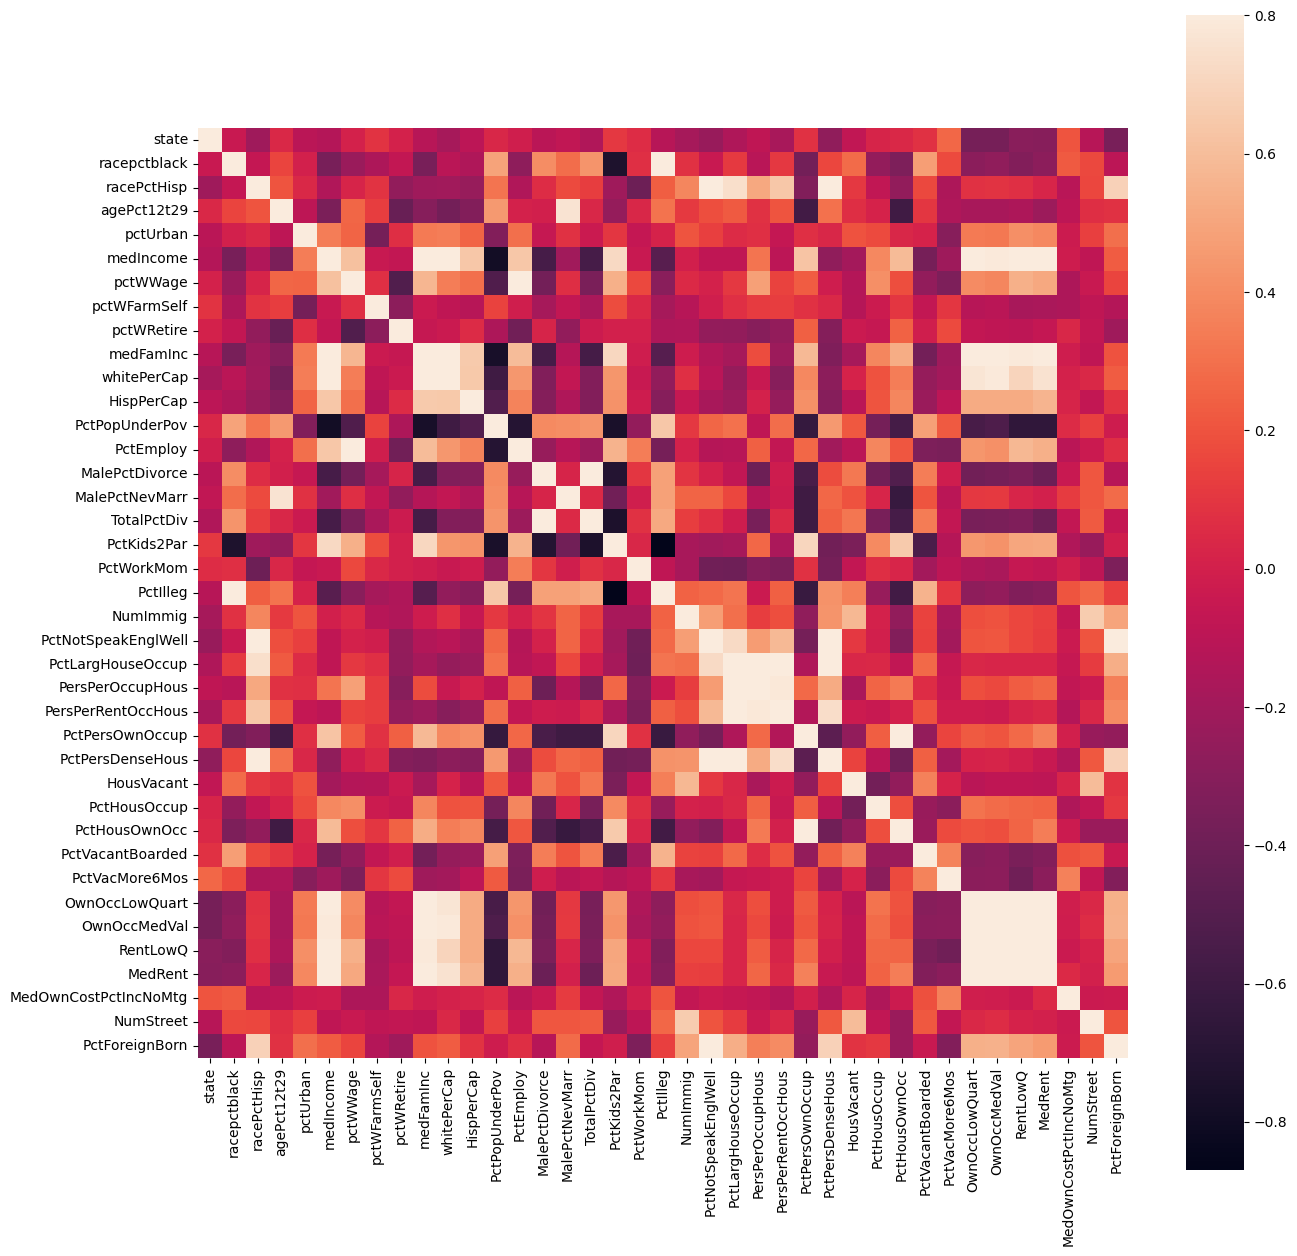

In [ ]:
PCorr_mat = X_restricted.corr()
fig = plt.figure(figsize = (15,15))

sb.heatmap(PCorr_mat, vmax = .8, square = True)
plt.show()

Let us start by removing the variables with many strong correlations, since they are highly repetitive and can cause redundancy and multicollinearity in the model.

In [ ]:
predictors = X_restricted.columns.tolist()
print(predictors)

['state', 'racepctblack', 'racePctHisp', 'agePct12t29', 'pctUrban', 'medIncome', 'pctWWage', 'pctWFarmSelf', 'pctWRetire', 'medFamInc', 'whitePerCap', 'HispPerCap', 'PctPopUnderPov', 'PctEmploy', 'MalePctDivorce', 'MalePctNevMarr', 'TotalPctDiv', 'PctKids2Par', 'PctWorkMom', 'PctIlleg', 'NumImmig', 'PctNotSpeakEnglWell', 'PctLargHouseOccup', 'PersPerOccupHous', 'PersPerRentOccHous', 'PctPersOwnOccup', 'PctPersDenseHous', 'HousVacant', 'PctHousOccup', 'PctHousOwnOcc', 'PctVacantBoarded', 'PctVacMore6Mos', 'OwnOccLowQuart', 'OwnOccMedVal', 'RentLowQ', 'MedRent', 'MedOwnCostPctIncNoMtg', 'NumStreet', 'PctForeignBorn']


MedIncome and MedFamInc are very likely to be highly correlated, since family income includes the combined earnings of individuals (higher individual incomes result in higher family incomes). Both predictors show very strong positive and negative correlations with many other predictors, and have to both be removed as a consequence.

In [ ]:
predictors.remove('medFamInc')
predictors.remove('medIncome')

In [ ]:
model62=sm.OLS(y, X_restricted[predictors].assign(const=1))
results62 = model62.fit()

In [ ]:
results62.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     ViolentCrimesPerPop   R-squared:                       0.686
Model:                             OLS   Adj. R-squared:                  0.680
Method:                  Least Squares   F-statistic:                     115.3
Date:                 Sun, 15 Dec 2024   Prob (F-statistic):               0.00
Time:                         22:41:31   Log-Likelihood:                 1229.7
No. Observations:                 1994   AIC:                            -2383.
Df Residuals:                     1956   BIC:                            -2171.
Df Model:                           37                                         
Covariance Type:             nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
state                    -0.0009      0.000     -3.740      0.000      -0.001      -0.000
racepctblack              0.2157      0.029      7.468      0.000       0.159       0.272
racePctHisp               0.0737      0.036      2.031      0.042       0.003       0.145
agePct12t29              -0.2055      0.065     -3.141      0.002      -0.334      -0.077
pctUrban                  0.0404      0.009      4.598      0.000       0.023       0.058
pctWWage                 -0.2421      0.059     -4.118      0.000      -0.357      -0.127
pctWFarmSelf              0.0415      0.019      2.216      0.027       0.005       0.078
pctWRetire               -0.0993      0.031     -3.246      0.001      -0.159      -0.039
whitePerCap              -0.1506      0.048     -3.151      0.002      -0.244      -0.057
HispPerCap                0.0447      0.023      1.971      0.049       0.000       0.089
PctPopUnderPov           -0.1201      0.043     -2.803      0.005      -0.204      -0.036
PctEmploy                 0.1658      0.057      2.906      0.004       0.054       0.278
MalePctDivorce            0.2657      0.087      3.061      0.002       0.095       0.436
MalePctNevMarr            0.1747      0.052      3.328      0.001       0.072       0.278
TotalPctDiv              -0.1864      0.094     -1.988      0.047      -0.370      -0.003
PctKids2Par              -0.3352      0.070     -4.802      0.000      -0.472      -0.198
PctWorkMom               -0.1241      0.026     -4.690      0.000      -0.176      -0.072
PctIlleg                  0.1115      0.041      2.693      0.007       0.030       0.193
NumImmig                 -0.1451      0.059     -2.453      0.014      -0.261      -0.029
PctNotSpeakEnglWell      -0.1819      0.054     -3.343      0.001      -0.289      -0.075
PctLargHouseOccup        -0.1117      0.058     -1.933      0.053      -0.225       0.002
PersPerOccupHous          0.3384      0.088      3.861      0.000       0.167       0.510
PersPerRentOccHous       -0.2068      0.069     -2.991      0.003      -0.342      -0.071
PctPersOwnOccup          -0.5684      0.205     -2.775      0.006      -0.970      -0.167
PctPersDenseHous          0.1977      0.062      3.197      0.001       0.076       0.319
HousVacant                0.1406      0.033      4.232      0.000       0.075       0.206
PctHousOccup             -0.0546      0.022     -2.433      0.015      -0.099      -0.011
PctHousOwnOcc             0.4761      0.202      2.355      0.019       0.080       0.872
PctVacantBoarded          0.0558      0.020      2.765      0.006       0.016       0.095
PctVacMore6Mos           -0.0522      0.023     -2.290      0.022      -0.097      -0.008
OwnOccLowQuart           -0.4437      0.159     -2.787      0.005      -0.756      -0.131
OwnOccMedVal

RentLowQ and MedRent are two other predictors that demonstrate a strong positive correlation. Both variables are almost as redundant, but MedRent, which reflects the typical rental costs for most of the population (more relevant factor to crime rates) will be kept, and RentLowQ will be removed

In [ ]:
predictors.remove('RentLowQ')

In [ ]:
model63=sm.OLS(y, X_restricted[predictors].assign(const=1))
results63 = model63.fit()

In [ ]:
results63.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     ViolentCrimesPerPop   R-squared:                       0.682
Model:                             OLS   Adj. R-squared:                  0.677
Method:                  Least Squares   F-statistic:                     116.8
Date:                 Sun, 15 Dec 2024   Prob (F-statistic):               0.00
Time:                         22:41:31   Log-Likelihood:                 1219.7
No. Observations:                 1994   AIC:                            -2365.
Df Residuals:                     1957   BIC:                            -2158.
Df Model:                           36                                         
Covariance Type:             nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
state                    -0.0009      0.000     -3.978      0.000      -0.001      -0.000
racepctblack              0.2152      0.029      7.416      0.000       0.158       0.272
racePctHisp               0.0664      0.036      1.824      0.068      -0.005       0.138
agePct12t29              -0.2111      0.066     -3.211      0.001      -0.340      -0.082
pctUrban                  0.0394      0.009      4.459      0.000       0.022       0.057
pctWWage                 -0.2462      0.059     -4.168      0.000      -0.362      -0.130
pctWFarmSelf              0.0432      0.019      2.292      0.022       0.006       0.080
pctWRetire               -0.1068      0.031     -3.478      0.001      -0.167      -0.047
whitePerCap              -0.1379      0.048     -2.877      0.004      -0.232      -0.044
HispPerCap                0.0418      0.023      1.837      0.066      -0.003       0.086
PctPopUnderPov           -0.1146      0.043     -2.661      0.008      -0.199      -0.030
PctEmploy                 0.1475      0.057      2.580      0.010       0.035       0.260
MalePctDivorce            0.2606      0.087      2.988      0.003       0.090       0.432
MalePctNevMarr            0.1686      0.053      3.198      0.001       0.065       0.272
TotalPctDiv              -0.2025      0.094     -2.151      0.032      -0.387      -0.018
PctKids2Par              -0.3617      0.070     -5.175      0.000      -0.499      -0.225
PctWorkMom               -0.1172      0.027     -4.416      0.000      -0.169      -0.065
PctIlleg                  0.1125      0.042      2.704      0.007       0.031       0.194
NumImmig                 -0.1461      0.059     -2.458      0.014      -0.263      -0.030
PctNotSpeakEnglWell      -0.1544      0.054     -2.842      0.005      -0.261      -0.048
PctLargHouseOccup        -0.1205      0.058     -2.078      0.038      -0.234      -0.007
PersPerOccupHous          0.3836      0.087      4.384      0.000       0.212       0.555
PersPerRentOccHous       -0.2301      0.069     -3.323      0.001      -0.366      -0.094
PctPersOwnOccup          -0.6839      0.204     -3.349      0.001      -1.084      -0.283
PctPersDenseHous          0.1798      0.062      2.900      0.004       0.058       0.301
HousVacant                0.1461      0.033      4.380      0.000       0.081       0.212
PctHousOccup             -0.0511      0.023     -2.265      0.024      -0.095      -0.007
PctHousOwnOcc             0.5950      0.201      2.956      0.003       0.200       0.990
PctVacantBoarded          0.0570      0.020      2.813      0.005       0.017       0.097
PctVacMore6Mos           -0.0369      0.023     -1.627      0.104      -0.081       0.008
OwnOccLowQuart           -0.4224      0.160     -2.642      0.008      -0.736      -0.109
OwnOccMedVal

OwnOccLowQuart and OwnOccMedVal are two other highly positively correlated variables, each of which show very strong relationships with a few different predictors. OwnOccLowQuart is eliminated, while OwnOccMedVal is kept since it is a variable that represents better the housing wealth across the population.

In [ ]:
predictors.remove('OwnOccLowQuart')

In [ ]:
model64=sm.OLS(y, X_restricted[predictors].assign(const=1))
results64 = model64.fit()

In [ ]:
results64.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     ViolentCrimesPerPop   R-squared:                       0.681
Model:                             OLS   Adj. R-squared:                  0.676
Method:                  Least Squares   F-statistic:                     119.6
Date:                 Sun, 15 Dec 2024   Prob (F-statistic):               0.00
Time:                         22:41:31   Log-Likelihood:                 1216.1
No. Observations:                 1994   AIC:                            -2360.
Df Residuals:                     1958   BIC:                            -2159.
Df Model:                           35                                         
Covariance Type:             nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
state                    -0.0009      0.000     -3.707      0.000      -0.001      -0.000
racepctblack              0.2160      0.029      7.432      0.000       0.159       0.273
racePctHisp               0.0652      0.036      1.788      0.074      -0.006       0.137
agePct12t29              -0.1948      0.066     -2.972      0.003      -0.323      -0.066
pctUrban                  0.0390      0.009      4.410      0.000       0.022       0.056
pctWWage                 -0.2430      0.059     -4.108      0.000      -0.359      -0.127
pctWFarmSelf              0.0439      0.019      2.328      0.020       0.007       0.081
pctWRetire               -0.1170      0.030     -3.835      0.000      -0.177      -0.057
whitePerCap              -0.1029      0.046     -2.230      0.026      -0.193      -0.012
HispPerCap                0.0404      0.023      1.772      0.076      -0.004       0.085
PctPopUnderPov           -0.1264      0.043     -2.949      0.003      -0.211      -0.042
PctEmploy                 0.1242      0.057      2.195      0.028       0.013       0.235
MalePctDivorce            0.2582      0.087      2.956      0.003       0.087       0.429
MalePctNevMarr            0.1614      0.053      3.062      0.002       0.058       0.265
TotalPctDiv              -0.1980      0.094     -2.100      0.036      -0.383      -0.013
PctKids2Par              -0.3553      0.070     -5.079      0.000      -0.493      -0.218
PctWorkMom               -0.1192      0.027     -4.487      0.000      -0.171      -0.067
PctIlleg                  0.1186      0.042      2.851      0.004       0.037       0.200
NumImmig                 -0.1373      0.059     -2.310      0.021      -0.254      -0.021
PctNotSpeakEnglWell      -0.1455      0.054     -2.680      0.007      -0.252      -0.039
PctLargHouseOccup        -0.1234      0.058     -2.125      0.034      -0.237      -0.009
PersPerOccupHous          0.3726      0.088      4.257      0.000       0.201       0.544
PersPerRentOccHous       -0.2263      0.069     -3.264      0.001      -0.362      -0.090
PctPersOwnOccup          -0.7169      0.204     -3.512      0.000      -1.117      -0.317
PctPersDenseHous          0.1863      0.062      3.002      0.003       0.065       0.308
HousVacant                0.1418      0.033      4.250      0.000       0.076       0.207
PctHousOccup             -0.0591      0.022     -2.640      0.008      -0.103      -0.015
PctHousOwnOcc             0.6315      0.201      3.140      0.002       0.237       1.026
PctVacantBoarded          0.0587      0.020      2.894      0.004       0.019       0.098
PctVacMore6Mos           -0.0365      0.023     -1.607      0.108      -0.081       0.008
OwnOccMedVal             -0.0737      0.041     -1.797      0.072      -0.154       0.007
MedRent     

OwnOccMedVal and MedRent are highly correlated to each other and to other predictors. OwnOccMedVal is removed while MedRent is kept as it relates more directly to many socioeconomic issues that could relate to a higher crime rate.

In [ ]:
predictors.remove('OwnOccMedVal')

In [ ]:
model65=sm.OLS(y, X_restricted[predictors].assign(const=1))
results65 = model65.fit()

In [ ]:
results65.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     ViolentCrimesPerPop   R-squared:                       0.681
Model:                             OLS   Adj. R-squared:                  0.675
Method:                  Least Squares   F-statistic:                     122.9
Date:                 Sun, 15 Dec 2024   Prob (F-statistic):               0.00
Time:                         22:41:31   Log-Likelihood:                 1214.5
No. Observations:                 1994   AIC:                            -2359.
Df Residuals:                     1959   BIC:                            -2163.
Df Model:                           34                                         
Covariance Type:             nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
state                    -0.0008      0.000     -3.381      0.001      -0.001      -0.000
racepctblack              0.2219      0.029      7.678      0.000       0.165       0.279
racePctHisp               0.0666      0.036      1.825      0.068      -0.005       0.138
agePct12t29              -0.1914      0.066     -2.920      0.004      -0.320      -0.063
pctUrban                  0.0401      0.009      4.548      0.000       0.023       0.057
pctWWage                 -0.2199      0.058     -3.807      0.000      -0.333      -0.107
pctWFarmSelf              0.0412      0.019      2.189      0.029       0.004       0.078
pctWRetire               -0.1191      0.030     -3.905      0.000      -0.179      -0.059
whitePerCap              -0.1453      0.040     -3.663      0.000      -0.223      -0.068
HispPerCap                0.0410      0.023      1.798      0.072      -0.004       0.086
PctPopUnderPov           -0.1283      0.043     -2.993      0.003      -0.212      -0.044
PctEmploy                 0.1169      0.056      2.071      0.038       0.006       0.228
MalePctDivorce            0.2545      0.087      2.914      0.004       0.083       0.426
MalePctNevMarr            0.1462      0.052      2.808      0.005       0.044       0.248
TotalPctDiv              -0.2000      0.094     -2.120      0.034      -0.385      -0.015
PctKids2Par              -0.3604      0.070     -5.153      0.000      -0.498      -0.223
PctWorkMom               -0.1188      0.027     -4.469      0.000      -0.171      -0.067
PctIlleg                  0.1240      0.042      2.988      0.003       0.043       0.205
NumImmig                 -0.1442      0.059     -2.431      0.015      -0.261      -0.028
PctNotSpeakEnglWell      -0.1374      0.054     -2.538      0.011      -0.244      -0.031
PctLargHouseOccup        -0.1158      0.058     -1.997      0.046      -0.229      -0.002
PersPerOccupHous          0.3370      0.085      3.951      0.000       0.170       0.504
PersPerRentOccHous       -0.2186      0.069     -3.157      0.002      -0.354      -0.083
PctPersOwnOccup          -0.7038      0.204     -3.448      0.001      -1.104      -0.303
PctPersDenseHous          0.1878      0.062      3.026      0.003       0.066       0.310
HousVacant                0.1497      0.033      4.524      0.000       0.085       0.215
PctHousOccup             -0.0631      0.022     -2.833      0.005      -0.107      -0.019
PctHousOwnOcc             0.6401      0.201      3.181      0.001       0.246       1.035
PctVacantBoarded          0.0584      0.020      2.876      0.004       0.019       0.098
PctVacMore6Mos           -0.0414      0.023     -1.836      0.066      -0.086       0.003
MedRent                  -0.0044      0.038     -0.115      0.909      -0.080       0.071
MedOwnCostPc

PctKids2Par displays many strong correlations with different predictors, such as PctIlleg. Indeed, illegitimate children are less likely to have both parents. PctKids2Par is eliminated.

In [ ]:
predictors.remove('PctKids2Par')

In [ ]:
model66=sm.OLS(y, X_restricted[predictors].assign(const=1))
results66 = model66.fit()

In [ ]:
results66.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     ViolentCrimesPerPop   R-squared:                       0.676
Model:                             OLS   Adj. R-squared:                  0.671
Method:                  Least Squares   F-statistic:                     124.2
Date:                 Sun, 15 Dec 2024   Prob (F-statistic):               0.00
Time:                         22:41:32   Log-Likelihood:                 1201.1
No. Observations:                 1994   AIC:                            -2334.
Df Residuals:                     1960   BIC:                            -2144.
Df Model:                           33                                         
Covariance Type:             nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
state                    -0.0008      0.000     -3.657      0.000      -0.001      -0.000
racepctblack              0.2638      0.028      9.451      0.000       0.209       0.319
racePctHisp               0.0779      0.037      2.127      0.034       0.006       0.150
agePct12t29              -0.2334      0.065     -3.565      0.000      -0.362      -0.105
pctUrban                  0.0425      0.009      4.791      0.000       0.025       0.060
pctWWage                 -0.2582      0.058     -4.476      0.000      -0.371      -0.145
pctWFarmSelf              0.0282      0.019      1.502      0.133      -0.009       0.065
pctWRetire               -0.1105      0.031     -3.607      0.000      -0.171      -0.050
whitePerCap              -0.1662      0.040     -4.183      0.000      -0.244      -0.088
HispPerCap                0.0393      0.023      1.714      0.087      -0.006       0.084
PctPopUnderPov           -0.0827      0.042     -1.957      0.050      -0.166       0.000
PctEmploy                 0.0939      0.057      1.659      0.097      -0.017       0.205
MalePctDivorce            0.2239      0.088      2.553      0.011       0.052       0.396
MalePctNevMarr            0.2049      0.051      4.006      0.000       0.105       0.305
TotalPctDiv              -0.0519      0.090     -0.574      0.566      -0.229       0.125
PctWorkMom               -0.0956      0.026     -3.627      0.000      -0.147      -0.044
PctIlleg                  0.2320      0.036      6.434      0.000       0.161       0.303
NumImmig                 -0.1317      0.060     -2.207      0.027      -0.249      -0.015
PctNotSpeakEnglWell      -0.1259      0.054     -2.313      0.021      -0.233      -0.019
PctLargHouseOccup        -0.1027      0.058     -1.762      0.078      -0.217       0.012
PersPerOccupHous          0.2979      0.086      3.484      0.001       0.130       0.466
PersPerRentOccHous       -0.1918      0.070     -2.759      0.006      -0.328      -0.055
PctPersOwnOccup          -0.7723      0.205     -3.767      0.000      -1.174      -0.370
PctPersDenseHous          0.1717      0.062      2.752      0.006       0.049       0.294
HousVacant                0.1417      0.033      4.257      0.000       0.076       0.207
PctHousOccup             -0.0688      0.022     -3.072      0.002      -0.113      -0.025
PctHousOwnOcc             0.6945      0.202      3.434      0.001       0.298       1.091
PctVacantBoarded          0.0632      0.020      3.095      0.002       0.023       0.103
PctVacMore6Mos           -0.0435      0.023     -1.920      0.055      -0.088       0.001
MedRent                  -0.0109      0.039     -0.282      0.778      -0.086       0.065
MedOwnCostPctIncNoMtg    -0.0669      0.021     -3.245      0.001      -0.107      -0.026
NumStreet   

Next, PctLargHousOccup, PersPerOccupHous and PersPerRentOccHous can be compared, asthey all share strong positive correlations with one another as well as with other variables. PersPerOccupHous would be the most relevant predictor to keep out of the three, since it directly measures the density of people per occupied house, which would be more interesting to correlate with crime.

In [ ]:
predictors.remove('PctLargHouseOccup')
predictors.remove('PersPerRentOccHous')

In [ ]:
model67=sm.OLS(y, X_restricted[predictors].assign(const=1))
results67 = model67.fit()

In [ ]:
results67.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     ViolentCrimesPerPop   R-squared:                       0.674
Model:                             OLS   Adj. R-squared:                  0.669
Method:                  Least Squares   F-statistic:                     131.1
Date:                 Sun, 15 Dec 2024   Prob (F-statistic):               0.00
Time:                         22:41:32   Log-Likelihood:                 1194.6
No. Observations:                 1994   AIC:                            -2325.
Df Residuals:                     1962   BIC:                            -2146.
Df Model:                           31                                         
Covariance Type:             nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
state                    -0.0009      0.000     -4.103      0.000      -0.001      -0.000
racepctblack              0.2585      0.028      9.250      0.000       0.204       0.313
racePctHisp               0.0751      0.037      2.049      0.041       0.003       0.147
agePct12t29              -0.2555      0.065     -3.938      0.000      -0.383      -0.128
pctUrban                  0.0411      0.009      4.635      0.000       0.024       0.059
pctWWage                 -0.2223      0.055     -4.018      0.000      -0.331      -0.114
pctWFarmSelf              0.0203      0.019      1.090      0.276      -0.016       0.057
pctWRetire               -0.1112      0.031     -3.632      0.000      -0.171      -0.051
whitePerCap              -0.1509      0.039     -3.837      0.000      -0.228      -0.074
HispPerCap                0.0417      0.023      1.815      0.070      -0.003       0.087
PctPopUnderPov           -0.0775      0.042     -1.831      0.067      -0.160       0.006
PctEmploy                 0.1022      0.057      1.808      0.071      -0.009       0.213
MalePctDivorce            0.2365      0.087      2.703      0.007       0.065       0.408
MalePctNevMarr            0.2089      0.049      4.281      0.000       0.113       0.305
TotalPctDiv              -0.0832      0.090     -0.925      0.355      -0.260       0.093
PctWorkMom               -0.1029      0.026     -3.908      0.000      -0.155      -0.051
PctIlleg                  0.2374      0.036      6.573      0.000       0.167       0.308
NumImmig                 -0.1204      0.060     -2.016      0.044      -0.238      -0.003
PctNotSpeakEnglWell      -0.1103      0.054     -2.028      0.043      -0.217      -0.004
PersPerOccupHous          0.0630      0.054      1.177      0.240      -0.042       0.168
PctPersOwnOccup          -0.3946      0.129     -3.050      0.002      -0.648      -0.141
PctPersDenseHous          0.1133      0.056      2.016      0.044       0.003       0.224
HousVacant                0.1361      0.033      4.083      0.000       0.071       0.201
PctHousOccup             -0.0658      0.022     -2.933      0.003      -0.110      -0.022
PctHousOwnOcc             0.3349      0.131      2.557      0.011       0.078       0.592
PctVacantBoarded          0.0583      0.020      2.857      0.004       0.018       0.098
PctVacMore6Mos           -0.0430      0.023     -1.892      0.059      -0.088       0.002
MedRent                  -0.0280      0.038     -0.737      0.462      -0.103       0.047
MedOwnCostPctIncNoMtg    -0.0658      0.021     -3.183      0.001      -0.106      -0.025
NumStreet                 0.1924      0.044      4.412      0.000       0.107       0.278
PctForeignBorn            0.0666      0.041      1.635      0.102      -0.013       0.147
const       

PctPersOwnOccup is also to be removed since it is highly redundant and overlaps with many different variables such as agePct12t29 and PctPopUnderPov, expressing a strong multicollinearity.

In [ ]:
predictors.remove('PctPersOwnOccup')

In [ ]:
model68=sm.OLS(y, X_restricted[predictors].assign(const=1))
results68 = model68.fit()

In [ ]:
results68.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     ViolentCrimesPerPop   R-squared:                       0.673
Model:                             OLS   Adj. R-squared:                  0.668
Method:                  Least Squares   F-statistic:                     134.6
Date:                 Sun, 15 Dec 2024   Prob (F-statistic):               0.00
Time:                         22:41:32   Log-Likelihood:                 1189.9
No. Observations:                 1994   AIC:                            -2318.
Df Residuals:                     1963   BIC:                            -2144.
Df Model:                           30                                         
Covariance Type:             nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
state                    -0.0009      0.000     -4.092      0.000      -0.001      -0.000
racepctblack              0.2637      0.028      9.432      0.000       0.209       0.319
racePctHisp               0.0633      0.037      1.733      0.083      -0.008       0.135
agePct12t29              -0.2051      0.063     -3.262      0.001      -0.328      -0.082
pctUrban                  0.0384      0.009      4.338      0.000       0.021       0.056
pctWWage                 -0.2416      0.055     -4.388      0.000      -0.350      -0.134
pctWFarmSelf              0.0239      0.019      1.283      0.200      -0.013       0.061
pctWRetire               -0.0959      0.030     -3.166      0.002      -0.155      -0.036
whitePerCap              -0.1583      0.039     -4.024      0.000      -0.235      -0.081
HispPerCap                0.0338      0.023      1.478      0.140      -0.011       0.079
PctPopUnderPov           -0.0489      0.041     -1.182      0.237      -0.130       0.032
PctEmploy                 0.1124      0.057      1.986      0.047       0.001       0.223
MalePctDivorce            0.2412      0.088      2.752      0.006       0.069       0.413
MalePctNevMarr            0.1647      0.047      3.527      0.000       0.073       0.256
TotalPctDiv              -0.0701      0.090     -0.778      0.437      -0.247       0.107
PctWorkMom               -0.1059      0.026     -4.017      0.000      -0.158      -0.054
PctIlleg                  0.2507      0.036      6.977      0.000       0.180       0.321
NumImmig                 -0.1248      0.060     -2.087      0.037      -0.242      -0.008
PctNotSpeakEnglWell      -0.1025      0.054     -1.882      0.060      -0.209       0.004
PersPerOccupHous          0.0625      0.054      1.165      0.244      -0.043       0.168
PctPersDenseHous          0.1382      0.056      2.480      0.013       0.029       0.248
HousVacant                0.1303      0.033      3.906      0.000       0.065       0.196
PctHousOccup             -0.0739      0.022     -3.310      0.001      -0.118      -0.030
PctHousOwnOcc            -0.0429      0.043     -1.009      0.313      -0.126       0.041
PctVacantBoarded          0.0537      0.020      2.634      0.009       0.014       0.094
PctVacMore6Mos           -0.0364      0.023     -1.607      0.108      -0.081       0.008
MedRent                   0.0132      0.036      0.370      0.711      -0.057       0.083
MedOwnCostPctIncNoMtg    -0.0758      0.020     -3.709      0.000      -0.116      -0.036
NumStreet                 0.1979      0.044      4.532      0.000       0.112       0.284
PctForeignBorn            0.0705      0.041      1.726      0.085      -0.010       0.151
const                     0.3471      0.069      4.995      0.000       0.211       0.483
============

PctHousOwnOcc also expresses strong correlations with many other predictors, such as agePct12t29 and PctPopUndPov, and has to be removed as a result.

In [ ]:
predictors.remove('PctHousOwnOcc')

In [ ]:
model69=sm.OLS(y, X_restricted[predictors].assign(const=1))
results69 = model69.fit()

In [ ]:
results69.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     ViolentCrimesPerPop   R-squared:                       0.673
Model:                             OLS   Adj. R-squared:                  0.668
Method:                  Least Squares   F-statistic:                     139.2
Date:                 Sun, 15 Dec 2024   Prob (F-statistic):               0.00
Time:                         22:41:32   Log-Likelihood:                 1189.4
No. Observations:                 1994   AIC:                            -2319.
Df Residuals:                     1964   BIC:                            -2151.
Df Model:                           29                                         
Covariance Type:             nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
state                    -0.0009      0.000     -4.007      0.000      -0.001      -0.000
racepctblack              0.2610      0.028      9.378      0.000       0.206       0.316
racePctHisp               0.0593      0.036      1.633      0.103      -0.012       0.131
agePct12t29              -0.1890      0.061     -3.107      0.002      -0.308      -0.070
pctUrban                  0.0377      0.009      4.275      0.000       0.020       0.055
pctWWage                 -0.2406      0.055     -4.370      0.000      -0.349      -0.133
pctWFarmSelf              0.0234      0.019      1.255      0.210      -0.013       0.060
pctWRetire               -0.0953      0.030     -3.148      0.002      -0.155      -0.036
whitePerCap              -0.1627      0.039     -4.164      0.000      -0.239      -0.086
HispPerCap                0.0323      0.023      1.416      0.157      -0.012       0.077
PctPopUnderPov           -0.0464      0.041     -1.123      0.261      -0.127       0.035
PctEmploy                 0.1252      0.055      2.271      0.023       0.017       0.233
MalePctDivorce            0.2332      0.087      2.672      0.008       0.062       0.404
MalePctNevMarr            0.1691      0.047      3.636      0.000       0.078       0.260
TotalPctDiv              -0.0535      0.089     -0.604      0.546      -0.227       0.120
PctWorkMom               -0.1134      0.025     -4.477      0.000      -0.163      -0.064
PctIlleg                  0.2593      0.035      7.429      0.000       0.191       0.328
NumImmig                 -0.1254      0.060     -2.096      0.036      -0.243      -0.008
PctNotSpeakEnglWell      -0.0996      0.054     -1.831      0.067      -0.206       0.007
PersPerOccupHous          0.0363      0.047      0.772      0.440      -0.056       0.128
PctPersDenseHous          0.1484      0.055      2.706      0.007       0.041       0.256
HousVacant                0.1283      0.033      3.855      0.000       0.063       0.194
PctHousOccup             -0.0730      0.022     -3.274      0.001      -0.117      -0.029
PctVacantBoarded          0.0527      0.020      2.587      0.010       0.013       0.093
PctVacMore6Mos           -0.0379      0.023     -1.673      0.094      -0.082       0.007
MedRent                   0.0087      0.035      0.247      0.805      -0.061       0.078
MedOwnCostPctIncNoMtg    -0.0730      0.020     -3.604      0.000      -0.113      -0.033
NumStreet                 0.1986      0.044      4.549      0.000       0.113       0.284
PctForeignBorn            0.0771      0.040      1.914      0.056      -0.002       0.156
const                     0.3154      0.062      5.089      0.000       0.194       0.437
==============================================================================
Omnibus:               

TotalPctDiv and MalePctDivorce also show a strong positive correlation, as shown in the correlaion heatmap, since a higher number of males being divorced impacts directly the total number of divorce and increases them. TotalPctDiv is kept because it englobes overall divorce rates across all genders, making it a broader and more comprehensive predictor than MalePctDivorce.

In [ ]:
predictors.remove('MalePctDivorce')

In [ ]:
model70=sm.OLS(y, X_restricted[predictors].assign(const=1))
results70 = model70.fit()

In [ ]:
results70.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     ViolentCrimesPerPop   R-squared:                       0.671
Model:                             OLS   Adj. R-squared:                  0.667
Method:                  Least Squares   F-statistic:                     143.4
Date:                 Sun, 15 Dec 2024   Prob (F-statistic):               0.00
Time:                         22:41:33   Log-Likelihood:                 1185.8
No. Observations:                 1994   AIC:                            -2314.
Df Residuals:                     1965   BIC:                            -2151.
Df Model:                           28                                         
Covariance Type:             nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
state                    -0.0009      0.000     -3.799      0.000      -0.001      -0.000
racepctblack              0.2517      0.028      9.102      0.000       0.197       0.306
racePctHisp               0.0535      0.036      1.474      0.141      -0.018       0.125
agePct12t29              -0.2082      0.060     -3.442      0.001      -0.327      -0.090
pctUrban                  0.0360      0.009      4.083      0.000       0.019       0.053
pctWWage                 -0.2209      0.055     -4.042      0.000      -0.328      -0.114
pctWFarmSelf              0.0225      0.019      1.204      0.229      -0.014       0.059
pctWRetire               -0.0948      0.030     -3.126      0.002      -0.154      -0.035
whitePerCap              -0.1774      0.039     -4.576      0.000      -0.253      -0.101
HispPerCap                0.0316      0.023      1.383      0.167      -0.013       0.076
PctPopUnderPov           -0.0619      0.041     -1.513      0.130      -0.142       0.018
PctEmploy                 0.1071      0.055      1.955      0.051      -0.000       0.215
MalePctNevMarr            0.1745      0.047      3.750      0.000       0.083       0.266
TotalPctDiv               0.1672      0.032      5.240      0.000       0.105       0.230
PctWorkMom               -0.1133      0.025     -4.466      0.000      -0.163      -0.064
PctIlleg                  0.2678      0.035      7.692      0.000       0.200       0.336
NumImmig                 -0.1306      0.060     -2.180      0.029      -0.248      -0.013
PctNotSpeakEnglWell      -0.1079      0.054     -1.984      0.047      -0.215      -0.001
PersPerOccupHous          0.0162      0.046      0.348      0.728      -0.075       0.107
PctPersDenseHous          0.1622      0.055      2.967      0.003       0.055       0.269
HousVacant                0.1299      0.033      3.897      0.000       0.065       0.195
PctHousOccup             -0.0797      0.022     -3.591      0.000      -0.123      -0.036
PctVacantBoarded          0.0580      0.020      2.853      0.004       0.018       0.098
PctVacMore6Mos           -0.0334      0.023     -1.478      0.140      -0.078       0.011
MedRent                   0.0127      0.035      0.358      0.721      -0.057       0.082
MedOwnCostPctIncNoMtg    -0.0723      0.020     -3.566      0.000      -0.112      -0.033
NumStreet                 0.2047      0.044      4.686      0.000       0.119       0.290
PctForeignBorn            0.0751      0.040      1.862      0.063      -0.004       0.154
const                     0.3380      0.061      5.496      0.000       0.217       0.459
==============================================================================
Omnibus:                      386.517   Durbin-Watson:                   2.008
Prob(Omnibus):                  0.

PctPopUnderPov shows many strong negative correlations with other predictors, such as PctEmploy and PctPersOwnOccup, and is removed as a result.

In [ ]:
predictors.remove('PctPopUnderPov')

In [ ]:
model71=sm.OLS(y, X_restricted[predictors].assign(const=1))
results71 = model71.fit()

In [ ]:
results71.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     ViolentCrimesPerPop   R-squared:                       0.671
Model:                             OLS   Adj. R-squared:                  0.667
Method:                  Least Squares   F-statistic:                     148.6
Date:                 Sun, 15 Dec 2024   Prob (F-statistic):               0.00
Time:                         22:41:33   Log-Likelihood:                 1184.6
No. Observations:                 1994   AIC:                            -2313.
Df Residuals:                     1966   BIC:                            -2156.
Df Model:                           27                                         
Covariance Type:             nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
state                    -0.0009      0.000     -3.809      0.000      -0.001      -0.000
racepctblack              0.2441      0.027      8.974      0.000       0.191       0.297
racePctHisp               0.0523      0.036      1.441      0.150      -0.019       0.124
agePct12t29              -0.2306      0.059     -3.932      0.000      -0.346      -0.116
pctUrban                  0.0368      0.009      4.180      0.000       0.020       0.054
pctWWage                 -0.2112      0.054     -3.890      0.000      -0.318      -0.105
pctWFarmSelf              0.0188      0.019      1.013      0.311      -0.018       0.055
pctWRetire               -0.0767      0.028     -2.752      0.006      -0.131      -0.022
whitePerCap              -0.1735      0.039     -4.485      0.000      -0.249      -0.098
HispPerCap                0.0301      0.023      1.319      0.187      -0.015       0.075
PctEmploy                 0.1401      0.050      2.787      0.005       0.042       0.239
MalePctNevMarr            0.1709      0.046      3.677      0.000       0.080       0.262
TotalPctDiv               0.1622      0.032      5.109      0.000       0.100       0.224
PctWorkMom               -0.1062      0.025     -4.260      0.000      -0.155      -0.057
PctIlleg                  0.2645      0.035      7.610      0.000       0.196       0.333
NumImmig                 -0.1309      0.060     -2.186      0.029      -0.248      -0.013
PctNotSpeakEnglWell      -0.1119      0.054     -2.059      0.040      -0.218      -0.005
PersPerOccupHous          0.0186      0.046      0.401      0.689      -0.072       0.110
PctPersDenseHous          0.1525      0.054      2.809      0.005       0.046       0.259
HousVacant                0.1291      0.033      3.870      0.000       0.064       0.194
PctHousOccup             -0.0790      0.022     -3.559      0.000      -0.123      -0.035
PctVacantBoarded          0.0556      0.020      2.744      0.006       0.016       0.095
PctVacMore6Mos           -0.0336      0.023     -1.485      0.138      -0.078       0.011
MedRent                   0.0215      0.035      0.617      0.537      -0.047       0.090
MedOwnCostPctIncNoMtg    -0.0721      0.020     -3.554      0.000      -0.112      -0.032
NumStreet                 0.2064      0.044      4.725      0.000       0.121       0.292
PctForeignBorn            0.0836      0.040      2.091      0.037       0.005       0.162
const                     0.2981      0.056      5.363      0.000       0.189       0.407
==============================================================================
Omnibus:                      385.655   Durbin-Watson:                   2.004
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1291.742
Skew:                           0.948   Prob(

PctEmploy and PctWWage are two strongly positively correlated predictors, as it can be observed on the heatmap. Higher employment rates lead to more people earning wages. PctWWage will be removed, and PctEmploy would be kept, since it is a broader predictor that takes other aspects such as the wage and the working environment into account.

In [ ]:
predictors.remove('pctWWage')

In [ ]:
model72=sm.OLS(y, X_restricted[predictors].assign(const=1))
results72 = model72.fit()

In [ ]:
results72.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     ViolentCrimesPerPop   R-squared:                       0.669
Model:                             OLS   Adj. R-squared:                  0.664
Method:                  Least Squares   F-statistic:                     152.6
Date:                 Sun, 15 Dec 2024   Prob (F-statistic):               0.00
Time:                         22:41:33   Log-Likelihood:                 1177.0
No. Observations:                 1994   AIC:                            -2300.
Df Residuals:                     1967   BIC:                            -2149.
Df Model:                           26                                         
Covariance Type:             nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
state                    -0.0010      0.000     -4.358      0.000      -0.001      -0.001
racepctblack              0.2342      0.027      8.618      0.000       0.181       0.288
racePctHisp               0.0370      0.036      1.022      0.307      -0.034       0.108
agePct12t29              -0.3071      0.055     -5.537      0.000      -0.416      -0.198
pctUrban                  0.0341      0.009      3.876      0.000       0.017       0.051
pctWFarmSelf              0.0201      0.019      1.081      0.280      -0.016       0.057
pctWRetire               -0.0503      0.027     -1.853      0.064      -0.104       0.003
whitePerCap              -0.1878      0.039     -4.857      0.000      -0.264      -0.112
HispPerCap                0.0251      0.023      1.096      0.273      -0.020       0.070
PctEmploy                 0.0105      0.038      0.277      0.782      -0.064       0.085
MalePctNevMarr            0.1722      0.047      3.692      0.000       0.081       0.264
TotalPctDiv               0.1627      0.032      5.107      0.000       0.100       0.225
PctWorkMom               -0.1066      0.025     -4.257      0.000      -0.156      -0.057
PctIlleg                  0.2792      0.035      8.050      0.000       0.211       0.347
NumImmig                 -0.1335      0.060     -2.221      0.026      -0.251      -0.016
PctNotSpeakEnglWell      -0.0863      0.054     -1.595      0.111      -0.192       0.020
PersPerOccupHous         -0.0541      0.043     -1.270      0.204      -0.138       0.029
PctPersDenseHous          0.1760      0.054      3.249      0.001       0.070       0.282
HousVacant                0.1268      0.033      3.788      0.000       0.061       0.192
PctHousOccup             -0.0850      0.022     -3.825      0.000      -0.129      -0.041
PctVacantBoarded          0.0554      0.020      2.727      0.006       0.016       0.095
PctVacMore6Mos           -0.0306      0.023     -1.348      0.178      -0.075       0.014
MedRent                   0.0100      0.035      0.287      0.774      -0.058       0.078
MedOwnCostPctIncNoMtg    -0.0610      0.020     -3.026      0.003      -0.101      -0.021
NumStreet                 0.2079      0.044      4.743      0.000       0.122       0.294
PctForeignBorn            0.0720      0.040      1.801      0.072      -0.006       0.150
const                     0.3131      0.056      5.625      0.000       0.204       0.422
==============================================================================
Omnibus:                      392.379   Durbin-Watson:                   1.995
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1296.918
Skew:                           0.968   Prob(JB):                    2.39e-282
Kurtosis:                       6.444   Cond. No.       

WhitePerCap is redundant with a few variables like MedIncome or MedRent, displaying strong positive correlations and has to be taken away to avoid multicollinearity.

In [ ]:
predictors.remove('whitePerCap')

In [ ]:
model73=sm.OLS(y, X_restricted[predictors].assign(const=1))
results73 = model73.fit()

In [ ]:
results73.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     ViolentCrimesPerPop   R-squared:                       0.665
Model:                             OLS   Adj. R-squared:                  0.660
Method:                  Least Squares   F-statistic:                     156.0
Date:                 Sun, 15 Dec 2024   Prob (F-statistic):               0.00
Time:                         22:41:33   Log-Likelihood:                 1165.1
No. Observations:                 1994   AIC:                            -2278.
Df Residuals:                     1968   BIC:                            -2133.
Df Model:                           25                                         
Covariance Type:             nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
state                    -0.0010      0.000     -4.319      0.000      -0.001      -0.001
racepctblack              0.1878      0.026      7.340      0.000       0.138       0.238
racePctHisp               0.0212      0.036      0.585      0.559      -0.050       0.092
agePct12t29              -0.1962      0.051     -3.860      0.000      -0.296      -0.097
pctUrban                  0.0328      0.009      3.704      0.000       0.015       0.050
pctWFarmSelf              0.0050      0.018      0.272      0.785      -0.031       0.041
pctWRetire               -0.0219      0.027     -0.822      0.411      -0.074       0.030
HispPerCap                0.0016      0.023      0.073      0.942      -0.043       0.046
PctEmploy                -0.0321      0.037     -0.868      0.386      -0.105       0.040
MalePctNevMarr            0.1263      0.046      2.748      0.006       0.036       0.216
TotalPctDiv               0.2031      0.031      6.565      0.000       0.142       0.264
PctWorkMom               -0.0678      0.024     -2.841      0.005      -0.115      -0.021
PctIlleg                  0.3000      0.035      8.669      0.000       0.232       0.368
NumImmig                 -0.1268      0.060     -2.098      0.036      -0.245      -0.008
PctNotSpeakEnglWell      -0.0737      0.054     -1.355      0.175      -0.180       0.033
PersPerOccupHous          0.0133      0.041      0.327      0.744      -0.066       0.093
PctPersDenseHous          0.1901      0.054      3.494      0.000       0.083       0.297
HousVacant                0.1151      0.034      3.429      0.001       0.049       0.181
PctHousOccup             -0.0897      0.022     -4.013      0.000      -0.133      -0.046
PctVacantBoarded          0.0522      0.020      2.554      0.011       0.012       0.092
PctVacMore6Mos           -0.0227      0.023     -1.000      0.317      -0.067       0.022
MedRent                  -0.0691      0.031     -2.226      0.026      -0.130      -0.008
MedOwnCostPctIncNoMtg    -0.0386      0.020     -1.958      0.050      -0.077    7.18e-05
NumStreet                 0.2039      0.044      4.627      0.000       0.117       0.290
PctForeignBorn            0.0631      0.040      1.570      0.117      -0.016       0.142
const                     0.1852      0.049      3.756      0.000       0.089       0.282
==============================================================================
Omnibus:                      389.483   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1308.443
Skew:                           0.956   Prob(JB):                    7.50e-285
Kurtosis:                       6.478   Cond. No.                         792.
===================================================================

RacePctHisp is removed due to its redundancy with other predictors like PctNotSpeakEngWell or NumImmig.

In [ ]:
predictors.remove('racePctHisp')

In [ ]:
model74=sm.OLS(y, X_restricted[predictors].assign(const=1))
results74 = model74.fit()

In [ ]:
results74.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     ViolentCrimesPerPop   R-squared:                       0.665
Model:                             OLS   Adj. R-squared:                  0.660
Method:                  Least Squares   F-statistic:                     162.5
Date:                 Sun, 15 Dec 2024   Prob (F-statistic):               0.00
Time:                         22:41:33   Log-Likelihood:                 1164.9
No. Observations:                 1994   AIC:                            -2280.
Df Residuals:                     1969   BIC:                            -2140.
Df Model:                           24                                         
Covariance Type:             nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
state                    -0.0010      0.000     -4.318      0.000      -0.001      -0.001
racepctblack              0.1856      0.025      7.336      0.000       0.136       0.235
agePct12t29              -0.1960      0.051     -3.856      0.000      -0.296      -0.096
pctUrban                  0.0327      0.009      3.691      0.000       0.015       0.050
pctWFarmSelf              0.0060      0.018      0.325      0.745      -0.030       0.042
pctWRetire               -0.0213      0.027     -0.800      0.424      -0.074       0.031
HispPerCap                0.0016      0.023      0.072      0.943      -0.043       0.046
PctEmploy                -0.0316      0.037     -0.855      0.393      -0.104       0.041
MalePctNevMarr            0.1264      0.046      2.751      0.006       0.036       0.216
TotalPctDiv               0.2046      0.031      6.637      0.000       0.144       0.265
PctWorkMom               -0.0689      0.024     -2.897      0.004      -0.116      -0.022
PctIlleg                  0.2996      0.035      8.660      0.000       0.232       0.367
NumImmig                 -0.1295      0.060     -2.150      0.032      -0.248      -0.011
PctNotSpeakEnglWell      -0.0589      0.048     -1.224      0.221      -0.153       0.035
PersPerOccupHous          0.0147      0.040      0.363      0.717      -0.065       0.094
PctPersDenseHous          0.2000      0.052      3.873      0.000       0.099       0.301
HousVacant                0.1168      0.033      3.495      0.000       0.051       0.182
PctHousOccup             -0.0905      0.022     -4.057      0.000      -0.134      -0.047
PctVacantBoarded          0.0523      0.020      2.559      0.011       0.012       0.092
PctVacMore6Mos           -0.0226      0.023     -0.992      0.321      -0.067       0.022
MedRent                  -0.0679      0.031     -2.194      0.028      -0.129      -0.007
MedOwnCostPctIncNoMtg    -0.0387      0.020     -1.962      0.050      -0.077   -1.25e-05
NumStreet                 0.2031      0.044      4.610      0.000       0.117       0.289
PctForeignBorn            0.0591      0.040      1.493      0.136      -0.019       0.137
const                     0.1839      0.049      3.734      0.000       0.087       0.281
==============================================================================
Omnibus:                      389.429   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1311.874
Skew:                           0.955   Prob(JB):                    1.35e-285
Kurtosis:                       6.485   Cond. No.                         791.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is

MalePctNevMarr is also a redundant variable that strongly correlates with other predictors such as TotalPctDivorce amd agePct12t29 and is thus removed.

In [ ]:
predictors.remove('MalePctNevMarr')

In [ ]:
model75=sm.OLS(y, X_restricted[predictors].assign(const=1))
results75 = model75.fit()

In [ ]:
results75.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     ViolentCrimesPerPop   R-squared:                       0.663
Model:                             OLS   Adj. R-squared:                  0.659
Method:                  Least Squares   F-statistic:                     168.7
Date:                 Sun, 15 Dec 2024   Prob (F-statistic):               0.00
Time:                         22:41:34   Log-Likelihood:                 1161.1
No. Observations:                 1994   AIC:                            -2274.
Df Residuals:                     1970   BIC:                            -2140.
Df Model:                           23                                         
Covariance Type:             nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
state                    -0.0010      0.000     -4.320      0.000      -0.001      -0.001
racepctblack              0.1785      0.025      7.079      0.000       0.129       0.228
agePct12t29              -0.0804      0.029     -2.807      0.005      -0.137      -0.024
pctUrban                  0.0346      0.009      3.919      0.000       0.017       0.052
pctWFarmSelf              0.0047      0.018      0.256      0.798      -0.031       0.041
pctWRetire               -0.0252      0.027     -0.945      0.345      -0.077       0.027
HispPerCap                0.0048      0.023      0.214      0.831      -0.039       0.049
PctEmploy                -0.0547      0.036     -1.519      0.129      -0.125       0.016
TotalPctDiv               0.1857      0.030      6.170      0.000       0.127       0.245
PctWorkMom               -0.0601      0.024     -2.547      0.011      -0.106      -0.014
PctIlleg                  0.3319      0.033     10.182      0.000       0.268       0.396
NumImmig                 -0.1340      0.060     -2.222      0.026      -0.252      -0.016
PctNotSpeakEnglWell      -0.0581      0.048     -1.205      0.228      -0.153       0.036
PersPerOccupHous         -0.0309      0.037     -0.835      0.404      -0.103       0.042
PctPersDenseHous          0.2034      0.052      3.933      0.000       0.102       0.305
HousVacant                0.1203      0.033      3.594      0.000       0.055       0.186
PctHousOccup             -0.0757      0.022     -3.493      0.000      -0.118      -0.033
PctVacantBoarded          0.0617      0.020      3.058      0.002       0.022       0.101
PctVacMore6Mos           -0.0174      0.023     -0.765      0.444      -0.062       0.027
MedRent                  -0.0370      0.029     -1.281      0.201      -0.094       0.020
MedOwnCostPctIncNoMtg    -0.0318      0.020     -1.623      0.105      -0.070       0.007
NumStreet                 0.2146      0.044      4.886      0.000       0.128       0.301
PctForeignBorn            0.0720      0.039      1.827      0.068      -0.005       0.149
const                     0.1786      0.049      3.623      0.000       0.082       0.275
==============================================================================
Omnibus:                      390.809   Durbin-Watson:                   1.995
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1312.868
Skew:                           0.959   Prob(JB):                    8.21e-286
Kurtosis:                       6.482   Cond. No.                         764.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

PctForeignBorn, PctNotSpeakEngWell and NumImmig also suggest strong positive correlations. PctNotSpeakEngWell is more likely to be most relevant to crime rates all while refering to foreigners, so we will keep it. NumImmig and PctForeignBorn both represent the immigrant population in different forms, so they will be removed.

In [ ]:
predictors.remove('PctForeignBorn')
predictors.remove('NumImmig')

In [ ]:
model76=sm.OLS(y, X_restricted[predictors].assign(const=1))
results76 = model76.fit()

In [ ]:
results76.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     ViolentCrimesPerPop   R-squared:                       0.662
Model:                             OLS   Adj. R-squared:                  0.658
Method:                  Least Squares   F-statistic:                     183.9
Date:                 Sun, 15 Dec 2024   Prob (F-statistic):               0.00
Time:                         22:41:34   Log-Likelihood:                 1157.4
No. Observations:                 1994   AIC:                            -2271.
Df Residuals:                     1972   BIC:                            -2148.
Df Model:                           21                                         
Covariance Type:             nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
state                    -0.0010      0.000     -4.604      0.000      -0.001      -0.001
racepctblack              0.1858      0.025      7.451      0.000       0.137       0.235
agePct12t29              -0.0800      0.029     -2.788      0.005      -0.136      -0.024
pctUrban                  0.0370      0.009      4.214      0.000       0.020       0.054
pctWFarmSelf              0.0036      0.018      0.199      0.843      -0.032       0.039
pctWRetire               -0.0280      0.027     -1.053      0.292      -0.080       0.024
HispPerCap                0.0073      0.023      0.322      0.748      -0.037       0.051
PctEmploy                -0.0584      0.036     -1.620      0.105      -0.129       0.012
TotalPctDiv               0.1826      0.030      6.137      0.000       0.124       0.241
PctWorkMom               -0.0626      0.024     -2.650      0.008      -0.109      -0.016
PctIlleg                  0.3240      0.032     10.010      0.000       0.261       0.387
PctNotSpeakEnglWell      -0.0152      0.038     -0.399      0.690      -0.090       0.059
PersPerOccupHous         -0.0473      0.035     -1.361      0.174      -0.115       0.021
PctPersDenseHous          0.2092      0.051      4.132      0.000       0.110       0.308
HousVacant                0.0898      0.030      2.972      0.003       0.031       0.149
PctHousOccup             -0.0801      0.021     -3.814      0.000      -0.121      -0.039
PctVacantBoarded          0.0624      0.020      3.110      0.002       0.023       0.102
PctVacMore6Mos           -0.0198      0.023     -0.873      0.383      -0.064       0.025
MedRent                  -0.0160      0.025     -0.631      0.528      -0.066       0.034
MedOwnCostPctIncNoMtg    -0.0297      0.020     -1.514      0.130      -0.068       0.009
NumStreet                 0.1738      0.040      4.387      0.000       0.096       0.251
const                     0.1944      0.049      3.970      0.000       0.098       0.290
==============================================================================
Omnibus:                      394.661   Durbin-Watson:                   1.995
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1324.030
Skew:                           0.969   Prob(JB):                    3.09e-288
Kurtosis:                       6.490   Cond. No.                         761.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
len(predictors)

21

Now that we removed the predictors that showed strong multicollinearity with other variables, we have 21 predictors left. The condition number is now lowered to 761.

Let's proceed with backwards
elimination again by deleting the predictors with high p-values. We can start with pctWFarmSelf since it has the highest p-value.



In [ ]:
predictors.remove('pctWFarmSelf')

In [ ]:
model77=sm.OLS(y, X_restricted[predictors].assign(const=1))
results77 = model77.fit()

In [ ]:
results77.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     ViolentCrimesPerPop   R-squared:                       0.662
Model:                             OLS   Adj. R-squared:                  0.659
Method:                  Least Squares   F-statistic:                     193.2
Date:                 Sun, 15 Dec 2024   Prob (F-statistic):               0.00
Time:                         22:41:34   Log-Likelihood:                 1157.4
No. Observations:                 1994   AIC:                            -2273.
Df Residuals:                     1973   BIC:                            -2155.
Df Model:                           20                                         
Covariance Type:             nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
state                    -0.0010      0.000     -4.607      0.000      -0.001      -0.001
racepctblack              0.1858      0.025      7.455      0.000       0.137       0.235
agePct12t29              -0.0803      0.029     -2.801      0.005      -0.136      -0.024
pctUrban                  0.0366      0.009      4.290      0.000       0.020       0.053
pctWRetire               -0.0296      0.025     -1.163      0.245      -0.079       0.020
HispPerCap                0.0072      0.023      0.318      0.751      -0.037       0.051
PctEmploy                -0.0588      0.036     -1.633      0.103      -0.129       0.012
TotalPctDiv               0.1815      0.029      6.202      0.000       0.124       0.239
PctWorkMom               -0.0622      0.024     -2.644      0.008      -0.108      -0.016
PctIlleg                  0.3232      0.032     10.065      0.000       0.260       0.386
PctNotSpeakEnglWell      -0.0155      0.038     -0.407      0.684      -0.090       0.059
PersPerOccupHous         -0.0475      0.035     -1.367      0.172      -0.116       0.021
PctPersDenseHous          0.2098      0.051      4.154      0.000       0.111       0.309
HousVacant                0.0898      0.030      2.972      0.003       0.031       0.149
PctHousOccup             -0.0803      0.021     -3.832      0.000      -0.121      -0.039
PctVacantBoarded          0.0626      0.020      3.125      0.002       0.023       0.102
PctVacMore6Mos           -0.0197      0.023     -0.866      0.386      -0.064       0.025
MedRent                  -0.0165      0.025     -0.653      0.514      -0.066       0.033
MedOwnCostPctIncNoMtg    -0.0302      0.019     -1.558      0.119      -0.068       0.008
NumStreet                 0.1739      0.040      4.390      0.000       0.096       0.252
const                     0.1978      0.046      4.319      0.000       0.108       0.288
==============================================================================
Omnibus:                      394.765   Durbin-Watson:                   1.995
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1324.815
Skew:                           0.969   Prob(JB):                    2.09e-288
Kurtosis:                       6.491   Cond. No.                         753.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
predictors.remove('HispPerCap')

In [ ]:
model78=sm.OLS(y, X_restricted[predictors].assign(const=1))
results78 = model78.fit()

In [ ]:
results78.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     ViolentCrimesPerPop   R-squared:                       0.662
Model:                             OLS   Adj. R-squared:                  0.659
Method:                  Least Squares   F-statistic:                     203.5
Date:                 Sun, 15 Dec 2024   Prob (F-statistic):               0.00
Time:                         22:41:34   Log-Likelihood:                 1157.3
No. Observations:                 1994   AIC:                            -2275.
Df Residuals:                     1974   BIC:                            -2163.
Df Model:                           19                                         
Covariance Type:             nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
state                    -0.0010      0.000     -4.621      0.000      -0.001      -0.001
racepctblack              0.1871      0.025      7.597      0.000       0.139       0.235
agePct12t29              -0.0819      0.028     -2.911      0.004      -0.137      -0.027
pctUrban                  0.0367      0.009      4.307      0.000       0.020       0.053
pctWRetire               -0.0299      0.025     -1.175      0.240      -0.080       0.020
PctEmploy                -0.0575      0.036     -1.607      0.108      -0.128       0.013
TotalPctDiv               0.1803      0.029      6.214      0.000       0.123       0.237
PctWorkMom               -0.0634      0.023     -2.732      0.006      -0.109      -0.018
PctIlleg                  0.3224      0.032     10.073      0.000       0.260       0.385
PctNotSpeakEnglWell      -0.0156      0.038     -0.411      0.681      -0.090       0.059
PersPerOccupHous         -0.0490      0.034     -1.423      0.155      -0.116       0.018
PctPersDenseHous          0.2093      0.050      4.146      0.000       0.110       0.308
HousVacant                0.0897      0.030      2.969      0.003       0.030       0.149
PctHousOccup             -0.0799      0.021     -3.822      0.000      -0.121      -0.039
PctVacantBoarded          0.0628      0.020      3.137      0.002       0.024       0.102
PctVacMore6Mos           -0.0196      0.023     -0.863      0.388      -0.064       0.025
MedRent                  -0.0140      0.024     -0.584      0.559      -0.061       0.033
MedOwnCostPctIncNoMtg    -0.0306      0.019     -1.582      0.114      -0.069       0.007
NumStreet                 0.1735      0.040      4.384      0.000       0.096       0.251
const                     0.2018      0.044      4.587      0.000       0.116       0.288
==============================================================================
Omnibus:                      395.138   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1325.376
Skew:                           0.970   Prob(JB):                    1.58e-288
Kurtosis:                       6.491   Cond. No.                         750.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
predictors.remove('PctNotSpeakEnglWell')

In [ ]:
model79=sm.OLS(y, X_restricted[predictors].assign(const=1))
results79 = model79.fit()

In [ ]:
results79.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     ViolentCrimesPerPop   R-squared:                       0.662
Model:                             OLS   Adj. R-squared:                  0.659
Method:                  Least Squares   F-statistic:                     214.8
Date:                 Sun, 15 Dec 2024   Prob (F-statistic):               0.00
Time:                         22:41:34   Log-Likelihood:                 1157.3
No. Observations:                 1994   AIC:                            -2277.
Df Residuals:                     1975   BIC:                            -2170.
Df Model:                           18                                         
Covariance Type:             nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
state                    -0.0010      0.000     -4.643      0.000      -0.001      -0.001
racepctblack              0.1907      0.023      8.319      0.000       0.146       0.236
agePct12t29              -0.0795      0.027     -2.891      0.004      -0.133      -0.026
pctUrban                  0.0363      0.008      4.289      0.000       0.020       0.053
pctWRetire               -0.0296      0.025     -1.167      0.244      -0.079       0.020
PctEmploy                -0.0584      0.036     -1.637      0.102      -0.128       0.012
TotalPctDiv               0.1834      0.028      6.538      0.000       0.128       0.238
PctWorkMom               -0.0630      0.023     -2.717      0.007      -0.108      -0.018
PctIlleg                  0.3199      0.031     10.188      0.000       0.258       0.381
PersPerOccupHous         -0.0448      0.033     -1.363      0.173      -0.109       0.020
PctPersDenseHous          0.1921      0.028      6.750      0.000       0.136       0.248
HousVacant                0.0897      0.030      2.971      0.003       0.030       0.149
PctHousOccup             -0.0809      0.021     -3.887      0.000      -0.122      -0.040
PctVacantBoarded          0.0628      0.020      3.136      0.002       0.024       0.102
PctVacMore6Mos           -0.0199      0.023     -0.877      0.381      -0.064       0.025
MedRent                  -0.0150      0.024     -0.628      0.530      -0.062       0.032
MedOwnCostPctIncNoMtg    -0.0325      0.019     -1.726      0.084      -0.069       0.004
NumStreet                 0.1729      0.040      4.372      0.000       0.095       0.250
const                     0.2004      0.044      4.570      0.000       0.114       0.286
==============================================================================
Omnibus:                      395.044   Durbin-Watson:                   1.995
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1321.620
Skew:                           0.971   Prob(JB):                    1.03e-287
Kurtosis:                       6.484   Cond. No.                         628.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
predictors.remove('MedRent')

In [ ]:
model80=sm.OLS(y, X_restricted[predictors].assign(const=1))
results80 = model80.fit()

In [ ]:
results80.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     ViolentCrimesPerPop   R-squared:                       0.662
Model:                             OLS   Adj. R-squared:                  0.659
Method:                  Least Squares   F-statistic:                     227.5
Date:                 Sun, 15 Dec 2024   Prob (F-statistic):               0.00
Time:                         22:41:35   Log-Likelihood:                 1157.1
No. Observations:                 1994   AIC:                            -2278.
Df Residuals:                     1976   BIC:                            -2177.
Df Model:                           17                                         
Covariance Type:             nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
state                    -0.0010      0.000     -4.777      0.000      -0.001      -0.001
racepctblack              0.1908      0.023      8.323      0.000       0.146       0.236
agePct12t29              -0.0751      0.027     -2.824      0.005      -0.127      -0.023
pctUrban                  0.0354      0.008      4.245      0.000       0.019       0.052
pctWRetire               -0.0313      0.025     -1.237      0.216      -0.081       0.018
PctEmploy                -0.0694      0.031     -2.232      0.026      -0.130      -0.008
TotalPctDiv               0.1902      0.026      7.353      0.000       0.139       0.241
PctWorkMom               -0.0590      0.022     -2.647      0.008      -0.103      -0.015
PctIlleg                  0.3189      0.031     10.171      0.000       0.257       0.380
PersPerOccupHous         -0.0425      0.033     -1.300      0.194      -0.107       0.022
PctPersDenseHous          0.1901      0.028      6.723      0.000       0.135       0.246
HousVacant                0.0909      0.030      3.015      0.003       0.032       0.150
PctHousOccup             -0.0794      0.021     -3.842      0.000      -0.120      -0.039
PctVacantBoarded          0.0635      0.020      3.176      0.002       0.024       0.103
PctVacMore6Mos           -0.0182      0.023     -0.810      0.418      -0.062       0.026
MedOwnCostPctIncNoMtg    -0.0349      0.018     -1.897      0.058      -0.071       0.001
NumStreet                 0.1715      0.039      4.346      0.000       0.094       0.249
const                     0.1909      0.041      4.638      0.000       0.110       0.272
==============================================================================
Omnibus:                      394.736   Durbin-Watson:                   1.995
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1316.370
Skew:                           0.971   Prob(JB):                    1.43e-286
Kurtosis:                       6.475   Cond. No.                         572.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
predictors.remove('PctVacMore6Mos')

In [ ]:
model81=sm.OLS(y, X_restricted[predictors].assign(const=1))
results81 = model81.fit()

In [ ]:
results81.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     ViolentCrimesPerPop   R-squared:                       0.662
Model:                             OLS   Adj. R-squared:                  0.659
Method:                  Least Squares   F-statistic:                     241.8
Date:                 Sun, 15 Dec 2024   Prob (F-statistic):               0.00
Time:                         22:41:35   Log-Likelihood:                 1156.7
No. Observations:                 1994   AIC:                            -2279.
Df Residuals:                     1977   BIC:                            -2184.
Df Model:                           16                                         
Covariance Type:             nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
state                    -0.0010      0.000     -4.934      0.000      -0.001      -0.001
racepctblack              0.1905      0.023      8.312      0.000       0.146       0.235
agePct12t29              -0.0726      0.026     -2.748      0.006      -0.124      -0.021
pctUrban                  0.0369      0.008      4.529      0.000       0.021       0.053
pctWRetire               -0.0310      0.025     -1.226      0.220      -0.081       0.019
PctEmploy                -0.0647      0.031     -2.119      0.034      -0.125      -0.005
TotalPctDiv               0.1928      0.026      7.518      0.000       0.143       0.243
PctWorkMom               -0.0591      0.022     -2.651      0.008      -0.103      -0.015
PctIlleg                  0.3189      0.031     10.170      0.000       0.257       0.380
PersPerOccupHous         -0.0465      0.032     -1.439      0.150      -0.110       0.017
PctPersDenseHous          0.1954      0.028      7.097      0.000       0.141       0.249
HousVacant                0.0922      0.030      3.064      0.002       0.033       0.151
PctHousOccup             -0.0756      0.020     -3.757      0.000      -0.115      -0.036
PctVacantBoarded          0.0582      0.019      3.080      0.002       0.021       0.095
MedOwnCostPctIncNoMtg    -0.0378      0.018     -2.088      0.037      -0.073      -0.002
NumStreet                 0.1709      0.039      4.332      0.000       0.094       0.248
const                     0.1780      0.038      4.691      0.000       0.104       0.252
==============================================================================
Omnibus:                      393.513   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1308.975
Skew:                           0.969   Prob(JB):                    5.75e-285
Kurtosis:                       6.464   Cond. No.                         556.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
predictors.remove('pctWRetire')

In [ ]:
model82=sm.OLS(y, X_restricted[predictors].assign(const=1))
results82 = model82.fit()

In [ ]:
results82.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     ViolentCrimesPerPop   R-squared:                       0.662
Model:                             OLS   Adj. R-squared:                  0.659
Method:                  Least Squares   F-statistic:                     257.7
Date:                 Sun, 15 Dec 2024   Prob (F-statistic):               0.00
Time:                         22:41:35   Log-Likelihood:                 1156.0
No. Observations:                 1994   AIC:                            -2280.
Df Residuals:                     1978   BIC:                            -2190.
Df Model:                           15                                         
Covariance Type:             nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
state                    -0.0010      0.000     -4.859      0.000      -0.001      -0.001
racepctblack              0.1920      0.023      8.387      0.000       0.147       0.237
agePct12t29              -0.0624      0.025     -2.488      0.013      -0.112      -0.013
pctUrban                  0.0342      0.008      4.360      0.000       0.019       0.050
PctEmploy                -0.0454      0.026     -1.735      0.083      -0.097       0.006
TotalPctDiv               0.1929      0.026      7.521      0.000       0.143       0.243
PctWorkMom               -0.0634      0.022     -2.882      0.004      -0.107      -0.020
PctIlleg                  0.3209      0.031     10.251      0.000       0.260       0.382
PersPerOccupHous         -0.0470      0.032     -1.457      0.145      -0.110       0.016
PctPersDenseHous          0.2024      0.027      7.519      0.000       0.150       0.255
HousVacant                0.0925      0.030      3.074      0.002       0.033       0.151
PctHousOccup             -0.0773      0.020     -3.849      0.000      -0.117      -0.038
PctVacantBoarded          0.0581      0.019      3.078      0.002       0.021       0.095
MedOwnCostPctIncNoMtg    -0.0368      0.018     -2.039      0.042      -0.072      -0.001
NumStreet                 0.1705      0.039      4.319      0.000       0.093       0.248
const                     0.1510      0.031      4.883      0.000       0.090       0.212
==============================================================================
Omnibus:                      396.070   Durbin-Watson:                   1.995
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1320.131
Skew:                           0.974   Prob(JB):                    2.17e-287
Kurtosis:                       6.477   Cond. No.                         546.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
predictors.remove('PersPerOccupHous')

In [ ]:
model83=sm.OLS(y, X_restricted[predictors].assign(const=1))
results83 = model83.fit()

In [ ]:
results83.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     ViolentCrimesPerPop   R-squared:                       0.661
Model:                             OLS   Adj. R-squared:                  0.659
Method:                  Least Squares   F-statistic:                     275.8
Date:                 Sun, 15 Dec 2024   Prob (F-statistic):               0.00
Time:                         22:41:35   Log-Likelihood:                 1154.9
No. Observations:                 1994   AIC:                            -2280.
Df Residuals:                     1979   BIC:                            -2196.
Df Model:                           14                                         
Covariance Type:             nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
state                    -0.0010      0.000     -4.909      0.000      -0.001      -0.001
racepctblack              0.1868      0.023      8.259      0.000       0.142       0.231
agePct12t29              -0.0551      0.025     -2.242      0.025      -0.103      -0.007
pctUrban                  0.0359      0.008      4.635      0.000       0.021       0.051
PctEmploy                -0.0638      0.023     -2.778      0.006      -0.109      -0.019
TotalPctDiv               0.2124      0.022      9.696      0.000       0.169       0.255
PctWorkMom               -0.0562      0.021     -2.622      0.009      -0.098      -0.014
PctIlleg                  0.3249      0.031     10.415      0.000       0.264       0.386
PctPersDenseHous          0.1758      0.020      8.894      0.000       0.137       0.215
HousVacant                0.0971      0.030      3.245      0.001       0.038       0.156
PctHousOccup             -0.0799      0.020     -3.998      0.000      -0.119      -0.041
PctVacantBoarded          0.0504      0.018      2.780      0.005       0.015       0.086
MedOwnCostPctIncNoMtg    -0.0355      0.018     -1.964      0.050      -0.071   -5.52e-05
NumStreet                 0.1749      0.039      4.443      0.000       0.098       0.252
const                     0.1280      0.027      4.814      0.000       0.076       0.180
==============================================================================
Omnibus:                      396.554   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1335.790
Skew:                           0.972   Prob(JB):                    8.65e-291
Kurtosis:                       6.507   Cond. No.                         497.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
predictors.remove('MedOwnCostPctIncNoMtg')

In [ ]:
model84=sm.OLS(y, X_restricted[predictors].assign(const=1))
results84 = model84.fit()

In [ ]:
results84.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     ViolentCrimesPerPop   R-squared:                       0.660
Model:                             OLS   Adj. R-squared:                  0.658
Method:                  Least Squares   F-statistic:                     296.3
Date:                 Sun, 15 Dec 2024   Prob (F-statistic):               0.00
Time:                         22:41:35   Log-Likelihood:                 1153.0
No. Observations:                 1994   AIC:                            -2278.
Df Residuals:                     1980   BIC:                            -2200.
Df Model:                           13                                         
Covariance Type:             nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
state               -0.0011      0.000     -5.296      0.000      -0.001      -0.001
racepctblack         0.1879      0.023      8.303      0.000       0.144       0.232
agePct12t29         -0.0471      0.024     -1.942      0.052      -0.095       0.000
pctUrban             0.0361      0.008      4.657      0.000       0.021       0.051
PctEmploy           -0.0669      0.023     -2.917      0.004      -0.112      -0.022
TotalPctDiv          0.2232      0.021     10.519      0.000       0.182       0.265
PctWorkMom          -0.0549      0.021     -2.559      0.011      -0.097      -0.013
PctIlleg             0.3099      0.030     10.239      0.000       0.251       0.369
PctPersDenseHous     0.1828      0.019      9.399      0.000       0.145       0.221
HousVacant           0.1017      0.030      3.407      0.001       0.043       0.160
PctHousOccup        -0.0728      0.020     -3.699      0.000      -0.111      -0.034
PctVacantBoarded     0.0475      0.018      2.624      0.009       0.012       0.083
NumStreet            0.1749      0.039      4.441      0.000       0.098       0.252
const                0.1043      0.024      4.399      0.000       0.058       0.151
==============================================================================
Omnibus:                      398.037   Durbin-Watson:                   1.993
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1328.504
Skew:                           0.979   Prob(JB):                    3.30e-289
Kurtosis:                       6.487   Cond. No.                         492.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
predictors.remove('agePct12t29')

In [ ]:
model85=sm.OLS(y, X_restricted[predictors].assign(const=1))
results85 = model85.fit()

In [ ]:
results85.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     ViolentCrimesPerPop   R-squared:                       0.660
Model:                             OLS   Adj. R-squared:                  0.658
Method:                  Least Squares   F-statistic:                     320.2
Date:                 Sun, 15 Dec 2024   Prob (F-statistic):               0.00
Time:                         22:41:35   Log-Likelihood:                 1151.1
No. Observations:                 1994   AIC:                            -2276.
Df Residuals:                     1981   BIC:                            -2203.
Df Model:                           12                                         
Covariance Type:             nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
state               -0.0011      0.000     -5.588      0.000      -0.002      -0.001
racepctblack         0.1931      0.022      8.587      0.000       0.149       0.237
pctUrban             0.0383      0.008      4.988      0.000       0.023       0.053
PctEmploy           -0.0722      0.023     -3.171      0.002      -0.117      -0.028
TotalPctDiv          0.2300      0.021     10.978      0.000       0.189       0.271
PctWorkMom          -0.0601      0.021     -2.824      0.005      -0.102      -0.018
PctIlleg             0.2940      0.029     10.083      0.000       0.237       0.351
PctPersDenseHous     0.1738      0.019      9.195      0.000       0.137       0.211
HousVacant           0.0991      0.030      3.320      0.001       0.041       0.158
PctHousOccup        -0.0738      0.020     -3.749      0.000      -0.112      -0.035
PctVacantBoarded     0.0492      0.018      2.720      0.007       0.014       0.085
NumStreet            0.1770      0.039      4.493      0.000       0.100       0.254
const                0.0883      0.022      3.968      0.000       0.045       0.132
==============================================================================
Omnibus:                      396.797   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1319.654
Skew:                           0.977   Prob(JB):                    2.76e-287
Kurtosis:                       6.474   Cond. No.                         492.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The final coefficient for the predictor 'state' is very small and close to 0, suggesting that it does not affect the crime rate by much. Remove it.

In [ ]:
predictors.remove('state')

In [ ]:
model86=sm.OLS(y, X_restricted[predictors].assign(const=1))
results86 = model86.fit()

In [ ]:
results86.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     ViolentCrimesPerPop   R-squared:                       0.654
Model:                             OLS   Adj. R-squared:                  0.653
Method:                  Least Squares   F-statistic:                     341.3
Date:                 Sun, 15 Dec 2024   Prob (F-statistic):               0.00
Time:                         22:41:36   Log-Likelihood:                 1135.5
No. Observations:                 1994   AIC:                            -2247.
Df Residuals:                     1982   BIC:                            -2180.
Df Model:                           11                                         
Covariance Type:             nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
racepctblack         0.1952      0.023      8.616      0.000       0.151       0.240
pctUrban             0.0421      0.008      5.460      0.000       0.027       0.057
PctEmploy           -0.0711      0.023     -3.099      0.002      -0.116      -0.026
TotalPctDiv          0.2423      0.021     11.543      0.000       0.201       0.283
PctWorkMom          -0.0606      0.021     -2.824      0.005      -0.103      -0.019
PctIlleg             0.2959      0.029     10.071      0.000       0.238       0.353
PctPersDenseHous     0.1967      0.019     10.577      0.000       0.160       0.233
HousVacant           0.1000      0.030      3.324      0.001       0.041       0.159
PctHousOccup        -0.0741      0.020     -3.739      0.000      -0.113      -0.035
PctVacantBoarded     0.0303      0.018      1.691      0.091      -0.005       0.065
NumStreet            0.1875      0.040      4.727      0.000       0.110       0.265
const                0.0460      0.021      2.183      0.029       0.005       0.087
==============================================================================
Omnibus:                      404.506   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1327.005
Skew:                           1.000   Prob(JB):                    6.99e-289
Kurtosis:                       6.460   Cond. No.                         25.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

After removing the 'State' predictor, the p-value for PctVacantBoarded increased to more than 0.05. Let's remove it.


In [ ]:
predictors.remove('PctVacantBoarded')

In [ ]:
model87=sm.OLS(y, X_restricted[predictors].assign(const=1))
results87 = model87.fit()

In [ ]:
results87.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     ViolentCrimesPerPop   R-squared:                       0.654
Model:                             OLS   Adj. R-squared:                  0.652
Method:                  Least Squares   F-statistic:                     374.8
Date:                 Sun, 15 Dec 2024   Prob (F-statistic):               0.00
Time:                         22:41:36   Log-Likelihood:                 1134.0
No. Observations:                 1994   AIC:                            -2246.
Df Residuals:                     1983   BIC:                            -2184.
Df Model:                           10                                         
Covariance Type:             nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
racepctblack         0.1984      0.023      8.782      0.000       0.154       0.243
pctUrban             0.0422      0.008      5.467      0.000       0.027       0.057
PctEmploy           -0.0754      0.023     -3.308      0.001      -0.120      -0.031
TotalPctDiv          0.2446      0.021     11.674      0.000       0.204       0.286
PctWorkMom          -0.0658      0.021     -3.099      0.002      -0.107      -0.024
PctIlleg             0.3051      0.029     10.565      0.000       0.248       0.362
PctPersDenseHous     0.1959      0.019     10.534      0.000       0.159       0.232
HousVacant           0.1083      0.030      3.649      0.000       0.050       0.166
PctHousOccup        -0.0736      0.020     -3.710      0.000      -0.112      -0.035
NumStreet            0.1858      0.040      4.684      0.000       0.108       0.264
const                0.0522      0.021      2.514      0.012       0.011       0.093
==============================================================================
Omnibus:                      407.762   Durbin-Watson:                   1.995
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1347.052
Skew:                           1.006   Prob(JB):                    3.10e-293
Kurtosis:                       6.488   Cond. No.                         25.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
len(predictors)

10

We are left with 10 predictors for the crime rate, each of which have a p-value lower than the significance value of 0.05. The condition number has been lowered to 25.6 and the adjusted R-squared is now 0.652, which suggest an overall improvement in the quality of the model.